# Return számolás

In [409]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import statsmodels.api as sm

In [410]:
px_last=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="px_last 2016", index_col=0)
dividend=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="div 2016", index_col=0)
rfree=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="rf 2016", index_col=0)

In [411]:
px_last.replace(0, np.nan, inplace=True)

In [412]:
#napi rf, es ne %-ban legyen, hanem tizedes tortben
rf=(rfree/100)/365
rf

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-05,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-06,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-07,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-08,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107
2023-12-27,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,...,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104
2023-12-28,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,...,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105


In [413]:
r = px_last+dividend
eredmeny=(r/px_last.shift(1))
eredmeny

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.996559,0.990467,0.974941,0.995834,NaN,0.999767,1.003630,1.005205,1.004023,0.992652,...,1.018904,1.010084,1.008521,1.020387,0.999723,0.997508,1.020824,0.974883,0.989143,1.015655
2016-01-06,1.004439,1.017522,0.980411,1.000174,NaN,0.991612,1.001593,0.998046,0.985705,0.957439,...,0.948195,1.010538,0.991679,0.985514,0.987524,0.992918,1.004329,0.960043,0.970855,1.000208
2016-01-07,0.957525,0.981082,0.957815,0.997037,NaN,0.976034,0.998990,0.970634,0.979016,0.974488,...,0.905930,1.003842,0.983994,0.991215,0.974172,0.965885,0.977007,0.954684,0.969980,0.969596
2016-01-08,0.989487,0.998022,1.005267,0.972732,NaN,0.979056,0.989586,0.990319,0.985860,0.991273,...,0.959296,0.989065,0.979798,0.971365,0.990490,0.986391,0.995784,0.997307,0.988746,0.985395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.001720,0.986024,0.997159,0.997935,0.985227,1.001834,0.995531,0.997122,0.999182,1.008980,...,1.006415,1.003062,1.002257,1.009086,1.008700,1.002000,1.007133,1.022605,1.020000,1.002667
2023-12-27,1.000072,0.991495,1.000518,1.001682,0.984357,1.005127,1.000408,1.001103,0.996356,1.002414,...,0.995934,0.988594,0.995301,1.002532,1.006689,1.004453,0.997612,1.001053,0.991756,1.007161
2023-12-28,0.999642,0.999285,1.002226,0.999161,1.003295,1.005556,1.007071,0.993697,0.999061,1.004465,...,1.012468,1.005687,0.985540,0.998877,0.999475,0.997554,1.004128,0.998405,1.003370,1.001320


In [414]:
#loghozam szamolas
hozam = eredmeny.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003447,-0.009579,-0.025378,-0.004175,NaN,-0.000233,0.003623,0.005191,0.004015,-0.007375,...,0.018727,0.010034,0.008484,0.020182,-0.000277,-0.002495,0.020610,-0.025437,-0.010917,0.015533
2016-01-06,0.004429,0.017370,-0.019783,0.000174,NaN,-0.008423,0.001592,-0.001956,-0.014398,-0.043493,...,-0.053195,0.010483,-0.008355,-0.014591,-0.012554,-0.007107,0.004320,-0.040777,-0.029578,0.000208
2016-01-07,-0.043403,-0.019100,-0.043100,-0.002967,NaN,-0.024258,-0.001010,-0.029806,-0.021208,-0.025843,...,-0.098793,0.003835,-0.016136,-0.008824,-0.026168,-0.034710,-0.023261,-0.046375,-0.030479,-0.030876
2016-01-08,-0.010568,-0.001980,0.005253,-0.027647,NaN,-0.021166,-0.010468,-0.009728,-0.014241,-0.008765,...,-0.041556,-0.010995,-0.020409,-0.029053,-0.009556,-0.013703,-0.004225,-0.002697,-0.011318,-0.014713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001718,-0.014075,-0.002845,-0.002067,-0.014883,0.001833,-0.004479,-0.002882,-0.000819,0.008940,...,0.006394,0.003057,0.002254,0.009045,0.008663,0.001998,0.007108,0.022353,0.019803,0.002663
2023-12-27,0.000072,-0.008541,0.000518,0.001680,-0.015767,0.005114,0.000408,0.001103,-0.003651,0.002411,...,-0.004074,-0.011471,-0.004711,0.002529,0.006667,0.004443,-0.002391,0.001052,-0.008278,0.007136
2023-12-28,-0.000358,-0.000715,0.002224,-0.000840,0.003290,0.005541,0.007046,-0.006323,-0.000940,0.004455,...,0.012391,0.005671,-0.014566,-0.001123,-0.000525,-0.002449,0.004119,-0.001597,0.003364,0.001320


In [415]:
#effektiv hozam
effhozam=eredmeny-1
effhozam=effhozam-rf
effhozam =effhozam.drop(effhozam.index[0])
effhozam.replace([np.inf, -np.inf], 0, inplace=True)
effhozam=effhozam.fillna(0)
effr_i=effhozam.iloc[1761:2012]

In [416]:
#excess return
hozam=hozam-rf
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,NaN,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,NaN,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,NaN,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,NaN,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [417]:
#NaN sor eltávolítása
hozam = hozam.drop(hozam.index[0])
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,NaN,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,NaN,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,NaN,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,NaN,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
2016-01-11,-0.017047,0.017375,0.016023,-0.032382,NaN,0.001415,-0.002109,0.010375,0.017207,0.023471,...,-0.016650,0.007924,-0.013539,-0.019729,-0.008533,-0.001820,-0.017443,-0.006664,-0.020179,-0.028804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [418]:
hozam.replace([np.inf, -np.inf], 0, inplace=True)
hozam=hozam.fillna(0)
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,0.000000,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,0.000000,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,0.000000,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,0.000000,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
2016-01-11,-0.017047,0.017375,0.016023,-0.032382,0.000000,0.001415,-0.002109,0.010375,0.017207,0.023471,...,-0.016650,0.007924,-0.013539,-0.019729,-0.008533,-0.001820,-0.017443,-0.006664,-0.020179,-0.028804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [419]:
r_i=hozam.iloc[1761:2012]
r_i

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.002500,0.001469,-0.036387,0.013724,-0.007145,0.002626,-0.005213,0.012633,0.001056,-0.009782,...,0.037265,0.006260,-0.026560,0.030060,0.004319,-0.004406,0.000054,0.014570,-0.006019,0.004493
2023-01-04,0.010704,0.064487,0.010160,0.007934,0.043910,0.014665,0.004850,-0.003511,0.013138,0.020974,...,0.059857,0.008426,0.002805,0.032699,-0.001637,0.013356,0.009127,0.010565,0.035773,0.014165
2023-01-05,0.002795,0.028907,-0.010763,-0.001324,-0.011551,-0.003795,0.002603,-0.023998,-0.038832,-0.038313,...,0.004727,-0.020544,0.022026,-0.020740,-0.028906,-0.007747,-0.018803,-0.011306,-0.017777,-0.023947
2023-01-06,-0.029721,0.013392,0.036036,0.018446,0.009095,0.013617,0.015040,0.023316,0.012940,0.035760,...,0.024024,0.029080,0.011917,0.010125,0.034837,0.019981,-0.003116,0.049999,0.037875,0.014847
2023-01-09,-0.001452,0.029777,0.003984,-0.029897,0.008004,-0.001700,-0.019533,0.016627,0.027264,0.009404,...,0.007993,0.009535,-0.018910,-0.013346,0.004566,-0.004173,0.002684,0.021145,-0.004790,-0.004033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [420]:
#kummulált loghozam
kummhozam=r_i.sum()
kummhozam

A      -0.095597
AAL     0.027831
AAPL    0.336724
ABBV    0.010461
ABNB    0.425671
          ...   
YUM     0.003072
ZBH    -0.066823
ZBRA    0.016906
ZION   -0.076349
ZTS     0.279927
Length: 503, dtype: float64

<Axes: ylabel='Frequency'>

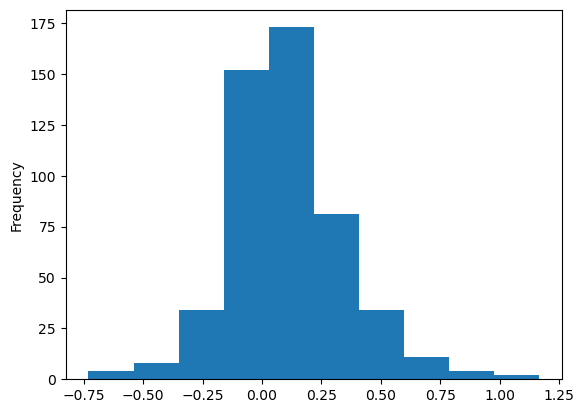

In [421]:
kummhozam.plot.hist()

In [422]:
#kummulált effektív hozam
eff_kummhozam=effr_i.sum()
eff_kummhozam

A      -0.060243
AAL     0.089293
AAPL    0.357930
ABBV    0.031065
ABNB    0.514414
          ...   
YUM     0.016210
ZBH    -0.045971
ZBRA    0.102640
ZION    0.131291
ZTS     0.310675
Length: 503, dtype: float64

<Axes: ylabel='Frequency'>

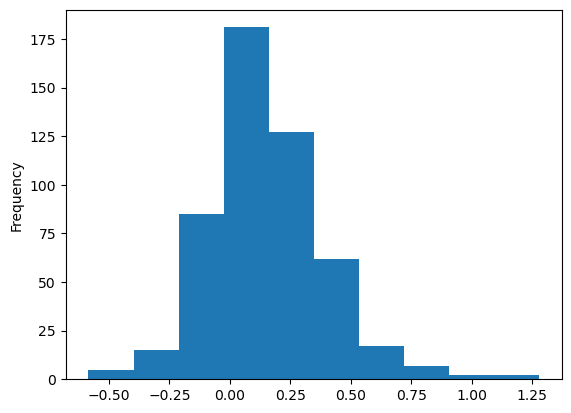

In [423]:
eff_kummhozam.plot.hist()

In [424]:
divergencia=effr_i-r_i
divergencia.round(4)

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0000,0.0000,0.0007,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,...,0.0007,0.0000,0.0003,0.0005,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
2023-01-04,0.0001,0.0021,0.0001,0.0000,0.0010,0.0001,0.0000,0.0000,0.0001,0.0002,...,0.0018,0.0000,0.0000,0.0005,0.0000,0.0001,0.0000,0.0001,0.0007,0.0001
2023-01-05,0.0000,0.0004,0.0001,0.0000,0.0001,0.0000,0.0000,0.0003,0.0007,0.0007,...,0.0000,0.0002,0.0002,0.0002,0.0004,0.0000,0.0002,0.0001,0.0002,0.0003
2023-01-06,0.0004,0.0001,0.0007,0.0002,0.0000,0.0001,0.0001,0.0003,0.0001,0.0007,...,0.0003,0.0004,0.0001,0.0001,0.0006,0.0002,0.0000,0.0013,0.0007,0.0001
2023-01-09,0.0000,0.0005,0.0000,0.0004,0.0000,0.0000,0.0002,0.0001,0.0004,0.0000,...,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0000,0.0001,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0002,0.0000
2023-12-27,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-12-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0001,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [425]:
kumm_divergencia=eff_kummhozam-kummhozam
kumm_divergencia

A       0.035354
AAL     0.061462
AAPL    0.021206
ABBV    0.020604
ABNB    0.088743
          ...   
YUM     0.013138
ZBH     0.020852
ZBRA    0.085733
ZION    0.207640
ZTS     0.030748
Length: 503, dtype: float64

# GICS classification

### GICS map beolvasása

In [15]:
gics = pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\gics-map-2024.xlsx")
gics[gics["SubIndustry"] == "Food Retail"]

,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription,Unnamed: 9
80,30,Consumer Staples,3010,Consumer Staples Distribution & Retail,301010,Consumer Staples Distribution & Retail,30101030,Food Retail,Owners and operators of primarily food retail ...,NaN


### Wikipédia beolvasása

In [535]:
# Import Packages
import bs4 as bs
import requests 
import pandas as pd
import re

wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

def get_sp500_tickers():
  resp = requests.get(wiki_url)
  soup = bs.BeautifulSoup(resp.text, "lxml")
  table = soup.find('table', {'id': 'constituents'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    #print(row.find_all('a'))
    
    ticker = [t.text.strip() for t in row.find_all('td')]
    for link in row.findAll('a'):
        ticker.append(link.get('href'))
    tickers.append(ticker)
   
  return tickers


data = get_sp500_tickers()

# Keep only 14 columns
data = [row[0:13] for row in data]

# Create Pandas dataframe
columns = ["Ticker", "CompanyName", "Sector", "SubIndustry", "Reports", "HQLocation", "DateFirstAdded", "CIK", "FoundedYear", "QuoteURL", "WikiPage", "EDGARURL", "HQLocationWikiPage"]
df = pd.DataFrame(data=data, columns=columns)

#print(len(df))
#print(df)

### GICS map és Wikipédia összefűzése

In [536]:
# Add gics code column
gics_df = pd.DataFrame()
for i in range(0, len(df)):
    gics_row = gics[gics["SubIndustry"] == df.loc[i,"SubIndustry"]]
    #if len(gics_row) != 1:
     #   print(f"**** Error in index {i}\n\n", df.loc[i])
    gics_df = pd.concat([gics_df, gics_row], ignore_index=True)


for col in gics_df.columns:
    columns.append(col)
    
#columns

sp500_df=pd.concat([df, gics_df], axis=1)
sp500_df=sp500_df.drop("Reports", axis=1)
sp500_df=sp500_df.drop("HQLocation", axis=1)
sp500_df=sp500_df.drop("DateFirstAdded", axis=1)
sp500_df=sp500_df.drop("CIK", axis=1)
sp500_df=sp500_df.drop("FoundedYear", axis=1)
sp500_df=sp500_df.drop("QuoteURL", axis=1)
sp500_df=sp500_df.drop("WikiPage", axis=1)
sp500_df=sp500_df.drop("EDGARURL", axis=1)
sp500_df=sp500_df.drop("HQLocationWikiPage", axis=1)
sp500_df=sp500_df.drop("Unnamed: 9", axis=1)
sp500_df=sp500_df.drop("SubIndustryDescription", axis=1)


sp500_df

#sp500_df.to_csv('sp500gics.csv', index = True) 
#sp500_df.to_excel('sp500gicsexcel.xlsx', index = True) 

,Ticker,CompanyName,Sector,SubIndustry,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry
0,MMM,3M,Industrials,Industrial Conglomerates,20.0,Industrials,2010.0,Capital Goods,201050.0,Industrial Conglomerates,20105010.0,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products,20.0,Industrials,2010.0,Capital Goods,201020.0,Building Products,20102010.0,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment,35.0,Health Care,3510.0,Health Care Equipment & Services,351010.0,Health Care Equipment & Supplies,35101010.0,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology,35.0,Health Care,3520.0,"Pharmaceuticals, Biotechnology & Life Sciences",352010.0,Biotechnology,35201010.0,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,45.0,Information Technology,4510.0,Software & Services,451020.0,IT Services,45102010.0,IT Consulting & Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,25.0,Consumer Discretionary,2530.0,Consumer Services,253010.0,"Hotels, Restaurants & Leisure",25301040.0,Restaurants
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,45.0,Information Technology,4520.0,Technology Hardware & Equipment,452030.0,"Electronic Equipment, Instruments & Components",45203010.0,Electronic Equipment & Instruments
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,35.0,Health Care,3510.0,Health Care Equipment & Services,351010.0,Health Care Equipment & Supplies,35101010.0,Health Care Equipment
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,35.0,Health Care,3520.0,"Pharmaceuticals, Biotechnology & Life Sciences",352020.0,Pharmaceuticals,35202010.0,Pharmaceuticals


### 0-1 mátrix

In [426]:
#lementettem az adatletoltessel egyidoben, hogyha valtozik a wikipedian az sp500 osszetetel, akkor ne legyen belole problema
matrix=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\sp500gicsexcel.xlsx", sheet_name="Sheet1", index_col=0)
matrix

,Ticker,CompanyName,Sector,SubIndustry,SectorId,Sector.1,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry.1
0,MMM,3M,Industrials,Industrial Conglomerates,20,Industrials,2010,Capital Goods,201050,Industrial Conglomerates,20105010,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products,20,Industrials,2010,Capital Goods,201020,Building Products,20102010,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment,35,Health Care,3510,Health Care Equipment & Services,351010,Health Care Equipment & Supplies,35101010,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology,35,Health Care,3520,"Pharmaceuticals, Biotechnology & Life Sciences",352010,Biotechnology,35201010,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,45,Information Technology,4510,Software & Services,451020,IT Services,45102010,IT Consulting & Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,25,Consumer Discretionary,2530,Consumer Services,253010,"Hotels, Restaurants & Leisure",25301040,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,45,Information Technology,4520,Technology Hardware & Equipment,452030,"Electronic Equipment, Instruments & Components",45203010,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,35,Health Care,3510,Health Care Equipment & Services,351010,Health Care Equipment & Supplies,35101010,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks,40,Financials,4010,Banks,401010,Banks,40101015,Regional Banks


In [427]:
matrix = pd.crosstab(index=matrix['Ticker'], columns=matrix['SectorId'])
matrix

SectorId,10,15,20,25,30,35,40,45,50,55,60
Ticker,,,,,,,,,,,
A,0,0,0,0,0,1,0,0,0,0,0
AAL,0,0,1,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,1,0,0,0
ABBV,0,0,0,0,0,1,0,0,0,0,0
ABNB,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
YUM,0,0,0,1,0,0,0,0,0,0,0
ZBH,0,0,0,0,0,1,0,0,0,0,0
ZBRA,0,0,0,0,0,0,0,1,0,0,0


In [428]:
#hany db ceg tartozik egy-egy sectorba
elo=matrix.sum()
elo

SectorId
10    23
15    28
20    78
25    53
30    38
35    64
40    72
45    64
50    22
55    30
60    31
dtype: int64

# FAKTOROK KISZÁMOLÁSA

### Momentum

In [429]:
hozam=effhozam

In [430]:
hozam_=1+hozam
hozam_

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.996498,0.990406,0.974880,0.995773,1.000000,0.999706,1.003568,1.005144,1.003962,0.992591,...,1.018842,1.010023,1.008459,1.020326,0.999662,0.997447,1.020762,0.974822,0.989081,1.015593
2016-01-06,1.004380,1.017463,0.980352,1.000115,1.000000,0.991553,1.001534,0.997987,0.985646,0.957379,...,0.948135,1.010478,0.991620,0.985455,0.987465,0.992859,1.004270,0.959984,0.970796,1.000149
2016-01-07,0.957466,0.981023,0.957757,0.996979,1.000000,0.975975,0.998931,0.970576,0.978957,0.974429,...,0.905871,1.003783,0.983935,0.991156,0.974113,0.965827,0.976948,0.954625,0.969922,0.969537
2016-01-08,0.989429,0.997964,1.005209,0.972674,1.000000,0.978998,0.989528,0.990261,0.985802,0.991215,...,0.959238,0.989007,0.979740,0.971307,0.990432,0.986333,0.995726,0.997249,0.988688,0.985337
2016-01-11,0.983097,1.017528,1.016153,0.968134,1.000000,1.001416,0.997893,1.010429,1.017356,1.023750,...,0.983487,1.007956,0.986552,0.980463,0.991503,0.998181,0.982708,0.993358,0.980022,0.971606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.001613,0.985917,0.997052,0.997828,0.985121,1.001728,0.995424,0.997016,0.999075,1.008873,...,1.006308,1.002955,1.002150,1.008979,1.008594,1.001893,1.007027,1.022498,1.019893,1.002560
2023-12-27,0.999968,0.991391,1.000414,1.001578,0.984253,1.005023,1.000304,1.001000,0.996252,1.002310,...,0.995830,0.988490,0.995197,1.002428,1.006585,1.004349,0.997508,1.000949,0.991652,1.007057
2023-12-28,0.999537,0.999180,1.002121,0.999055,1.003190,1.005451,1.006966,0.993592,0.998955,1.004359,...,1.012363,1.005582,0.985435,0.998772,0.999370,0.997449,1.004022,0.998299,1.003265,1.001215


In [431]:
logar=hozam_.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logar

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009641,-0.025441,-0.004236,0.000000,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018667,0.009973,0.008424,0.020122,-0.000338,-0.002557,0.020550,-0.025500,-0.010979,0.015473
2016-01-06,0.004370,0.017312,-0.019844,0.000115,0.000000,-0.008483,0.001533,-0.002015,-0.014458,-0.043555,...,-0.053258,0.010424,-0.008415,-0.014652,-0.012614,-0.007167,0.004261,-0.040839,-0.029639,0.000149
2016-01-07,-0.043465,-0.019159,-0.043162,-0.003026,0.000000,-0.024318,-0.001069,-0.029866,-0.021268,-0.025904,...,-0.098858,0.003776,-0.016195,-0.008883,-0.026228,-0.034771,-0.023322,-0.046436,-0.030540,-0.030936
2016-01-08,-0.010627,-0.002038,0.005195,-0.027706,0.000000,-0.021225,-0.010527,-0.009787,-0.014300,-0.008823,...,-0.041616,-0.011054,-0.020468,-0.029112,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014771
2016-01-11,-0.017048,0.017376,0.016024,-0.032384,0.000000,0.001415,-0.002109,0.010375,0.017208,0.023472,...,-0.016651,0.007924,-0.013540,-0.019730,-0.008533,-0.001821,-0.017444,-0.006664,-0.020181,-0.028805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001612,-0.014183,-0.002952,-0.002174,-0.014991,0.001726,-0.004586,-0.002989,-0.000926,0.008834,...,0.006288,0.002950,0.002148,0.008939,0.008557,0.001891,0.007002,0.022249,0.019698,0.002557
2023-12-27,-0.000032,-0.008646,0.000414,0.001576,-0.015872,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004179,-0.011576,-0.004815,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008383,0.007032
2023-12-28,-0.000463,-0.000820,0.002119,-0.000945,0.003185,0.005436,0.006942,-0.006429,-0.001045,0.004350,...,0.012287,0.005567,-0.014672,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [432]:
logar=logar.fillna(0)
logar

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009641,-0.025441,-0.004236,0.000000,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018667,0.009973,0.008424,0.020122,-0.000338,-0.002557,0.020550,-0.025500,-0.010979,0.015473
2016-01-06,0.004370,0.017312,-0.019844,0.000115,0.000000,-0.008483,0.001533,-0.002015,-0.014458,-0.043555,...,-0.053258,0.010424,-0.008415,-0.014652,-0.012614,-0.007167,0.004261,-0.040839,-0.029639,0.000149
2016-01-07,-0.043465,-0.019159,-0.043162,-0.003026,0.000000,-0.024318,-0.001069,-0.029866,-0.021268,-0.025904,...,-0.098858,0.003776,-0.016195,-0.008883,-0.026228,-0.034771,-0.023322,-0.046436,-0.030540,-0.030936
2016-01-08,-0.010627,-0.002038,0.005195,-0.027706,0.000000,-0.021225,-0.010527,-0.009787,-0.014300,-0.008823,...,-0.041616,-0.011054,-0.020468,-0.029112,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014771
2016-01-11,-0.017048,0.017376,0.016024,-0.032384,0.000000,0.001415,-0.002109,0.010375,0.017208,0.023472,...,-0.016651,0.007924,-0.013540,-0.019730,-0.008533,-0.001821,-0.017444,-0.006664,-0.020181,-0.028805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001612,-0.014183,-0.002952,-0.002174,-0.014991,0.001726,-0.004586,-0.002989,-0.000926,0.008834,...,0.006288,0.002950,0.002148,0.008939,0.008557,0.001891,0.007002,0.022249,0.019698,0.002557
2023-12-27,-0.000032,-0.008646,0.000414,0.001576,-0.015872,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004179,-0.011576,-0.004815,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008383,0.007032
2023-12-28,-0.000463,-0.000820,0.002119,-0.000945,0.003185,0.005436,0.006942,-0.006429,-0.001045,0.004350,...,0.012287,0.005567,-0.014672,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [940]:
start_index = logar.index.get_loc('2023-01-03')
end_index = len(logar)

momentum = pd.DataFrame(index=logar.index[start_index:end_index], columns=logar.columns)

for i in range(start_index, end_index):
    sum_values = logar.iloc[i-270:i-9, :].sum()  
    momentum.iloc[i-start_index, :] = sum_values

momentum

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.013884,-0.280559,-0.19952,0.318819,-0.641691,-0.201322,0.347648,-0.319065,-0.619656,-0.081837,...,0.051045,0.07813,0.56705,-0.515463,-0.078822,0.034333,0.059736,-0.880305,-0.288451,-0.450886
2023-01-04,-0.04404,-0.38259,-0.236894,0.304217,-0.764417,-0.221126,0.31868,-0.356301,-0.657929,-0.093511,...,-0.060462,0.070452,0.560202,-0.528554,-0.11384,-0.005261,0.020107,-0.894576,-0.326869,-0.458163
2023-01-05,-0.052719,-0.376418,-0.272317,0.297187,-0.757583,-0.221748,0.341229,-0.356067,-0.673527,-0.128843,...,-0.066073,0.05858,0.563349,-0.541012,-0.143998,-0.022368,0.000642,-0.916298,-0.327323,-0.475435
2023-01-06,-0.054469,-0.356172,-0.271371,0.304271,-0.782066,-0.206052,0.358316,-0.338226,-0.669104,-0.108293,...,-0.085586,0.055602,0.573165,-0.536996,-0.117825,-0.024296,0.009535,-0.901453,-0.279738,-0.475661
2023-01-09,-0.050815,-0.388023,-0.292519,0.292189,-0.780377,-0.208337,0.348331,-0.345619,-0.651564,-0.116511,...,-0.094964,0.05476,0.550164,-0.529832,-0.121521,-0.034466,0.034866,-0.90216,-0.259441,-0.477311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.217284,-0.083417,0.243431,-0.042863,0.352541,-0.015403,0.276111,0.134811,0.597987,0.120071,...,0.109691,-0.119115,-0.122943,-0.007097,-0.068201,-0.009085,-0.030946,-0.154388,-0.271199,0.216097
2023-12-27,-0.188553,-0.01306,0.277925,-0.022254,0.36044,0.003693,0.296643,0.157216,0.627489,0.143073,...,0.069628,-0.122034,-0.108349,0.033695,-0.031111,0.002842,-0.02246,-0.144805,-0.254427,0.23985
2023-12-28,-0.141871,-0.031682,0.31585,-0.013915,0.387382,0.012723,0.256269,0.167489,0.619215,0.150582,...,0.063791,-0.079358,-0.106148,0.085159,-0.022156,0.028171,-0.029883,-0.115796,-0.177854,0.27229


In [818]:
normalmom=pd.DataFrame(index= momentum.index, columns=momentum.columns)
for index, row in momentum.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normalmom.loc[index] = normalized_row
normalmom

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.295375,-0.559086,-0.299428,1.361403,-1.716205,-0.3052,1.453776,-0.682466,-1.6456,0.077646,...,0.503418,0.590203,2.15677,-1.311752,0.087307,0.44987,0.531264,-2.480757,-0.584376,-1.10484
2023-01-04,0.269985,-0.806789,-0.343396,1.37763,-2.021205,-0.293246,1.423631,-0.723174,-1.682517,0.112639,...,0.217752,0.634131,2.191801,-1.271033,0.047982,0.393321,0.474005,-2.435181,-0.629565,-1.047152
2023-01-05,0.287347,-0.724976,-0.399415,1.381627,-1.917011,-0.241267,1.519361,-0.661329,-1.654138,0.049279,...,0.245583,0.635416,2.214009,-1.239718,0.001884,0.382263,0.454224,-2.413369,-0.571439,-1.034635
2023-01-06,0.245207,-0.692614,-0.429018,1.360322,-2.016474,-0.225976,1.528316,-0.636829,-1.665341,0.0779,...,0.148483,0.587353,2.196158,-1.254692,0.048269,0.338997,0.444157,-2.387577,-0.455024,-1.064037
2023-01-09,0.26955,-0.785441,-0.486645,1.342674,-2.01296,-0.223274,1.518321,-0.652775,-1.609954,0.064015,...,0.131427,0.599853,2.149775,-1.229104,0.048338,0.320699,0.537614,-2.393973,-0.383159,-1.064787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.944367,-0.408269,0.900668,-0.245859,1.337622,-0.135892,1.031542,0.465673,2.320565,0.406644,...,0.365074,-0.551229,-0.566559,-0.102626,-0.347333,-0.11059,-0.198137,-0.692486,-1.16028,0.791201
2023-12-27,-0.882727,-0.194273,0.947247,-0.230343,1.270952,-0.128554,1.020677,0.47371,2.318574,0.418227,...,0.130107,-0.621774,-0.568089,-0.010859,-0.26509,-0.131892,-0.231149,-0.711107,-1.141148,0.797881
2023-12-28,-0.79333,-0.347671,1.057913,-0.275813,1.347221,-0.16808,0.816936,0.457869,2.284862,0.38949,...,0.038464,-0.540498,-0.648848,0.124888,-0.309144,-0.1056,-0.340397,-0.687869,-0.938863,0.881732


In [819]:
momentum=normalmom

In [941]:
momentum = momentum.astype(float)
momentum.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [435]:
#NaN ellenőrzése
x=0
for column in momentum.columns:
    has_nan = momentum[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [436]:
#Inf ellenőrzése
szumma=0
for column in momentum.columns:
    has_inf = np.isinf(momentum[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [437]:
#utolso sorbol eloszlas kirajzolasa
momentum_=momentum.iloc[-1]

<Axes: ylabel='Frequency'>

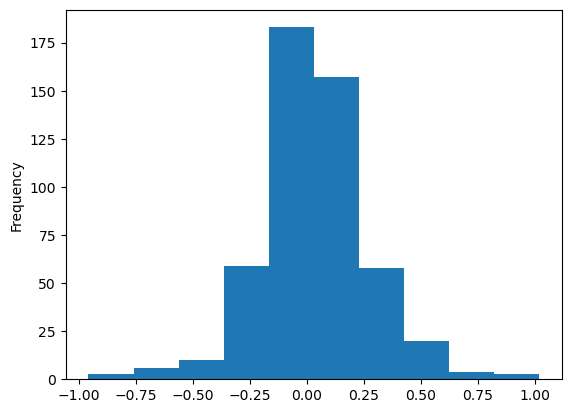

In [438]:
momentum_.plot.hist()

In [942]:
oszlopok = momentum.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,-0.199520,-0.236894,-0.272317,-0.271371,-0.292519,-0.323012,-0.316164,-0.339344,-0.339587,-0.297131,...,0.206413,0.223476,0.239685,0.235208,0.236670,0.243431,0.277925,0.315850,0.269144,0.264514
AMT,-0.221162,-0.249059,-0.280070,-0.267543,-0.250085,-0.246956,-0.266924,-0.261290,-0.238294,-0.275003,...,-0.030985,-0.021079,-0.037691,-0.029763,-0.050802,-0.063295,-0.037502,-0.024117,-0.037169,-0.037500
CMA,-0.236650,-0.262816,-0.283038,-0.249181,-0.232335,-0.232693,-0.197532,-0.230150,-0.230519,-0.251438,...,-0.317057,-0.346951,-0.364296,-0.349321,-0.329335,-0.332546,-0.315774,-0.259044,-0.200938,-0.224451
MSFT,-0.288683,-0.316020,-0.336894,-0.326283,-0.346607,-0.372351,-0.370651,-0.347896,-0.339739,-0.315188,...,0.405066,0.416078,0.402598,0.396163,0.394599,0.387086,0.418761,0.424660,0.342041,0.356829
ZION,-0.288451,-0.326869,-0.327323,-0.279738,-0.259441,-0.259157,-0.218399,-0.254265,-0.239290,-0.248978,...,-0.250530,-0.282885,-0.291895,-0.268147,-0.258992,-0.271199,-0.254427,-0.177854,-0.105151,-0.149337


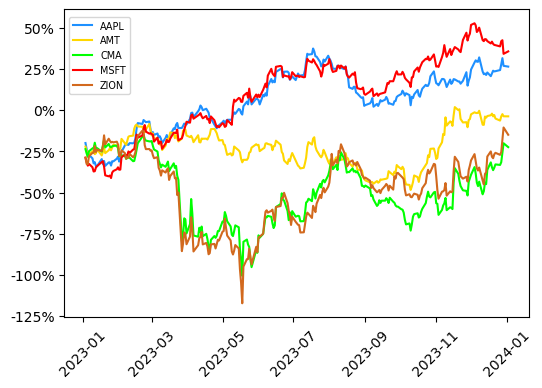

In [946]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'gold',  'lime', 'red', 'chocolate']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(0, 0.85), fancybox=True, fontsize='x-small',)
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

### Dividend Yield

In [439]:
eves_div=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="éves div", index_col=0)

In [440]:
df = eves_div.replace(0, method='ffill')
px_last_rovid=px_last.iloc[1762:2013]

In [821]:
DivYield_=df/px_last_rovid
DivYield_=DivYield_.fillna(0)
DivYield_.replace([np.inf, -np.inf], 0, inplace=True)
DivYield_

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.005698,0.0,0.007196,0.034733,0.0,0.017156,0.0,0.014912,0.0,0.018283,...,0.0,0.027401,0.033049,0.015295,0.010654,0.017407,0.013199,0.0,0.031985,0.006639
2023-01-04,0.005637,0.0,0.007123,0.034455,0.0,0.016905,0.0,0.014963,0.0,0.017901,...,0.0,0.027169,0.032953,0.014802,0.010670,0.017174,0.013078,0.0,0.030858,0.006545
2023-01-05,0.005621,0.0,0.007199,0.034498,0.0,0.016968,0.0,0.015324,0.0,0.018599,...,0.0,0.027730,0.032231,0.015110,0.010982,0.017306,0.013325,0.0,0.031408,0.006703
2023-01-06,0.005790,0.0,0.006943,0.033864,0.0,0.016736,0.0,0.014970,0.0,0.017943,...,0.0,0.026932,0.031847,0.014957,0.010605,0.016962,0.013365,0.0,0.030238,0.006604
2023-01-09,0.005798,0.0,0.006915,0.034888,0.0,0.016763,0.0,0.014721,0.0,0.017774,...,0.0,0.026674,0.032451,0.015156,0.010556,0.017031,0.013328,0.0,0.030380,0.006630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.006115,0.0,0.004662,0.036477,0.0,0.017211,0.0,0.011403,0.0,0.014934,...,0.0,0.030843,0.034463,0.014069,0.010385,0.016966,0.013836,0.0,0.034537,0.004987
2023-12-27,0.006115,0.0,0.004660,0.036415,0.0,0.017124,0.0,0.011390,0.0,0.014898,...,0.0,0.031199,0.034625,0.014033,0.010316,0.016891,0.013869,0.0,0.034824,0.004952
2023-12-28,0.006117,0.0,0.004649,0.036446,0.0,0.017029,0.0,0.011462,0.0,0.014832,...,0.0,0.031023,0.035133,0.014049,0.010322,0.016932,0.013812,0.0,0.034707,0.004945


In [822]:
#DivYield_.to_excel('div.xlsx', index = True) 

In [823]:
DivYield=DivYield_

In [824]:
normaldiv=pd.DataFrame(index= DivYield.index, columns=DivYield.columns)
for index, row in DivYield.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normaldiv.loc[index] = normalized_row
normaldiv

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.743671,-1.052265,-0.662576,0.828674,-1.052265,-0.123181,-1.052265,-0.244748,-1.052265,-0.062197,...,-1.052265,0.43161,0.737436,-0.223973,-0.475329,-0.109608,-0.337477,-1.052265,0.679849,-0.692715
2023-01-04,-0.745003,-1.05585,-0.663102,0.844081,-1.05585,-0.12368,-1.05585,-0.230791,-1.05585,-0.068742,...,-1.05585,0.442272,0.761218,-0.23966,-0.467485,-0.108823,-0.334706,-1.05585,0.645719,-0.694926
2023-01-05,-0.751373,-1.059239,-0.664948,0.830236,-1.059239,-0.129906,-1.059239,-0.219904,-1.059239,-0.040573,...,-1.059239,0.45955,0.706121,-0.231628,-0.457748,-0.111356,-0.329418,-1.059239,0.661035,-0.692088
2023-01-06,-0.734631,-1.060087,-0.669796,0.843411,-1.060087,-0.119324,-1.060087,-0.21863,-1.060087,-0.051475,...,-1.060087,0.45379,0.730026,-0.219366,-0.463983,-0.106634,-0.308824,-1.060087,0.639609,-0.688878
2023-01-09,-0.736481,-1.062349,-0.673682,0.898554,-1.062349,-0.12016,-1.062349,-0.23492,-1.062349,-0.063362,...,-1.062349,0.436884,0.7616,-0.210491,-0.46907,-0.105086,-0.313238,-1.062349,0.645191,-0.689709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.673914,-0.994793,-0.750176,0.919143,-0.994793,-0.091706,-0.994793,-0.396498,-0.994793,-0.211181,...,-0.994793,0.62357,0.813467,-0.256606,-0.449863,-0.104578,-0.268799,-0.994793,0.817351,-0.733112
2023-12-27,-0.673234,-0.993956,-0.749568,0.915967,-0.993956,-0.095851,-0.993956,-0.39657,-0.993956,-0.212558,...,-0.993956,0.642393,0.822081,-0.257941,-0.452873,-0.108058,-0.266528,-0.993956,0.832487,-0.734244
2023-12-28,-0.671988,-0.992978,-0.749016,0.919463,-0.992978,-0.099408,-0.992978,-0.391516,-0.992978,-0.214681,...,-0.992978,0.634895,0.850585,-0.255784,-0.451352,-0.104483,-0.268195,-0.992978,0.828201,-0.733485


In [825]:
DivYield=normaldiv

In [826]:
DivYield=DivYield.astype(float)
DivYield.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [445]:
#NaN ellenorzese
x=0
for column in DivYield.columns:
    has_nan = DivYield[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [446]:
#Inf ellenőrzése
szumma=0
for column in DivYield.columns:
    has_inf = np.isinf(DivYield[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [177]:
DivYield_=DivYield.iloc[-1]

<Axes: ylabel='Frequency'>

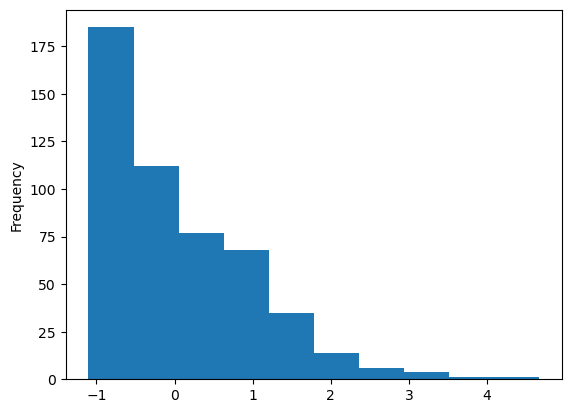

In [178]:
DivYield_.plot.hist()

In [179]:
oszlopok = DivYield.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,-0.662576,-0.663102,-0.664948,-0.669796,-0.673682,-0.673375,-0.676337,-0.678622,-0.680710,-0.685368,...,-0.755328,-0.756454,-0.756619,-0.755334,-0.751802,-0.750176,-0.749568,-0.749016,-0.747254,-0.817049
AMT,0.383123,0.376830,0.409901,0.403703,0.395973,0.385784,0.361571,0.343295,0.338757,0.344296,...,0.405724,0.416290,0.390973,0.384506,0.382574,0.385878,0.383080,0.381925,0.383327,0.517518
CMA,1.177835,1.186089,1.195953,1.201640,1.225920,1.211118,1.218854,1.204683,1.213720,1.216696,...,1.584575,1.559868,1.601970,1.571464,1.572977,1.541088,1.540412,1.530052,1.550246,1.690554
MSFT,-0.478133,-0.444501,-0.433450,-0.425334,-0.433773,-0.435327,-0.446462,-0.453992,-0.454635,-0.459642,...,-0.640237,-0.639426,-0.641828,-0.642195,-0.640817,-0.639072,-0.637822,-0.637823,-0.638798,-0.678997
ZION,0.679849,0.645719,0.661035,0.639609,0.645191,0.653056,0.661166,0.666869,0.667118,0.678772,...,0.872304,0.851761,0.878280,0.851236,0.839881,0.817351,0.832487,0.828201,0.851273,0.984376


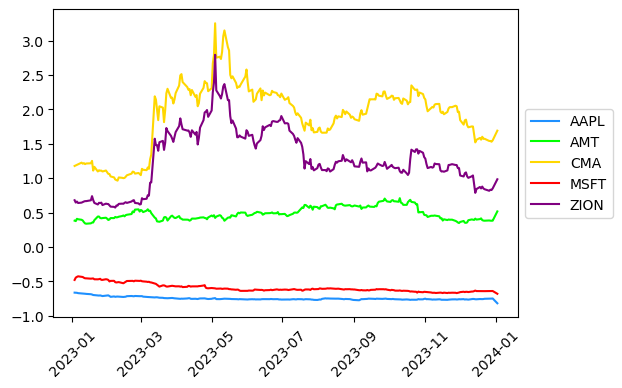

In [180]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Value

In [447]:
price_to_book=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to book", index_col=0)
price_to_CF=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to cf", index_col=0)
P_per_E_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="p per e rata", index_col=0)
EBITDA_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="EBITDA", index_col=0)
SALES_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SALES", index_col=0)
For_PE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="forcasted p per e", index_col=0)
Market_cap=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Market cap", index_col=0)
LT_Debt_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="LT DEBT", index_col=0)
ST_Debt_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="ST DEBT", index_col=0)
cash_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="cash", index_col=0)
total_asset_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Total Asset", index_col=0)

In [448]:
For_PE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="forcasted p per e", index_col=0)
P_per_E_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="p per e rata", index_col=0)

In [449]:
book_to_price=1/price_to_book
book_to_price.replace([np.inf, -np.inf], 0, inplace=True)
book_to_price=book_to_price.fillna(0)
book_to_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.119855,0.0,0.028630,0.060060,0.102326,0.192652,0.522220,0.134947,0.090269,0.440742,...,0.0,0.433013,0.448632,0.541477,0.175058,0.0,0.451875,0.204144,0.618123,0.064675
2023-01-04,0.118566,0.0,0.028337,0.059579,0.097920,0.189825,0.519642,0.135408,0.089082,0.431555,...,0.0,0.429332,0.447327,0.523999,0.175328,0.0,0.447708,0.201975,0.596338,0.063758
2023-01-05,0.118224,0.0,0.028641,0.059652,0.099048,0.190531,0.518242,0.138683,0.092599,0.448370,...,0.0,0.438212,0.437522,0.534931,0.180453,0.0,0.456163,0.204253,0.606943,0.065297
2023-01-06,0.121779,0.0,0.027625,0.058556,0.098141,0.187935,0.510465,0.135474,0.091400,0.432582,...,0.0,0.425604,0.432302,0.529493,0.174255,0.0,0.457540,0.194273,0.584351,0.064329
2023-01-09,0.121944,0.0,0.027512,0.060327,0.097350,0.188235,0.520481,0.133227,0.088933,0.428486,...,0.0,0.421532,0.440509,0.536567,0.173445,0.0,0.456267,0.190190,0.587096,0.064582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.143113,0.0,0.020702,0.043992,0.101490,0.197652,0.525376,0.120322,0.060681,0.360360,...,0.0,0.504032,0.493364,0.448370,0.362937,0.0,0.492999,0.212943,0.733192,0.056525
2023-12-27,0.143102,0.0,0.020691,0.043918,0.103103,0.196645,0.525155,0.120189,0.060904,0.359492,...,0.0,0.509840,0.495688,0.447227,0.360529,0.0,0.494193,0.212716,0.739317,0.056123
2023-12-28,0.143154,0.0,0.020645,0.043955,0.102764,0.195561,0.521458,0.120953,0.060961,0.357897,...,0.0,0.506971,0.502968,0.447728,0.360724,0.0,0.492150,0.213056,0.736811,0.056049


In [450]:
CF_to_price=1/price_to_CF
CF_to_price.replace([np.inf, -np.inf], 0, inplace=True)
CF_to_price=CF_to_price.fillna(0)
CF_to_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.029333,0.262495,0.054300,0.086644,0.063443,0.049809,0.165648,0.055597,0.049553,0.053104,...,0.000000,0.102608,0.171600,0.073447,0.029861,0.039403,0.048148,0.036122,0.202229,0.027819
2023-01-04,0.029018,0.246081,0.053746,0.085951,0.060711,0.049080,0.164829,0.055787,0.048901,0.051996,...,0.000000,0.101737,0.171104,0.071077,0.029907,0.038877,0.047706,0.035739,0.195103,0.027425
2023-01-05,0.028934,0.239046,0.054322,0.086056,0.061410,0.049261,0.164384,0.057136,0.050832,0.054021,...,0.000000,0.103838,0.167358,0.072559,0.030781,0.039175,0.048606,0.036141,0.198582,0.028086
2023-01-06,0.029804,0.235843,0.052394,0.084474,0.060848,0.048590,0.161914,0.055814,0.050174,0.052119,...,0.000000,0.100852,0.165360,0.071821,0.029724,0.038396,0.048753,0.034375,0.191183,0.027670
2023-01-09,0.029844,0.228901,0.052180,0.087030,0.060357,0.048668,0.165093,0.054889,0.048819,0.051626,...,0.000000,0.099885,0.168501,0.072779,0.029586,0.038553,0.048618,0.033653,0.192082,0.027779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.043082,0.542535,0.036331,0.093191,0.048549,0.034360,0.187210,0.042748,0.026704,0.048220,...,0.086554,0.167179,0.142116,0.047432,0.031580,0.043816,0.048734,0.008524,0.244421,0.024271
2023-12-27,0.043079,0.547196,0.036313,0.093035,0.049321,0.034185,0.187136,0.042701,0.026802,0.048104,...,0.086907,0.169107,0.142786,0.047312,0.031371,0.043622,0.048851,0.008515,0.246451,0.024099
2023-12-28,0.043094,0.547585,0.036232,0.093112,0.049159,0.033996,0.185822,0.042972,0.026827,0.047890,...,0.085837,0.168152,0.144881,0.047365,0.031387,0.043729,0.048650,0.008529,0.245628,0.024067


In [1181]:
#P/E extrapolalas elsofoku polinommal
start_index = P_per_E_.index.get_loc('2023-01-03')
end_index = len(P_per_E_)
forp_e_2y = pd.DataFrame(index=P_per_E_.index[start_index:end_index], columns=P_per_E_.columns)

for column_name in P_per_E_.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = P_per_E_.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=For_PE.iloc[i-start_index][column_name]
        tarol.append(y)
        X = np.arange(1, len(tarol) + 2) 
        Y = np.array(tarol)
        degree = 1  
        coefficients = np.polyfit(np.arange(1, len(tarol) + 1), Y, degree)
        poly_fit = np.poly1d(coefficients)
        next_X = X[-1]  
        next_Y = poly_fit(next_X)
        if next_Y<0:
            next_Y=0
        forp_e_2y.iloc[i - start_index][column_name] = next_Y


forp_e_2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,31.5172,15.258229,25.5991,13.194243,83.067957,24.556243,8.443229,28.985686,26.0428,19.652186,...,0,27.169743,3.844243,19.235143,40.556243,24.110186,25.965029,19.939857,6.029471,34.0367
2023-01-04,31.596429,16.4484,25.9722,13.214729,86.307386,24.672243,8.614371,28.664786,26.127829,20.046314,...,0,21.396257,3.912686,19.950557,40.096386,24.277557,26.141657,19.9972,6.360829,33.8826
2023-01-05,30.925143,17.019229,25.651729,13.068271,85.353743,24.284371,8.647,27.954157,24.093571,19.336229,...,0,21.009643,4.054943,19.747729,39.125629,24.022714,25.860186,19.645243,6.286129,32.5912
2023-01-06,30.132914,17.256029,25.9311,13.346086,82.467371,24.482571,8.876943,28.192329,22.743857,19.783557,...,0,21.791114,4.275,20.020757,40.280357,24.451257,25.956229,19.899643,6.798257,32.464686
2023-01-09,30.104929,17.9154,25.948886,12.783214,81.752714,24.5125,8.116814,27.883186,23.268771,20.072643,...,0,21.888114,4.227243,19.662914,40.735157,24.371014,25.908629,20.230786,6.923771,32.252557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,29.508443,1.387914,32.590129,16.6805,31.210514,21.788043,8.949671,30.673243,36.050514,22.587214,...,32.4829,17.882829,8.081571,20.480429,37.773314,22.595829,20.572929,23.802814,8.484943,36.433971
2023-12-27,29.624386,1.423986,32.378643,16.756786,30.977586,22.200929,9.092214,30.863486,36.229514,22.732471,...,32.408486,18.0361,8.280471,20.691443,38.300471,22.771386,20.708771,24.023557,8.462771,36.945086
2023-12-28,29.369486,1.241286,32.135729,16.560114,30.866886,21.833843,9.036986,30.623114,35.204814,22.640471,...,32.541871,18.097629,7.995171,20.482829,38.079386,22.561671,20.6084,23.886557,8.374714,36.742243


In [451]:
#P/E extrapolalas atlaggal
start_index = P_per_E_.index.get_loc('2023-01-03')
end_index = len(P_per_E_)
forp_e_2y = pd.DataFrame(index=P_per_E_.index[start_index:end_index], columns=P_per_E_.columns)

for column_name in P_per_E_.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = P_per_E_.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=For_PE.iloc[i-start_index][column_name]
        tarol.append(y)
        atlag3=sum(tarol)/len(tarol)
        forp_e_2y.iloc[i - start_index][column_name] = atlag3


forp_e_2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,32.837571,9.472714,22.595571,14.250957,36.8813,31.401571,14.153671,27.980543,43.537643,21.373043,...,24.192429,18.674686,13.691671,27.202071,34.478957,29.088757,24.609143,25.382714,11.235457,34.637786
2023-01-04,32.657529,9.7716,22.457171,14.220529,38.2982,31.212871,13.969486,27.670171,43.198871,21.298071,...,23.963314,21.651129,13.754329,27.657071,34.077543,28.837457,24.708686,25.0382,11.279443,34.220986
2023-01-05,32.771443,10.001457,22.503371,14.341986,37.877214,31.327771,14.057243,27.605543,43.190814,21.219443,...,23.997529,21.523371,14.051186,27.8658,34.004857,28.9331,24.8417,25.269571,11.3272,33.936843
2023-01-06,32.668729,10.1286,22.413457,14.413614,36.389829,31.425614,14.195729,27.660657,42.629386,21.422971,...,24.197057,21.7575,14.1079,28.243843,34.509286,29.111071,24.9804,25.540157,11.647543,33.945214
2023-01-09,33.028886,10.338014,22.651614,14.361257,35.993014,31.435943,13.952157,27.6323,43.262829,21.763886,...,24.424586,21.7324,14.065529,28.2144,34.892571,29.107314,24.930271,25.776557,11.790771,34.032186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,31.879929,3.028529,26.958914,14.224657,10.617957,33.5026,12.712286,29.201486,44.292757,22.107343,...,22.492814,21.5164,11.922943,27.6653,34.493771,29.562986,24.223043,26.430686,10.628986,36.863771
2023-12-27,31.892871,2.980743,26.570314,14.232457,10.560257,33.363757,12.727457,29.125529,44.180829,22.065914,...,22.367257,21.325243,11.845443,27.735214,34.502057,29.577871,24.143629,26.360486,10.688857,36.821386
2023-12-28,32.091329,3.076729,26.208629,14.349214,10.488586,33.859457,12.830657,29.364586,44.801814,22.270443,...,22.775729,21.462143,11.966657,27.913071,34.814957,29.913186,24.326686,26.738829,10.790457,37.150614


In [452]:
P_per_E=P_per_E_.iloc[1762:2013]
E_per_P=1/P_per_E
E_per_P.replace([np.inf, -np.inf], 0, inplace=True)
E_per_P=E_per_P.fillna(0)
E_per_P

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.031268,0.024649,0.047094,0.064859,0.035222,0.039789,0.082347,0.041178,0.030480,0.059505,...,0.000000,0.045240,0.131850,0.042076,0.025522,0.034554,0.038490,0.050408,0.117088,0.033102
2023-01-04,0.030932,0.023108,0.046613,0.064340,0.033705,0.039206,0.081940,0.041318,0.030079,0.058265,...,0.000000,0.044856,0.131468,0.040719,0.025561,0.034093,0.038136,0.049873,0.112961,0.032633
2023-01-05,0.030843,0.022447,0.047112,0.064418,0.034093,0.039351,0.081719,0.042318,0.031267,0.060534,...,0.000000,0.045783,0.128591,0.041568,0.026308,0.034354,0.038856,0.050435,0.114976,0.033420
2023-01-06,0.031770,0.022146,0.045441,0.063235,0.033782,0.038815,0.080491,0.041338,0.030862,0.058402,...,0.000000,0.044466,0.127055,0.041145,0.025405,0.033671,0.038973,0.047971,0.110692,0.032924
2023-01-09,0.031813,0.021494,0.045255,0.065148,0.033509,0.038877,0.082071,0.040653,0.030029,0.057850,...,0.000000,0.044040,0.129468,0.041694,0.025287,0.033809,0.038865,0.046963,0.111212,0.033054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.035605,0.240807,0.031702,0.054865,0.059544,0.029909,0.120642,0.034645,0.020210,0.050719,...,0.012636,0.051519,0.102068,0.030606,0.029076,0.039612,0.042341,0.036038,0.121261,0.025947
2023-12-27,0.035603,0.242872,0.031685,0.054773,0.060491,0.029757,0.120592,0.034607,0.020284,0.050597,...,0.012687,0.052113,0.102549,0.030529,0.028883,0.039437,0.042443,0.036000,0.122269,0.025763
2023-12-28,0.035615,0.243049,0.031615,0.054819,0.060292,0.029592,0.119746,0.034827,0.020303,0.050373,...,0.012531,0.051819,0.104054,0.030563,0.028898,0.039534,0.042268,0.036058,0.121859,0.025729


In [453]:
EBITDA_ism = EBITDA_.replace(0, method='ffill')
SALES_ism = SALES_.replace(0, method='ffill')
LT_Debt_ism = LT_Debt_.replace(0, method='ffill')
ST_Debt_ism = ST_Debt_.replace(0, method='ffill')
cash_ism = cash_.replace(0, method='ffill')
total_asset_ism = total_asset_.replace(0, method='ffill')

In [454]:
EBITDA= EBITDA_ism.iloc[1762:2013]
SALES= SALES_ism.iloc[1762:2013]
LT_Debt= LT_Debt_ism.iloc[1762:2013]
ST_Debt= ST_Debt_ism.iloc[1762:2013]
cash= cash_ism.iloc[1762:2013]
total_asset= total_asset_ism .iloc[1762:2013]

In [455]:
nulla=ST_Debt*0
EV=Market_cap+LT_Debt+np.maximum(ST_Debt-cash, nulla)
Ebitda_per_ev=EBITDA/EV
Ebitda_per_ev.replace([np.inf, -np.inf], 0, inplace=True)
Ebitda_per_ev=Ebitda_per_ev.fillna(0)
Ebitda_per_ev

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.011512,0.035971,0.018634,0.022069,0.004364,0.010214,0.0,0.017890,0.010704,0.018691,...,0.011613,0.019446,0.045209,0.015946,0.011634,0.012924,0.006182,0.019893,0.0,0.010642
2023-01-04,0.011395,0.035594,0.018453,0.021922,0.004183,0.010075,0.0,0.017950,0.010567,0.018330,...,0.011323,0.019346,0.045090,0.015543,0.011650,0.012795,0.006135,0.019709,0.0,0.010505
2023-01-05,0.011364,0.035419,0.018641,0.021944,0.004229,0.010110,0.0,0.018377,0.010974,0.018989,...,0.011299,0.019586,0.044192,0.015796,0.011957,0.012868,0.006231,0.019903,0.0,0.010734
2023-01-06,0.011685,0.035337,0.018010,0.021609,0.004192,0.009982,0.0,0.017959,0.010835,0.018370,...,0.011181,0.019244,0.043712,0.015670,0.011586,0.012676,0.006246,0.019048,0.0,0.010590
2023-01-09,0.011700,0.035152,0.017940,0.022150,0.004160,0.009997,0.0,0.017666,0.010550,0.018210,...,0.011142,0.019131,0.044466,0.015833,0.011537,0.012715,0.006232,0.018695,0.0,0.010628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.010726,0.005241,0.009528,0.013742,0.016311,0.012106,0.0,0.012946,0.007109,0.011153,...,0.009951,0.037514,0.036108,-0.015549,0.011363,0.013425,0.016639,0.001927,0.0,0.009389
2023-12-27,0.010725,0.005250,0.009523,0.013723,0.016564,0.012049,0.0,0.012932,0.007135,0.011128,...,0.009969,0.037760,0.036264,-0.015518,0.011294,0.013380,0.016672,0.001925,0.0,0.009327
2023-12-28,0.010729,0.005250,0.009503,0.013733,0.016511,0.011987,0.0,0.013013,0.007142,0.011081,...,0.009915,0.037638,0.036752,-0.015531,0.011299,0.013405,0.016615,0.001928,0.0,0.009315


In [456]:
forep_2y = pd.DataFrame(index=P_per_E.index[start_index:end_index], columns=P_per_E.columns)
for col in forp_e_2y.columns:
    forep_2y[col] = forp_e_2y[col].apply(lambda x: 1 / x if x != 0 else 0)
forep_2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.030453,0.105566,0.044256,0.070171,0.027114,0.031846,0.070653,0.035739,0.022969,0.046788,...,0.041335,0.053548,0.073037,0.036762,0.029003,0.034378,0.040635,0.039397,0.089004,0.028870
2023-01-04,0.030621,0.102337,0.044529,0.070321,0.026111,0.032038,0.071585,0.036140,0.023149,0.046953,...,0.041730,0.046187,0.072704,0.036157,0.029345,0.034677,0.040472,0.039939,0.088657,0.029222
2023-01-05,0.030514,0.099985,0.044438,0.069725,0.026401,0.031921,0.071138,0.036225,0.023153,0.047127,...,0.041671,0.046461,0.071168,0.035886,0.029408,0.034562,0.040255,0.039573,0.088283,0.029467
2023-01-06,0.030610,0.098730,0.044616,0.069379,0.027480,0.031821,0.070444,0.036152,0.023458,0.046679,...,0.041327,0.045961,0.070882,0.035406,0.028978,0.034351,0.040031,0.039154,0.085855,0.029459
2023-01-09,0.030277,0.096730,0.044147,0.069632,0.027783,0.031811,0.071674,0.036190,0.023115,0.045948,...,0.040942,0.046014,0.071096,0.035443,0.028659,0.034356,0.040112,0.038795,0.084812,0.029384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.031368,0.330193,0.037093,0.070300,0.094180,0.029848,0.078664,0.034245,0.022577,0.045234,...,0.044459,0.046476,0.083872,0.036146,0.028991,0.033826,0.041283,0.037835,0.094082,0.027127
2023-12-27,0.031355,0.335487,0.037636,0.070262,0.094695,0.029973,0.078570,0.034334,0.022634,0.045319,...,0.044708,0.046893,0.084421,0.036055,0.028984,0.033809,0.041419,0.037936,0.093555,0.027158
2023-12-28,0.031161,0.325021,0.038155,0.069690,0.095342,0.029534,0.077938,0.034055,0.022321,0.044903,...,0.043906,0.046594,0.083566,0.035826,0.028723,0.033430,0.041107,0.037399,0.092674,0.026917


In [457]:
For_EP=0.5*(1/For_PE)+0.5*forep_2y
For_EP.replace([np.inf, -np.inf], 0, inplace=True)
For_EP=For_EP.fillna(0)
For_EP

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.038564,0.218018,0.051179,0.072913,0.040771,0.040312,0.085598,0.043525,0.039680,0.057955,...,0.052614,0.054018,0.083595,0.063152,0.033732,0.044382,0.051897,0.060608,0.112033,0.037323
2023-01-04,0.038397,0.215751,0.051020,0.072808,0.039160,0.040230,0.085817,0.043813,0.039400,0.057299,...,0.050953,0.050106,0.083318,0.061402,0.033933,0.044168,0.051525,0.060445,0.109475,0.037174
2023-01-05,0.038336,0.209839,0.051282,0.072556,0.039611,0.040260,0.085459,0.044478,0.041225,0.058703,...,0.050779,0.050802,0.081431,0.062171,0.034527,0.044317,0.051865,0.060720,0.110455,0.037841
2023-01-06,0.039094,0.207094,0.050340,0.071691,0.039910,0.039880,0.084362,0.043831,0.040994,0.057242,...,0.049893,0.049759,0.080168,0.061482,0.033631,0.043402,0.051849,0.058509,0.106768,0.037494
2023-01-09,0.038960,0.201458,0.049991,0.073104,0.039849,0.039967,0.091343,0.043423,0.040033,0.056556,...,0.049465,0.049500,0.080699,0.062083,0.033383,0.043512,0.051824,0.057513,0.106550,0.037547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.037217,0.282744,0.037011,0.074067,0.065948,0.038388,0.096850,0.036026,0.028331,0.044641,...,0.052191,0.054089,0.088805,0.051529,0.034293,0.042186,0.055678,0.045358,0.097308,0.030811
2023-12-27,0.037209,0.286396,0.037272,0.073984,0.066407,0.038331,0.096776,0.036049,0.028421,0.044631,...,0.052438,0.054653,0.089300,0.051399,0.034159,0.042066,0.055829,0.045381,0.097462,0.030705
2023-12-28,0.037119,0.281247,0.037491,0.073731,0.066667,0.037983,0.096060,0.036029,0.028281,0.044325,...,0.051667,0.054328,0.089561,0.051322,0.034039,0.041937,0.055528,0.045154,0.096852,0.030562


In [458]:
SalesEV=SALES/EV
SalesEV.replace([np.inf, -np.inf], 0, inplace=True)
SalesEV=SalesEV.fillna(0)
SalesEV

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.039127,0.253028,0.056075,0.043569,0.033474,0.048824,0.118388,0.090900,0.028162,0.036238,...,0.042984,0.063714,0.192780,0.108854,0.068175,0.042087,0.056360,0.097711,0.054636,0.026901
2023-01-04,0.038731,0.250374,0.055529,0.043281,0.032088,0.048162,0.117867,0.091205,0.027800,0.035540,...,0.041909,0.063387,0.192272,0.106101,0.068269,0.041666,0.055933,0.096805,0.053847,0.026556
2023-01-05,0.038626,0.249145,0.056096,0.043324,0.032444,0.048327,0.117583,0.093374,0.028870,0.036816,...,0.041822,0.064172,0.188444,0.107827,0.070067,0.041905,0.056802,0.097757,0.054236,0.027134
2023-01-06,0.039717,0.248565,0.054197,0.042663,0.032158,0.047717,0.116006,0.091248,0.028505,0.035617,...,0.041387,0.063052,0.186395,0.106970,0.067892,0.041280,0.056944,0.093560,0.053398,0.026771
2023-01-09,0.039767,0.247263,0.053986,0.043730,0.031909,0.047788,0.118034,0.089759,0.027755,0.035305,...,0.041241,0.062684,0.189613,0.108082,0.067606,0.041406,0.056813,0.091827,0.053502,0.026866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.038523,0.267668,0.028787,0.042380,0.036841,0.049695,0.110386,0.068057,0.018264,0.025882,...,0.070930,0.060840,0.198723,0.099490,0.069793,0.035277,0.057459,0.057564,0.103677,0.022290
2023-12-27,0.038520,0.268085,0.028772,0.042321,0.037412,0.049459,0.110345,0.067982,0.018330,0.025824,...,0.071056,0.061239,0.199584,0.099291,0.069365,0.035159,0.057573,0.057513,0.104175,0.022143
2023-12-28,0.038533,0.268120,0.028711,0.042351,0.037292,0.049205,0.109640,0.068409,0.018347,0.025716,...,0.070672,0.061042,0.202268,0.099380,0.069399,0.035224,0.057376,0.057591,0.103973,0.022116


In [827]:
Value=0.13*book_to_price+0.18*CF_to_price+0.18*E_per_P+0.21*Ebitda_per_ev+0.16*For_EP+0.13*SalesEV
Value

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.040163,0.127016,0.041364,0.057043,0.042853,0.056114,0.141614,0.057500,0.038399,0.095475,...,0.016445,0.103914,0.160874,0.118790,0.049429,0.028599,0.091267,0.068691,0.162861,0.031077
2023-01-04,0.039776,0.122998,0.041006,0.056677,0.041040,0.055382,0.141025,0.057718,0.037934,0.093586,...,0.015978,0.102520,0.160411,0.115125,0.049528,0.028305,0.090457,0.068062,0.157492,0.030705
2023-01-05,0.039671,0.120470,0.041394,0.056690,0.041510,0.055566,0.140629,0.059045,0.039469,0.097074,...,0.015934,0.104483,0.156956,0.117366,0.050879,0.028476,0.092036,0.068740,0.160066,0.031396
2023-01-06,0.040787,0.119307,0.040084,0.055755,0.041238,0.054845,0.138572,0.057746,0.039009,0.093776,...,0.015711,0.101685,0.155072,0.116202,0.049216,0.027945,0.092281,0.065602,0.154328,0.030973
2023-01-09,0.040811,0.116830,0.039899,0.057268,0.040949,0.054935,0.142111,0.056843,0.037983,0.092871,...,0.015616,0.100792,0.157800,0.117668,0.048978,0.028040,0.092048,0.064301,0.154919,0.031078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.045984,0.222138,0.026602,0.052615,0.051417,0.052408,0.153558,0.046903,0.024733,0.077505,...,0.037515,0.129331,0.155716,0.090248,0.075046,0.029172,0.100356,0.050849,0.190185,0.026187
2023-12-27,0.045979,0.223989,0.026633,0.052536,0.052137,0.052166,0.153490,0.046861,0.024822,0.077335,...,0.037648,0.130734,0.156449,0.090024,0.074569,0.029062,0.100596,0.050808,0.191617,0.026021
2023-12-28,0.045979,0.223272,0.026623,0.052528,0.052043,0.051860,0.152414,0.047118,0.024818,0.076976,...,0.037243,0.130033,0.158537,0.090101,0.074586,0.029091,0.100177,0.050839,0.190946,0.025971


In [828]:
df_standardized = Value.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

In [829]:
df_standardized.iloc[80:120]

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-04-28,-0.081607,0.029453,-0.092836,-0.076179,-0.090715,-0.076646,-0.023830,-0.075095,-0.089444,-0.052165,...,-0.098439,-0.040609,-0.017084,-0.053529,-0.077048,-0.096088,-0.053571,-0.071930,0.078032,-0.094901
2023-05-01,-0.082013,0.026608,-0.092876,-0.076808,-0.091125,-0.076889,-0.024809,-0.075043,-0.089283,-0.053105,...,-0.098536,-0.040910,-0.013696,-0.054199,-0.077301,-0.096303,-0.053787,-0.071885,0.084987,-0.095309
2023-05-02,-0.082945,0.025505,-0.094111,-0.077640,-0.092268,-0.078345,-0.026202,-0.076012,-0.090278,-0.054668,...,-0.099732,-0.041200,-0.011304,-0.055157,-0.078636,-0.097709,-0.056627,-0.068402,0.106664,-0.096403
2023-05-03,-0.083506,0.025093,-0.094499,-0.077681,-0.092517,-0.078936,-0.026253,-0.076309,-0.089188,-0.054793,...,-0.099983,-0.041101,-0.009790,-0.053287,-0.079007,-0.097611,-0.055768,-0.069489,0.117914,-0.096991
2023-05-04,-0.774657,1.383161,-0.988963,-0.656437,-0.947919,-0.683953,0.396789,-0.614575,-0.875375,-0.213339,...,-1.099203,0.034786,0.691686,-0.201364,-0.704423,-1.050684,-0.214147,-0.525602,3.735615,-1.042004
2023-05-05,-0.774110,1.411896,-1.016713,-0.656914,-0.967220,-0.684858,0.397829,-0.607434,-0.900255,-0.205894,...,-1.115491,0.056847,0.697791,-0.191823,-0.719080,-1.066590,-0.204331,-0.544586,3.088538,-1.069103
2023-05-08,-0.772994,1.345202,-1.019508,-0.657232,-0.987358,-0.685374,0.364521,-0.607781,-0.896801,-0.215133,...,-1.120728,0.058882,0.685369,-0.195465,-0.710953,-1.067268,-0.203176,-0.558953,2.995882,-1.069181
2023-05-09,-0.751795,1.320594,-1.018864,-0.657860,-0.993508,-0.685049,0.346366,-0.607719,-0.898006,-0.187952,...,-1.122988,0.058183,0.677530,-0.188672,-0.711123,-1.072663,-0.195852,-0.540403,2.957707,-1.071222
2023-05-10,-0.751060,1.303003,-1.015117,-0.653086,-0.933733,-0.684583,0.322389,-0.621176,-0.894164,-0.202705,...,-1.114517,0.047965,0.689772,-0.194689,-0.707858,-1.064962,-0.210310,-0.544962,3.031267,-1.064469


In [830]:
normalval=pd.DataFrame(index= Value.index, columns=Value.columns)
for index, row in Value.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / np.sqrt(row_std)
    
    
    normalval.loc[index] = normalized_row
normalval

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.103635,-0.031605,-0.10264,-0.089637,-0.101405,-0.090407,-0.019499,-0.089257,-0.105099,-0.057764,...,-0.123306,-0.050765,-0.003526,-0.038427,-0.095951,-0.113226,-0.061253,-0.079976,-0.001878,-0.111171
2023-01-04,-0.102532,-0.033513,-0.101513,-0.088516,-0.101484,-0.089589,-0.018562,-0.087652,-0.10406,-0.057905,...,-0.122269,-0.050497,-0.002485,-0.040043,-0.094445,-0.112046,-0.0605,-0.079074,-0.004906,-0.110055
2023-01-05,-0.103184,-0.036173,-0.101755,-0.08907,-0.101658,-0.090001,-0.019454,-0.087116,-0.103351,-0.055577,...,-0.12287,-0.049432,-0.005914,-0.038748,-0.093889,-0.112469,-0.059755,-0.079076,-0.003334,-0.110047
2023-01-06,-0.100434,-0.035313,-0.101017,-0.08802,-0.100059,-0.088775,-0.019336,-0.086369,-0.101908,-0.056487,...,-0.12123,-0.049928,-0.005653,-0.037889,-0.093443,-0.111084,-0.057727,-0.079853,-0.006269,-0.108573
2023-01-09,-0.10047,-0.037424,-0.101226,-0.086822,-0.100356,-0.088756,-0.016458,-0.087174,-0.102816,-0.057294,...,-0.121366,-0.050725,-0.003446,-0.03673,-0.093697,-0.111062,-0.057977,-0.080989,-0.005836,-0.108542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.199319,0.50415,-0.276719,-0.172836,-0.177621,-0.173663,0.230278,-0.195647,-0.284181,-0.073438,...,-0.233137,0.133528,0.238894,-0.02255,-0.083258,-0.266455,0.017815,-0.179889,0.376546,-0.278377
2023-12-27,-0.199023,0.511335,-0.276225,-0.172859,-0.174452,-0.174334,0.230006,-0.195503,-0.283454,-0.073896,...,-0.23227,0.139196,0.241813,-0.023261,-0.084934,-0.266534,0.018929,-0.179755,0.382155,-0.278668
2023-12-28,-0.198657,0.509399,-0.275962,-0.172502,-0.174442,-0.175172,0.226415,-0.194109,-0.283169,-0.074865,...,-0.233549,0.137029,0.250865,-0.022448,-0.084409,-0.266103,0.017795,-0.179248,0.380299,-0.278566


In [831]:
Value=normalval
Value=Value.astype(float)
Value.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [645]:
#NaN ellenorzese
x=0
for column in Value.columns:
    has_nan = Value[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [646]:
#inf ellenorzese
szumma=0
for column in Value.columns:
    has_inf = np.isinf(Value[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [721]:
Value_=Value.iloc[-1]

<Axes: ylabel='Frequency'>

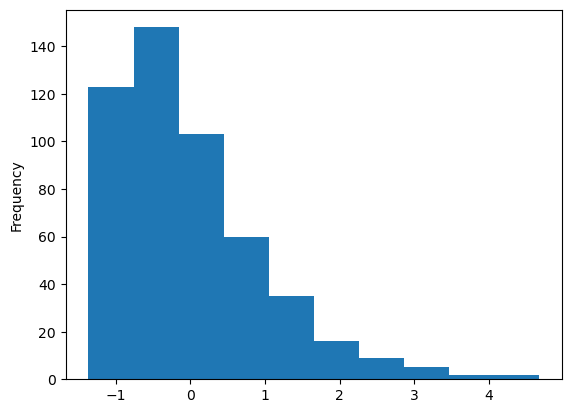

In [722]:
Value_.plot.hist()

In [776]:
oszlopok = Value.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,0.041364,0.041006,0.041394,0.040084,0.039899,0.039714,0.038973,0.038993,0.038628,0.038336,...,0.026232,0.026130,0.026392,0.026431,0.026548,0.026602,0.026633,0.026623,0.028032,0.031279
AMT,0.025222,0.024783,0.025504,0.024860,0.024769,0.024495,0.023901,0.023526,0.023476,0.023640,...,0.025970,0.025945,0.025924,0.025573,0.025474,0.025366,0.025324,0.025267,0.025864,0.025586
CMA,0.135724,0.134137,0.135631,0.132627,0.134000,0.132582,0.131709,0.130116,0.130730,0.131291,...,0.157217,0.154383,0.159445,0.156250,0.155912,0.153057,0.152975,0.152197,0.183607,0.181739
MSFT,0.042452,0.044313,0.045578,0.045112,0.044677,0.044338,0.043120,0.042657,0.042529,0.042328,...,0.031752,0.031723,0.031940,0.031707,0.031606,0.031606,0.031668,0.031539,0.033118,0.033935
ZION,0.162861,0.157492,0.160066,0.154328,0.154919,0.154873,0.154006,0.153623,0.153771,0.155254,...,0.197775,0.193997,0.200046,0.195432,0.193740,0.190185,0.191617,0.190946,0.177038,0.175324


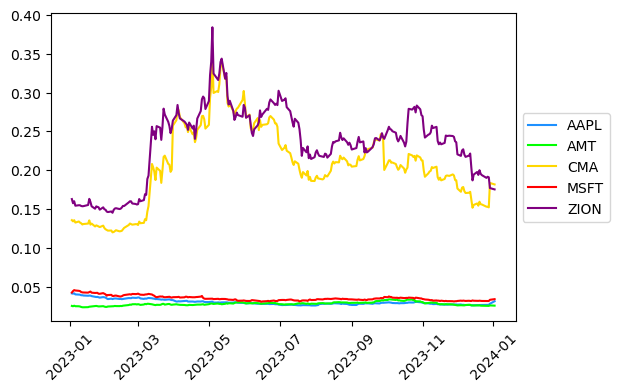

In [777]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Size

In [463]:
logmc=Market_cap.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logmc=logmc.fillna(0)
logmc

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,10.701505,9.021567,14.503458,12.567815,10.906650,12.160347,10.047686,12.046135,11.961668,11.323400,...,9.179961,10.554398,12.991433,8.857297,9.901553,10.484672,10.192794,9.505550,8.888822,11.133752
2023-01-04,10.712310,9.086154,14.513720,12.575850,10.950661,12.175112,10.052637,12.042725,11.974906,11.344475,...,9.239919,10.562924,12.994339,8.890097,9.900016,10.498128,10.202022,9.516215,8.924696,11.148018
2023-01-05,10.715207,9.115163,14.503059,12.574628,10.939212,12.171419,10.055342,12.018829,11.936177,11.306264,...,9.244748,10.542482,13.016467,8.869459,9.871212,10.490483,10.183321,9.505011,8.907022,11.124173
2023-01-06,10.685583,9.128652,14.539192,12.593172,10.948404,12.185133,10.070479,12.042242,11.949214,11.342121,...,9.268869,10.571659,13.028481,8.879682,9.906147,10.510562,10.180303,9.555108,8.944994,11.139117
2023-01-09,10.684228,9.158526,14.543272,12.563371,10.956505,12.183529,10.051043,12.058966,11.976575,11.351622,...,9.276958,10.581291,13.009668,8.866433,9.910809,10.506486,10.183083,9.576350,8.940301,11.135181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,10.620471,9.129288,14.914942,12.517181,11.407024,12.152828,10.219461,12.370793,12.514982,11.499755,...,9.237769,10.444374,12.921926,8.926586,10.217979,10.505422,10.141498,9.557440,8.802209,11.404858
2023-12-27,10.620542,9.120747,14.915460,12.518861,11.391257,12.157942,10.219869,12.371895,12.511331,11.502165,...,9.233695,10.432903,12.917216,8.929116,10.224646,10.509865,10.139106,9.558492,8.793931,11.411994
2023-12-28,10.620185,9.120032,14.917684,12.518021,11.394547,12.163483,10.226915,12.365573,12.510392,11.506620,...,9.246086,10.438574,12.902650,8.927992,10.224121,10.507416,10.143226,9.556895,8.797295,11.413313


In [464]:
logsales=SALES.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logsales=logsales.fillna(0)
logsales

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,7.5224,9.487138,11.671245,9.623840,7.550661,9.219399,8.030047,9.664456,8.417373,8.085707,...,6.912680,8.307213,11.442117,6.890609,7.317212,7.610358,7.509390,7.315218,6.895683,7.620705
2023-01-04,7.5224,9.487138,11.671245,9.623840,7.550661,9.219399,8.030047,9.664456,8.417373,8.085707,...,6.912680,8.307213,11.442117,6.890609,7.317212,7.610358,7.509390,7.315218,6.895683,7.620705
2023-01-05,7.5224,9.487138,11.671245,9.623840,7.550661,9.219399,8.030047,9.664456,8.417373,8.085707,...,6.912680,8.307213,11.442117,6.890609,7.317212,7.610358,7.509390,7.315218,6.895683,7.620705
2023-01-06,7.5224,9.487138,11.671245,9.623840,7.550661,9.219399,8.030047,9.664456,8.417373,8.085707,...,6.912680,8.307213,11.442117,6.890609,7.317212,7.610358,7.509390,7.315218,6.895683,7.620705
2023-01-09,7.5224,9.487138,11.671245,9.623840,7.550661,9.219399,8.030047,9.664456,8.417373,8.085707,...,6.912680,8.307213,11.442117,6.890609,7.317212,7.610358,7.509390,7.315218,6.895683,7.620705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,7.4313,9.509111,11.401972,9.541585,8.130648,9.224539,8.110427,9.694266,8.526747,7.907094,...,7.421738,8.205765,11.391548,6.853299,7.638198,7.443078,7.469426,6.862758,7.081709,7.673688
2023-12-27,7.4313,9.509111,11.401972,9.541585,8.130648,9.224539,8.110427,9.694266,8.526747,7.907094,...,7.421738,8.205765,11.391548,6.853299,7.638198,7.443078,7.469426,6.862758,7.081709,7.673688
2023-12-28,7.4313,9.509111,11.401972,9.541585,8.130648,9.224539,8.110427,9.694266,8.526747,7.907094,...,7.421738,8.205765,11.391548,6.853299,7.638198,7.443078,7.469426,6.862758,7.081709,7.673688


In [465]:
logta=total_asset.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logta=logta.fillna(0)
logta

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,9.262174,11.077764,12.756351,11.840825,9.682716,11.217722,10.778758,10.760363,10.209685,10.825807,...,9.504136,11.021706,12.818733,8.941545,8.981179,8.673513,9.955416,8.926518,11.402497,9.610793
2023-01-04,9.262174,11.077764,12.756351,11.840825,9.682716,11.217722,10.778758,10.760363,10.209685,10.825807,...,9.504136,11.021706,12.818733,8.941545,8.981179,8.673513,9.955416,8.926518,11.402497,9.610793
2023-01-05,9.262174,11.077764,12.756351,11.840825,9.682716,11.217722,10.778758,10.760363,10.209685,10.825807,...,9.504136,11.021706,12.818733,8.941545,8.981179,8.673513,9.955416,8.926518,11.402497,9.610793
2023-01-06,9.262174,11.077764,12.756351,11.840825,9.682716,11.217722,10.778758,10.760363,10.209685,10.825807,...,9.504136,11.021706,12.818733,8.941545,8.981179,8.673513,9.955416,8.926518,11.402497,9.610793
2023-01-09,9.262174,11.077764,12.756351,11.840825,9.682716,11.217722,10.778758,10.760363,10.209685,10.825807,...,9.504136,11.021706,12.818733,8.941545,8.981179,8.673513,9.955416,8.926518,11.402497,9.610793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,9.283870,11.093022,12.773041,11.822034,9.972967,11.185671,10.919207,10.849946,10.301559,10.795372,...,9.498242,11.048824,12.827345,8.881975,9.674389,8.711279,9.962572,8.899867,11.376751,9.554356
2023-12-27,9.283870,11.093022,12.773041,11.822034,9.972967,11.185671,10.919207,10.849946,10.301559,10.795372,...,9.498242,11.048824,12.827345,8.881975,9.674389,8.711279,9.962572,8.899867,11.376751,9.554356
2023-12-28,9.283870,11.093022,12.773041,11.822034,9.972967,11.185671,10.919207,10.849946,10.301559,10.795372,...,9.498242,11.048824,12.827345,8.881975,9.674389,8.711279,9.962572,8.899867,11.376751,9.554356


In [832]:
Size=0.28*logmc+0.36*logsales+0.36*logta
Size

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,9.038868,9.929403,12.854903,11.246268,9.257878,10.762261,9.584522,10.725853,10.055008,9.978697,...,8.480443,9.913642,12.371507,8.179619,8.639856,8.797901,9.141312,8.508579,9.076215,9.320790
2023-01-04,9.041893,9.947488,12.857776,11.248518,9.270201,10.766395,9.585908,10.724898,10.058715,9.984598,...,8.497231,9.916030,12.372321,8.188803,8.639425,8.801669,9.143896,8.511565,9.086259,9.324784
2023-01-05,9.042704,9.955610,12.854791,11.248175,9.266995,10.765361,9.586666,10.718207,10.047870,9.973899,...,8.498583,9.910306,12.378517,8.183024,8.631360,8.799529,9.138660,8.508428,9.081311,9.318108
2023-01-06,9.034410,9.959387,12.864908,11.253367,9.269569,10.769201,9.590904,10.724763,10.051521,9.983939,...,8.505337,9.918475,12.381881,8.185887,8.641142,8.805151,9.137815,8.522455,9.091943,9.322292
2023-01-09,9.034030,9.967752,12.866051,11.245023,9.271837,10.768752,9.585462,10.729445,10.059182,9.986599,...,8.507602,9.921172,12.376613,8.182177,8.642447,8.804010,9.138593,8.528403,9.090629,9.321190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,8.991193,9.972968,12.879188,11.195713,9.711268,10.750467,9.712117,10.859738,10.282385,9.952819,...,8.677768,9.856077,12.336941,8.164143,9.093566,8.757087,9.115139,8.350628,9.109664,9.395456
2023-12-27,8.991213,9.970577,12.879333,11.196184,9.706853,10.751899,9.712232,10.860047,10.281363,9.953494,...,8.676627,9.852865,12.335622,8.164851,9.095432,8.758331,9.114469,8.350923,9.107346,9.397454
2023-12-28,8.991113,9.970377,12.879956,11.195949,9.707775,10.753451,9.714205,10.858276,10.281100,9.954741,...,8.680097,9.854453,12.331544,8.164537,9.095285,8.757645,9.115623,8.350476,9.108288,9.397823


In [833]:
normal=pd.DataFrame(index= Size.index, columns=Size.columns)
for index, row in Size.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normal.loc[index] = normalized_row
normal

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.419218,0.339889,2.833635,1.462407,-0.232531,1.049831,0.045906,1.018796,0.446957,0.381908,...,-0.895229,0.326454,2.42158,-1.151657,-0.759343,-0.624622,-0.331893,-0.871246,-0.387383,-0.178903
2023-01-04,-0.427552,0.349176,2.845331,1.46507,-0.231733,1.051553,0.039049,1.015961,0.444575,0.381006,...,-0.894709,0.322195,2.428956,-1.159248,-0.772749,-0.633593,-0.340064,-0.882415,-0.389499,-0.184917
2023-01-05,-0.424037,0.358479,2.843571,1.466428,-0.231781,1.052573,0.042231,1.012154,0.437562,0.374156,...,-0.890441,0.319645,2.435323,-1.160929,-0.776629,-0.63248,-0.341787,-0.882003,-0.390945,-0.187969
2023-01-06,-0.436679,0.356069,2.846231,1.465068,-0.235137,1.050115,0.040262,1.01203,0.435031,0.377111,...,-0.890118,0.321005,2.432254,-1.163901,-0.773727,-0.633164,-0.348056,-0.875447,-0.38737,-0.189951
2023-01-09,-0.437315,0.363421,2.848929,1.458777,-0.233378,1.050338,0.035579,1.01663,0.441829,0.379584,...,-0.888767,0.323476,2.4292,-1.167843,-0.773127,-0.634575,-0.347645,-0.870929,-0.388778,-0.191054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.600214,0.326786,3.070862,1.481311,0.079687,1.060907,0.080489,1.164081,0.61894,0.307761,...,-0.896152,0.216416,2.558867,-1.381121,-0.503553,-0.821259,-0.483183,-1.20504,-0.488352,-0.218505
2023-12-27,-0.600532,0.324246,3.07088,1.481542,0.075222,1.062021,0.0803,1.16414,0.61771,0.308116,...,-0.897583,0.213095,2.557473,-1.380835,-0.502121,-0.820434,-0.484145,-1.205134,-0.490871,-0.216933
2023-12-28,-0.601001,0.323773,3.071452,1.481149,0.075783,1.063274,0.081855,1.162267,0.617206,0.309008,...,-0.894711,0.214299,2.553556,-1.381584,-0.502625,-0.821478,-0.48342,-1.205991,-0.490346,-0.216921


In [834]:
Size=normal

In [835]:
Size=Size.astype(float)
Size.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [836]:
#NaN ellenorzese
x=0
for column in Size.columns:
    has_nan = Size[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [837]:
#inf ellenorzese
szumma=0
for column in Size.columns:
    has_inf = np.isinf(Size[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [70]:
Size_=Size.iloc[-1]

<Axes: ylabel='Frequency'>

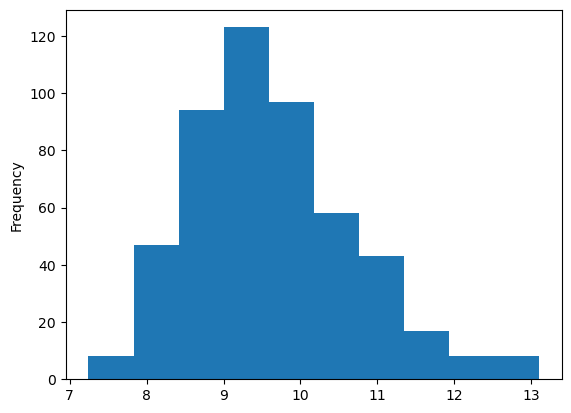

In [71]:
Size_.plot.hist()

In [201]:
oszlopok = Size.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,2.833635,2.845331,2.843571,2.846231,2.848929,2.848143,2.852132,2.849281,2.851230,2.854964,...,3.075733,3.075332,3.076795,3.074934,3.073288,3.070862,3.070880,3.071452,3.069896,3.140304
AMT,0.459768,0.459082,0.453705,0.455144,0.456262,0.457385,0.461376,0.464675,0.464711,0.463586,...,0.422999,0.421244,0.425905,0.426875,0.427214,0.426778,0.427088,0.427350,0.426489,0.416386
CMA,-0.312139,-0.319333,-0.319612,-0.319630,-0.322692,-0.321671,-0.323148,-0.320853,-0.322767,-0.323575,...,-0.414634,-0.411760,-0.416284,-0.413699,-0.414242,-0.410666,-0.410944,-0.409989,-0.412603,-0.456992
MSFT,2.578346,2.575254,2.568999,2.565839,2.569711,2.569690,2.575634,2.576866,2.577108,2.579761,...,2.974089,2.972695,2.975137,2.975503,2.976040,2.974421,2.973880,2.974709,2.975154,3.002516
ZION,-0.387383,-0.389499,-0.390945,-0.387370,-0.388778,-0.390412,-0.392202,-0.392380,-0.393284,-0.395416,...,-0.495603,-0.492454,-0.496350,-0.493148,-0.491848,-0.488352,-0.490871,-0.490346,-0.494078,-0.502455


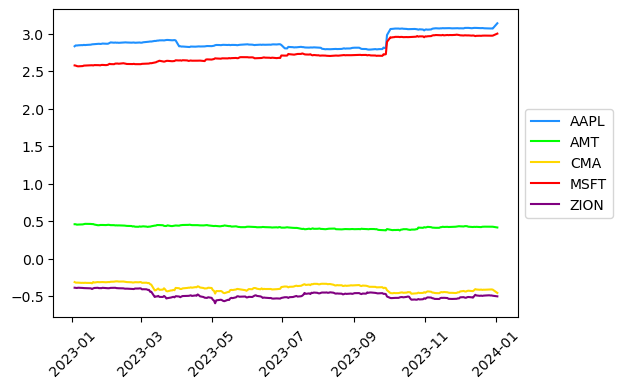

In [202]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Trading Activity

In [470]:
volume=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Volume", index_col=0)
shares_out=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SH OUT", index_col=0)

In [471]:
#Volume/Share outstanding
v_per_s=volume/(shares_out*1000000)
v_per_s=v_per_s.fillna(0)
v_per_s.replace([np.inf, -np.inf], 0, inplace=True)
v_per_s

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.002231,0.017706,0.002083,0.001278,0.014030,0.001035,0.002019,0.001346,0.002708,0.003464,...,0.009992,0.002835,0.001549,0.003920,0.001634,0.001911,0.001802,0.002562,0.004528,0.001391
2021-01-05,0.002204,0.013725,0.001186,0.000828,0.012933,0.000797,0.001834,0.000900,0.001707,0.001973,...,0.005620,0.001867,0.001732,0.002895,0.001841,0.001521,0.001274,0.002526,0.003283,0.001022
2021-01-06,0.002490,0.017259,0.002076,0.001485,0.006718,0.001012,0.002818,0.001318,0.003167,0.003077,...,0.006649,0.002472,0.001649,0.002600,0.001977,0.001425,0.001715,0.003118,0.009200,0.001216
2021-01-07,0.001693,0.012247,0.001425,0.000997,0.008457,0.000988,0.001988,0.001254,0.002375,0.003220,...,0.007909,0.002134,0.001741,0.002115,0.002777,0.002537,0.001782,0.002613,0.005788,0.001025
2021-01-08,0.001481,0.015869,0.001335,0.000923,0.009652,0.000903,0.001621,0.001142,0.001659,0.003986,...,0.007286,0.001989,0.001740,0.002076,0.002243,0.001448,0.001742,0.002631,0.006203,0.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000838,0.007019,0.000587,0.000371,0.002556,0.000528,0.001424,0.000901,0.001067,0.001572,...,0.003931,0.001525,0.001049,0.001971,0.000610,0.000774,0.003800,0.001305,0.002776,0.000572
2023-12-27,0.001091,0.006640,0.000889,0.001076,0.003727,0.000550,0.000950,0.000786,0.001200,0.001619,...,0.003470,0.001984,0.000882,0.002196,0.001632,0.001321,0.001650,0.001864,0.003820,0.000552
2023-12-28,0.001179,0.004962,0.000697,0.000571,0.002129,0.000608,0.001478,0.000885,0.001641,0.002114,...,0.003310,0.001590,0.000838,0.002036,0.001059,0.001376,0.000872,0.001509,0.003433,0.000635


In [838]:
start_index = v_per_s.index.get_loc('2023-01-03')
end_index = len(v_per_s)
trad_act = pd.DataFrame(index=v_per_s.index[start_index:end_index], columns=v_per_s.columns)

sum_values=0
for i in range(start_index, end_index):
    for k in range(-500, 0):
        x=np.exp(k*np.log(2)/180)*v_per_s.iloc[i+k, :]
        sum_values = sum_values+x
    trad_act.iloc[i-start_index, :] = sum_values
    sum_values=0

trad_act

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.360268,2.299246,0.286815,0.226565,1.359389,0.220102,0.572621,0.267228,0.55371,0.697719,...,1.98381,0.542766,0.305587,0.767185,0.472619,0.420664,0.417032,0.652522,0.86491,0.297289
2023-01-04,0.360254,2.295219,0.287261,0.226306,1.355969,0.219955,0.571863,0.267399,0.552998,0.696817,...,1.984928,0.542505,0.305156,0.767129,0.472161,0.420601,0.416617,0.652235,0.864459,0.29719
2023-01-05,0.359907,2.296656,0.287271,0.226115,1.352592,0.219934,0.571295,0.267222,0.552447,0.696352,...,1.990749,0.542333,0.304773,0.77088,0.471889,0.42019,0.416306,0.651954,0.86477,0.297013
2023-01-06,0.359731,2.294776,0.287142,0.225679,1.349427,0.219968,0.570922,0.266969,0.551759,0.697608,...,1.991841,0.541701,0.304101,0.778811,0.472927,0.419642,0.417138,0.651747,0.863657,0.296618
2023-01-09,0.359782,2.293778,0.287308,0.225527,1.345313,0.219747,0.570161,0.266685,0.551395,0.698039,...,1.990918,0.541447,0.303682,0.779889,0.472238,0.419572,0.418233,0.652778,0.86386,0.296253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.399281,2.014126,0.24821,0.21909,1.104336,0.22218,0.526694,0.25514,0.54719,0.645274,...,1.686452,0.604603,0.277111,0.890746,0.536581,0.431262,0.482687,0.700438,1.645277,0.287057
2023-12-27,0.398453,2.012478,0.247732,0.218522,1.102424,0.22177,0.52602,0.25495,0.545932,0.644097,...,1.683055,0.603648,0.277002,0.88893,0.534925,0.430158,0.484091,0.698915,1.641409,0.286427
2023-12-28,0.397906,2.010225,0.24757,0.218576,1.101634,0.221401,0.524858,0.254655,0.544874,0.643021,...,1.679089,0.603139,0.276724,0.887359,0.534367,0.429716,0.483682,0.697987,1.638704,0.285786


In [839]:
normaltrad=pd.DataFrame(index= trad_act.index, columns=trad_act.columns)
for index, row in trad_act.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normaltrad.loc[index] = normalized_row
normaltrad

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.645162,6.026791,-0.897909,-1.105228,2.792777,-1.127469,0.085539,-0.965309,0.020466,0.515996,...,4.941386,-0.017191,-0.833315,0.755026,-0.258565,-0.437341,-0.449838,0.360472,1.091293,-0.861871
2023-01-04,-0.644761,6.016615,-0.896048,-1.105893,2.78312,-1.127758,0.083732,-0.964426,0.018785,0.513904,...,4.948396,-0.017338,-0.834443,0.755962,-0.259506,-0.437007,-0.450724,0.360421,1.091034,-0.861869
2023-01-05,-0.645965,6.022319,-0.896053,-1.106614,2.771878,-1.127893,0.081853,-0.965081,0.016958,0.512425,...,4.969072,-0.017865,-0.835793,0.76903,-0.260407,-0.438408,-0.451782,0.359561,1.092295,-0.862508
2023-01-06,-0.646588,6.017382,-0.896575,-1.108241,2.761758,-1.12791,0.080717,-0.966045,0.014723,0.517003,...,4.974127,-0.019916,-0.838168,0.796654,-0.256763,-0.440266,-0.44889,0.359065,1.088849,-0.863941
2023-01-09,-0.646037,6.017694,-0.895753,-1.108623,2.749685,-1.128539,0.078839,-0.966811,0.014179,0.519452,...,4.974167,-0.020096,-0.839335,0.801473,-0.258564,-0.440029,-0.44464,0.363501,1.090802,-0.864934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.579019,5.012016,-1.102065,-1.202888,1.862076,-1.192191,-0.137879,-1.078074,-0.066916,0.272675,...,3.877521,0.131863,-1.002003,1.122567,-0.10365,-0.46829,-0.290243,0.463671,3.73496,-0.967568
2023-12-27,-0.579464,5.016636,-1.10204,-1.203317,1.861323,-1.192055,-0.137166,-1.077013,-0.068128,0.272227,...,3.874472,0.131982,-1.000554,1.121105,-0.106292,-0.469538,-0.282544,0.462289,3.730078,-0.967876
2023-12-28,-0.579945,5.017806,-1.101893,-1.202555,1.863303,-1.192746,-0.139186,-1.077294,-0.069694,0.27106,...,3.868148,0.132594,-1.000672,1.11937,-0.106172,-0.469505,-0.282142,0.461893,3.727937,-0.969212


In [840]:
trad_act=normaltrad

In [841]:
trad_act=trad_act.astype(float)
trad_act.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [474]:
#NaN ellenorzese
x=0
for column in trad_act.columns:
    has_nan = trad_act[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [475]:
#inf ellenorzese
szumma=0
for column in trad_act.columns:
    has_inf = np.isinf(trad_act[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [1319]:
trad_act_=trad_act.iloc[-1]

<Axes: ylabel='Frequency'>

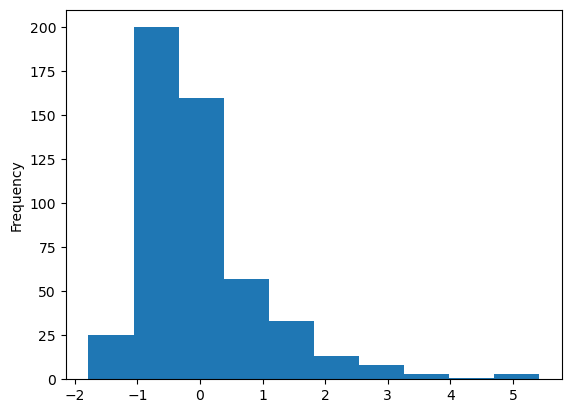

In [1320]:
trad_act_.plot.hist()

In [206]:
oszlopok = trad_act.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,-0.897909,-0.896048,-0.896053,-0.896575,-0.895753,-0.896893,-0.897433,-0.897409,-0.896676,-0.896818,...,-1.099383,-1.100274,-1.101033,-1.101420,-1.101723,-1.102065,-1.102040,-1.101893,-1.102288,-1.102390
AMT,-0.859920,-0.860903,-0.861720,-0.863986,-0.864663,-0.866245,-0.867330,-0.867391,-0.866542,-0.866762,...,-0.911271,-0.913254,-0.913708,-0.912574,-0.913083,-0.914664,-0.915035,-0.912089,-0.912560,-0.912377
CMA,0.376956,0.376909,0.378630,0.379313,0.380193,0.379544,0.378604,0.378696,0.382892,0.386081,...,1.776996,1.771965,1.766989,1.763882,1.763800,1.759603,1.755429,1.752529,1.751590,1.751453
MSFT,-0.908973,-0.909207,-0.906630,-0.905834,-0.903380,-0.903828,-0.903869,-0.903252,-0.902280,-0.902658,...,-1.017709,-1.018792,-1.020167,-1.020296,-1.021269,-1.021903,-1.022094,-1.022494,-1.022981,-1.023211
ZION,1.091293,1.091034,1.092295,1.088849,1.090802,1.088089,1.086592,1.081643,1.080138,1.078695,...,3.762846,3.757853,3.748882,3.743974,3.738709,3.734960,3.730078,3.727937,3.726764,3.725013


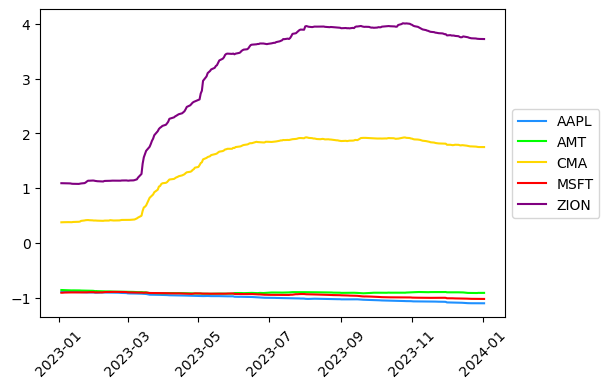

In [207]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Growth Forecast

In [476]:
eps_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="EPS 2016", index_col=0)
eps1y_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="best eps next year", index_col=0)
sales1y_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="best sales", index_col=0)

In [477]:
eps=eps_.replace(0, method='ffill')
eps1y=eps1y_.replace(0, method='ffill')
sales1y=sales1y_.replace(0, method='ffill')

In [76]:
#eps2y extrapolalas elsofoku polinommal
start_index = eps.index.get_loc('2023-01-03')
end_index = len(eps)
eps2y = pd.DataFrame(index=eps.index[start_index:end_index], columns=eps.columns)

for column_name in eps.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = eps.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=eps1y.iloc[i][column_name]
        tarol.append(y)
        X = np.arange(1, len(tarol) + 2) 
        Y = np.array(tarol)
        degree = 1  
        coefficients = np.polyfit(np.arange(1, len(tarol) + 1), Y, degree)
        poly_fit = np.poly1d(coefficients)
        next_X = X[-1]  
        next_Y = poly_fit(next_X)  
        eps2y.iloc[i - start_index][column_name] = next_Y


eps2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,6.4929,-4.870986,7.843643,12.832086,4.147129,5.6591,6.665086,13.7327,17.949029,11.041429,...,-5.262157,3.757443,11.441929,2.122714,3.359186,6.309286,5.958686,22.007971,7.221114,6.7352
2023-01-04,6.4929,-4.710243,7.8071,12.779571,4.153414,5.695814,6.623057,13.7327,17.949029,11.038,...,-5.260271,3.767386,11.456671,2.113457,3.456243,6.307714,5.952857,21.780543,7.165429,6.674
2023-01-05,6.503186,-4.710243,7.8071,12.779571,4.153986,5.695814,6.623057,13.7327,18.221029,11.038,...,-5.260271,3.767386,11.445243,2.113457,3.456243,6.307714,5.932286,21.780543,7.165429,6.674
2023-01-06,6.506043,-4.710243,7.8071,12.779571,4.153986,5.695814,6.623057,13.7327,18.221029,11.038,...,-5.260271,3.767386,11.372671,2.113457,3.456243,6.267143,5.932286,21.780543,7.165429,6.674
2023-01-09,6.506043,-4.710243,7.8071,12.810429,4.153986,5.702671,7.009914,13.7327,18.221029,11.038,...,-5.260271,3.7651,11.3201,2.113457,3.456243,6.267143,5.935714,21.780543,7.165429,6.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,6.2542,-0.837157,7.974786,11.611457,5.791486,5.444114,9.350729,14.374686,18.855557,10.677,...,-0.939886,3.799271,12.265343,1.926871,3.752271,6.3681,6.784686,15.164643,5.714314,6.643
2023-12-27,6.2542,-0.837157,7.974786,11.611457,5.776057,5.444114,9.350729,14.374686,18.855557,10.677,...,-0.939886,3.799271,12.265343,1.926871,3.752271,6.3681,6.784686,15.164643,5.714314,6.643
2023-12-28,6.2542,-0.837157,8.035557,11.611457,5.776057,5.444114,9.350729,14.374686,18.855557,10.677,...,-0.939886,3.799271,12.265343,1.926871,3.752271,6.3681,6.784686,15.164643,5.714314,6.643


In [478]:
#eps2y extrapolalas atlaggal
start_index = eps.index.get_loc('2023-01-03')
end_index = len(eps)
eps2y = pd.DataFrame(index=eps.index[start_index:end_index], columns=eps.columns)

for column_name in eps.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = eps.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=eps1y.iloc[i][column_name]
        tarol.append(y)
        atlag = sum(tarol) / len(tarol)
        eps2y.iloc[i - start_index][column_name] = atlag


eps2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,3.654071,-1.263729,4.479814,8.541686,1.199829,3.296543,3.470757,8.9224,9.2321,6.716271,...,-1.6736,2.8783,5.680543,1.874329,3.035029,4.026714,5.533443,11.832543,4.7696,4.138286
2023-01-04,3.654071,-1.231386,4.498086,8.585086,1.2014,3.295329,3.491771,8.9224,9.2321,6.715414,...,-1.674543,2.873329,5.675743,1.878957,2.9865,4.0275,5.536357,11.946257,4.797443,4.168886
2023-01-05,3.656643,-1.231386,4.498086,8.585086,1.201543,3.295329,3.491771,8.9224,9.3001,6.715414,...,-1.674543,2.873329,5.672886,1.878957,2.9865,4.0275,5.531214,11.946257,4.797443,4.168886
2023-01-06,3.657357,-1.231386,4.498086,8.585086,1.201543,3.295329,3.491771,8.9224,9.3001,6.715414,...,-1.674543,2.873329,5.654743,1.878957,2.9865,4.017357,5.531214,11.946257,4.797443,4.168886
2023-01-09,3.657357,-1.231386,4.498086,8.5928,1.201543,3.297043,3.588486,8.9224,9.3001,6.715414,...,-1.674543,2.872757,5.6416,1.878957,2.9865,4.017357,5.532071,11.946257,4.797443,4.168886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,3.944043,-1.701457,4.878957,8.823814,0.798314,3.397014,4.598857,9.724757,10.675586,7.192257,...,-1.838886,2.9662,6.2348,1.720229,3.129643,4.246143,5.476971,11.604171,4.726371,4.494314
2023-12-27,3.944043,-1.701457,4.878957,8.823814,0.794457,3.397014,4.598857,9.724757,10.675586,7.192257,...,-1.838886,2.9662,6.2348,1.720229,3.129643,4.246143,5.476971,11.604171,4.726371,4.494314
2023-12-28,3.944043,-1.701457,4.939729,8.823814,0.794457,3.397014,4.598857,9.724757,10.675586,7.192257,...,-1.838886,2.9662,6.2348,1.720229,3.129643,4.246143,5.476971,11.604171,4.726371,4.494314


In [77]:
#sales2y extrapolalas elsofoku polinommal
start_index = SALES_ism.index.get_loc('2023-01-03')
end_index = len(SALES_ism)
sales2y = pd.DataFrame(index=SALES_ism.index[start_index:end_index], columns=SALES_ism.columns)

for column_name in SALES_ism.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = SALES_ism.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=sales1y.iloc[i][column_name]
        tarol.append(y)
        X = np.arange(1, len(tarol) + 2) 
        Y = np.array(tarol)
        degree = 1  
        coefficients = np.polyfit(np.arange(1, len(tarol) + 1), Y, degree)
        poly_fit = np.poly1d(coefficients)
        next_X = X[-1] 
        next_Y = poly_fit(next_X)  
        sales2y.iloc[i - start_index][column_name] = next_Y

sales2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,1963.714286,11345.0,133602.571429,16769.618857,2363.213857,11767.285714,3463.420143,18622.287,5714.969286,3402.351857,...,1010.853429,4033.047429,94913.228571,995.1,1473.040571,1998.734857,1763.8,1706.666857,937.637143,2350.485714
2023-01-04,1963.714286,11499.285714,123391.924571,16557.047429,2350.849857,11550.142857,3480.119,18622.287,5714.969286,3402.351857,...,990.62,4096.190286,93213.342857,971.728571,1449.612,1958.449143,1690.885714,1680.666857,936.208571,2318.2
2023-01-05,1963.618857,11499.285714,123391.924571,16557.047429,2350.849857,11550.142857,3480.119,18628.164714,5714.969286,3402.351857,...,990.62,4096.190286,93213.342857,971.728571,1449.612,1958.449143,1689.265143,1680.666857,936.208571,2318.2
2023-01-06,1964.571429,11499.285714,123391.924571,16557.047429,2350.849857,11550.142857,3480.119,18628.164714,5714.969286,3402.351857,...,990.62,4096.190286,92190.428571,971.728571,1449.612,1958.714286,1689.265143,1680.666857,936.208571,2318.2
2023-01-09,1964.571429,11529.142857,123391.924571,16557.047429,2350.849857,11550.142857,3479.547571,18628.164714,5715.112143,3402.351857,...,990.62,4096.190286,92190.428571,971.728571,1449.612,1958.714286,1689.265143,1680.666857,936.033143,2318.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1849.821714,13079.257143,103929.172571,15567.618857,3157.213857,11155.857143,3888.935429,18702.862286,5945.984857,3140.983,...,1362.982571,4277.6,95318.326286,977.214286,2054.610286,1847.857143,1755.394857,1137.828571,948.218857,2373.381143
2023-12-27,1849.821714,13079.257143,103929.172571,15567.618857,3157.129286,11155.857143,3888.935429,18702.862286,5945.984857,3140.983,...,1362.982571,4277.6,95318.326286,977.214286,2054.610286,1847.857143,1755.394857,1137.828571,948.218857,2373.381143
2023-12-28,1849.821714,13079.257143,109694.812571,15567.618857,3157.129286,11155.857143,3888.935429,18712.973714,5945.984857,3140.983,...,1362.982571,4277.6,95318.326286,977.214286,2054.610286,1847.857143,1755.394857,1137.828571,948.218857,2373.381143


In [479]:
#sales2y extrapolalas atlaggal
start_index = SALES_ism.index.get_loc('2023-01-03')
end_index = len(SALES_ism)
sales2y = pd.DataFrame(index=SALES_ism.index[start_index:end_index], columns=SALES_ism.columns)

for column_name in SALES_ism.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = SALES_ism.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=sales1y.iloc[i][column_name]
        tarol.append(y)
        atlag2 = sum(tarol) / len(tarol)
        sales2y.iloc[i - start_index][column_name] = atlag2

sales2y

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,1515.571429,10331.107143,97817.107143,11505.904714,1168.443143,9305.571429,2204.027286,13181.789714,3548.302857,2107.954857,...,1307.321143,3268.904714,71672.914286,1041.728571,1363.081571,1721.469429,1918.514286,1298.952429,808.087857,1801.657143
2023-01-04,1515.571429,10293.821429,102917.445429,11612.190429,1165.352143,9414.142857,2195.677857,13181.789714,3548.302857,2107.954857,...,1317.437857,3237.333286,72525.514286,1053.414286,1374.795857,1741.612286,1954.971429,1311.952429,808.802143,1817.8
2023-01-05,1515.547571,10293.821429,102917.445429,11612.190429,1165.352143,9414.142857,2195.677857,13183.259143,3548.302857,2107.954857,...,1317.437857,3237.333286,72525.514286,1053.414286,1374.795857,1741.612286,1954.566286,1311.952429,808.802143,1817.8
2023-01-06,1515.785714,10293.821429,102917.445429,11612.190429,1165.352143,9414.142857,2195.677857,13183.259143,3548.302857,2107.954857,...,1317.437857,3237.333286,72269.785714,1053.414286,1374.795857,1741.678571,1954.566286,1311.952429,808.802143,1817.8
2023-01-09,1515.785714,10301.285714,102917.445429,11612.190429,1165.352143,9414.142857,2195.535,13183.259143,3548.338571,2107.954857,...,1317.437857,3237.333286,72269.785714,1053.414286,1374.795857,1741.678571,1954.566286,1311.952429,808.758286,1817.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1565.919714,10731.028571,78705.936,12106.047571,2113.125143,9413.071429,2418.423,13964.721714,3981.915857,2169.840857,...,1283.972857,3508.971429,76015.367286,955.8,1503.402571,1556.214286,1808.448714,1168.385714,834.447571,1881.523857
2023-12-27,1565.919714,10731.028571,78705.936,12106.047571,2113.104,9413.071429,2418.423,13964.721714,3981.915857,2169.840857,...,1283.972857,3508.971429,76015.367286,955.8,1503.402571,1556.214286,1808.448714,1168.385714,834.447571,1881.523857
2023-12-28,1565.919714,10731.028571,84495.738857,12106.047571,2113.104,9413.071429,2418.423,13967.249571,3981.915857,2169.840857,...,1283.972857,3508.971429,76015.367286,955.8,1503.402571,1556.214286,1808.448714,1168.385714,834.447571,1881.523857


In [480]:
eps1y_2023=eps1y.iloc[1762:2013]
sales1y_2023=sales1y.iloc[1762:2013]

### Growth

In [481]:
EPS_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="EPS 2016", index_col=0)
Earnings_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="is inc bef xo item 2016", index_col=0)

In [482]:
Earnings_ism = Earnings_.replace(0, method='ffill')

In [483]:
#total asset szamlalója
start_index = total_asset_ism.index.get_loc('2023-01-03')
end_index = len(total_asset_ism)
totass_szamlalo = pd.DataFrame(index=total_asset_ism.index[start_index:end_index], columns=total_asset_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = total_asset_ism.iloc[i-(k-1)*251] - total_asset_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    totass_szamlalo.iloc[i-start_index, :] = x
totass_szamlalo

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,421.2,2386.2,-12009.4,13603.8,3207.6,-362.4,3187.7698,4828.3242,2525.8888,5832.2112,...,146.6722,3631.6,4075.2,-546.3,218.4,107.0,-989.6,650.8,4651.4,1267.8
2023-01-04,421.2,2386.2,-12009.4,13603.8,3207.6,-362.4,3187.7698,4828.3242,2525.8888,5832.2112,...,146.6722,3631.6,4075.2,-546.3,218.4,107.0,-989.6,650.8,4651.4,1267.8
2023-01-05,421.2,2386.2,-12009.4,13603.8,3207.6,-362.4,3187.7698,4828.3242,2525.8888,5832.2112,...,146.6722,3631.6,4075.2,-546.3,218.4,107.0,-989.6,650.8,4651.4,1267.8
2023-01-06,421.2,2386.2,-12009.4,13603.8,3207.6,-362.4,3187.7698,4828.3242,2525.8888,5832.2112,...,146.6722,3631.6,4075.2,-546.3,218.4,107.0,-989.6,650.8,4651.4,1267.8
2023-01-09,421.2,2386.2,-12009.4,13603.8,3207.6,-362.4,3187.7698,4828.3242,2525.8888,5832.2112,...,146.6722,3631.6,4075.2,-546.3,218.4,107.0,-989.6,650.8,4651.4,1267.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,444.4,1026.2,-4227.2,15373.8,2965.1822,983.4,4601.7342,4964.9884,2202.0636,5671.2224,...,23.9984,3376.6,5212.6,-297.2,1736.6,388.2,-581.9,598.4,3704.6,665.8
2023-12-27,444.4,1026.2,-4227.2,15373.8,2965.1822,983.4,4601.7342,4964.9884,2202.0636,5671.2224,...,23.9984,3376.6,5212.6,-297.2,1736.6,388.2,-581.9,598.4,3704.6,665.8
2023-12-28,444.4,1026.2,-4227.2,15373.8,2965.1822,983.4,4601.7342,4964.9884,2202.0636,5671.2224,...,23.9984,3376.6,5212.6,-297.2,1736.6,388.2,-581.9,598.4,3704.6,665.8


In [484]:
#sales szamlalója
start_index = SALES_ism.index.get_loc('2023-01-03')
end_index = len(SALES_ism)
sales_szamlalo = pd.DataFrame(index=SALES_ism.index[start_index:end_index], columns=SALES_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = SALES_ism.iloc[i-(k-1)*251] - SALES_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    sales_szamlalo.iloc[i-start_index, :] = x
sales_szamlalo

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,132.0,515.6,5772.2,1476.4,380.4,500.4,330.1554,1172.6978,503.681,341.3092,...,-123.4454,251.4,5570.4,-21.6,45.8,88.4,-48.64,95.4,57.4,116.0
2023-01-04,132.0,515.6,5772.2,1476.4,380.4,500.4,330.1554,1172.6978,503.681,341.3092,...,-123.4454,251.4,5570.4,-21.6,45.8,88.4,-48.64,95.4,57.4,116.0
2023-01-05,132.0,515.6,5772.2,1476.4,380.4,500.4,330.1554,1172.6978,503.681,341.3092,...,-123.4454,251.4,5570.4,-21.6,45.8,88.4,-48.64,95.4,57.4,116.0
2023-01-06,132.0,515.6,5772.2,1476.4,380.4,500.4,330.1554,1172.6978,503.681,341.3092,...,-123.4454,251.4,5570.4,-21.6,45.8,88.4,-48.64,95.4,57.4,116.0
2023-01-09,132.0,515.6,5772.2,1476.4,380.4,500.4,330.1554,1172.6978,503.681,341.3092,...,-123.4454,251.4,5570.4,-21.6,45.8,88.4,-48.64,95.4,57.4,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,78.8,508.8,1037.6,1124.4,511.2826,475.6,395.396,1123.7514,516.675,236.0712,...,-3.13,156.4,4063.4,-22.54,138.0,30.0,-63.48,-36.2,78.8,117.4
2023-12-27,78.8,508.8,1037.6,1124.4,511.2826,475.6,395.396,1123.7514,516.675,236.0712,...,-3.13,156.4,4063.4,-22.54,138.0,30.0,-63.48,-36.2,78.8,117.4
2023-12-28,78.8,508.8,1037.6,1124.4,511.2826,475.6,395.396,1123.7514,516.675,236.0712,...,-3.13,156.4,4063.4,-22.54,138.0,30.0,-63.48,-36.2,78.8,117.4


In [485]:
#Earnings szamlalója
start_index = Earnings_ism.index.get_loc('2023-01-03')
end_index = len(Earnings_ism)
earnings_szamlalo = pd.DataFrame(index=Earnings_ism.index[start_index:end_index], columns=Earnings_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = Earnings_ism.iloc[i-(k-1)*251] - Earnings_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    earnings_szamlalo.iloc[i-start_index, :] = x
earnings_szamlalo

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,38.2,277.2,1986.6,484.0,63.8,379.4,132.1992,161.5516,134.8902,117.7152,...,-115.5018,38.0,929.2,127.04,15.8,-13.0,-272.28,36.4,32.2,76.0
2023-01-04,38.2,277.2,1986.6,484.0,63.8,379.4,132.1992,161.5516,134.8902,117.7152,...,-115.5018,38.0,929.2,127.04,15.8,-13.0,-272.28,36.4,32.2,76.0
2023-01-05,38.2,277.2,1986.6,484.0,63.8,379.4,132.1992,161.5516,134.8902,117.7152,...,-115.5018,38.0,929.2,127.04,15.8,-13.0,-272.28,36.4,32.2,76.0
2023-01-06,38.2,277.2,1986.6,484.0,63.8,379.4,132.1992,161.5516,134.8902,117.7152,...,-115.5018,38.0,929.2,127.04,15.8,-13.0,-272.28,36.4,32.2,76.0
2023-01-09,38.2,277.2,1986.6,484.0,63.8,379.4,132.1992,161.5516,134.8902,117.7152,...,-115.5018,38.0,929.2,127.04,15.8,-13.0,-272.28,36.4,32.2,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,56.0,-174.0,598.2,721.4,918.548,156.2,133.3352,143.7314,160.952,18.715,...,-127.2102,88.2,628.0,-53.5,-14.6,16.4,213.06,-26.0,-10.2,50.2
2023-12-27,56.0,-174.0,598.2,721.4,918.548,156.2,133.3352,143.7314,160.952,18.715,...,-127.2102,88.2,628.0,-53.5,-14.6,16.4,213.06,-26.0,-10.2,50.2
2023-12-28,56.0,-174.0,598.2,721.4,918.548,156.2,133.3352,143.7314,160.952,18.715,...,-127.2102,88.2,628.0,-53.5,-14.6,16.4,213.06,-26.0,-10.2,50.2


In [486]:
#total asset nevező

total_asset_nan=total_asset_.replace(0, np.nan)
start_index = total_asset_nan.index.get_loc('2023-01-03')
total_ass_nevezo = pd.DataFrame(index=total_asset_nan.index[start_index:], columns=total_asset_nan.columns)

for column in total_asset_nan.columns:
    atlag_lista = []
    for i in range(start_index, len(total_asset_nan)):
        window = total_asset_nan.loc[total_asset_nan.index[i-1260]:total_asset_nan.index[i], column]  
        atlag = window.mean()             
        atlag_lista.append(atlag)

    total_ass_nevezo [column] = atlag_lista  

total_ass_nevezo

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,9580.90,62213.333333,347983.714286,109097.809524,13124.936167,71165.857143,39747.807286,35685.3575,22198.37580,28731.64775,...,13012.768429,52273.809524,352501.571429,8875.409524,7895.857143,5411.619048,24020.542857,5313.142857,77714.761905,12163.380952
2023-01-04,9580.90,62213.333333,347983.714286,109097.809524,13124.936167,71165.857143,39747.807286,35685.3575,22198.37580,28731.64775,...,13012.768429,52273.809524,352501.571429,8875.409524,7895.857143,5411.619048,24020.542857,5313.142857,77714.761905,12163.380952
2023-01-05,9580.90,62684.750000,345043.200000,111013.400000,13124.936167,70911.650000,40132.614750,35685.3575,22198.37580,28731.64775,...,13029.319900,52736.000000,352692.100000,8800.455000,7947.650000,5416.650000,23920.870000,5365.050000,78286.100000,12342.250000
2023-01-06,9580.90,62684.750000,345043.200000,111013.400000,13124.936167,70911.650000,40132.614750,35685.3575,22198.37580,28731.64775,...,13029.319900,52736.000000,352692.100000,8800.455000,7947.650000,5416.650000,23920.870000,5365.050000,78286.100000,12342.250000
2023-01-09,9580.90,62684.750000,345043.200000,111013.400000,13124.936167,70911.650000,40132.614750,35685.3575,22198.37580,28731.64775,...,13029.319900,52736.000000,352692.100000,8800.455000,7947.650000,5416.650000,23920.870000,5365.050000,78286.100000,12342.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,10019.75,64745.750000,341911.050000,121462.650000,14676.282267,71325.550000,43330.034300,40840.0053,24652.01625,34496.83400,...,13251.057250,55397.950000,355323.800000,8528.455000,8849.350000,5634.200000,23205.925000,5831.900000,81456.250000,13035.100000
2023-12-27,10019.75,64745.750000,341911.050000,121462.650000,14676.282267,71325.550000,43330.034300,40840.0053,24652.01625,34496.83400,...,13251.057250,55397.950000,355323.800000,8528.455000,8849.350000,5634.200000,23205.925000,5831.900000,81456.250000,13035.100000
2023-12-28,10019.75,64745.750000,341911.050000,121462.650000,14676.282267,71325.550000,43330.034300,40840.0053,24652.01625,34496.83400,...,13251.057250,55397.950000,355323.800000,8528.455000,8849.350000,5634.200000,23205.925000,5831.900000,81456.250000,13035.100000


In [487]:
TAG=totass_szamlalo/total_ass_nevezo 
SG=sales_szamlalo/total_ass_nevezo 
EG=earnings_szamlalo/total_ass_nevezo 
EFG=eps2y/eps1y_2023
SFG=sales2y/sales1y_2023
TAG=TAG.fillna(0)
TAG.replace([np.inf, -np.inf], 0, inplace=True)
SG=SG.fillna(0)
SG.replace([np.inf, -np.inf], 0, inplace=True)
EG=EG.fillna(0)
EG.replace([np.inf, -np.inf], 0, inplace=True)
EFG=EFG.fillna(0)
EFG.replace([np.inf, -np.inf], 0, inplace=True)
SFG=SFG.fillna(0)
SFG.replace([np.inf, -np.inf], 0, inplace=True)

In [842]:
Growth=0.23*TAG+0.26*SG+0.15*EG+0.16*EFG+0.2*SFG
Growth

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.269319,0.129462,0.284932,0.325701,0.226572,0.286790,0.252569,0.290175,0.244224,0.281146,...,0.122447,0.308554,0.255535,0.307022,0.318632,0.303048,0.319941,0.290328,0.313317,0.288746
2023-01-04,0.269319,0.131620,0.295214,0.327581,0.227566,0.288198,0.252562,0.290175,0.244224,0.281185,...,0.123756,0.306698,0.257270,0.309712,0.318498,0.305421,0.324209,0.292859,0.314159,0.290933
2023-01-05,0.269177,0.131532,0.295191,0.327014,0.227562,0.288204,0.252360,0.290107,0.242882,0.281185,...,0.123757,0.306547,0.257401,0.309604,0.318445,0.305414,0.324876,0.292531,0.314057,0.290536
2023-01-06,0.268999,0.131532,0.295191,0.327014,0.227562,0.288204,0.252360,0.290107,0.242882,0.281185,...,0.123757,0.306547,0.260905,0.309604,0.318445,0.306098,0.324876,0.292531,0.314057,0.290536
2023-01-09,0.268999,0.130971,0.295191,0.326628,0.227562,0.288037,0.245964,0.290107,0.242877,0.281185,...,0.123757,0.306649,0.261549,0.309604,0.318445,0.306098,0.324811,0.292531,0.314110,0.290536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.311163,0.094147,0.271170,0.350743,0.298568,0.302871,0.244541,0.315524,0.260725,0.353432,...,0.095641,0.309354,0.295987,0.302949,0.310597,0.297547,0.289071,0.370315,0.402870,0.294096
2023-12-27,0.311163,0.094147,0.271170,0.350743,0.298589,0.302871,0.244541,0.315524,0.260725,0.353432,...,0.095641,0.309354,0.295987,0.302949,0.310597,0.297547,0.289071,0.370315,0.402870,0.294096
2023-12-28,0.311163,0.094147,0.284661,0.350743,0.298589,0.302871,0.244541,0.315385,0.260725,0.353432,...,0.095641,0.309354,0.295987,0.302949,0.310597,0.297547,0.289071,0.370315,0.402870,0.294096


In [843]:
normalgr=pd.DataFrame(index= Growth.index, columns=Growth.columns)
for index, row in Growth.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalgr.loc[index] = normalized_row
normalgr

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.320696,-2.480765,-0.079565,0.55012,-0.980919,-0.050865,-0.579402,0.001421,-0.708292,-0.13803,...,-2.589106,0.285287,-0.533589,0.261625,0.440932,0.200236,0.461158,0.00378,0.358839,-0.020659
2023-01-04,-0.336976,-2.432057,0.057019,0.549478,-0.972249,-0.04973,-0.59193,-0.019654,-0.718802,-0.156437,...,-2.551715,0.231747,-0.520305,0.277598,0.411272,0.212317,0.498166,0.021183,0.345256,-0.008123
2023-01-05,-0.334875,-2.414671,0.058187,0.539034,-0.963679,-0.047389,-0.588982,-0.018624,-0.73219,-0.153438,...,-2.532156,0.22977,-0.512812,0.275973,0.409547,0.212651,0.50673,0.018004,0.343245,-0.012146
2023-01-06,-0.327872,-2.2761,0.043322,0.494333,-0.915139,-0.055703,-0.563692,-0.028723,-0.698014,-0.155173,...,-2.386295,0.204258,-0.442596,0.247594,0.37288,0.197904,0.464033,0.005632,0.310692,-0.022647
2023-01-09,-0.333396,-2.380678,0.055084,0.521366,-0.948011,-0.051028,-0.675063,-0.020316,-0.720848,-0.152654,...,-2.487677,0.225032,-0.443898,0.268869,0.399989,0.216864,0.494412,0.015638,0.3357,-0.013957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.046175,-1.806051,-0.370499,0.274797,-0.148317,-0.113421,-0.586446,-0.010805,-0.455202,0.296607,...,-1.793943,-0.060845,-0.169247,-0.112788,-0.050763,-0.156592,-0.225324,0.433514,0.697523,-0.184581
2023-12-27,-0.050458,-0.452035,-0.124464,0.022782,-0.073726,-0.065803,-0.17374,-0.042388,-0.143792,0.027759,...,-0.449272,-0.053806,-0.078542,-0.065659,-0.051505,-0.075654,-0.091338,0.058999,0.119242,-0.082041
2023-12-28,-0.052892,-1.608057,-0.24281,0.230744,-0.143,-0.112316,-0.530318,-0.022636,-0.41434,0.250017,...,-1.597358,-0.065855,-0.161649,-0.111757,-0.056946,-0.150466,-0.211203,0.370999,0.604298,-0.175199


In [844]:
Growth=normalgr
Growth=Growth.astype(float)

In [845]:
#NaN ellenorzese
x=0
for column in Growth.columns:
    has_nan = Growth[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [846]:
#inf ellenorzese
szumma=0
for column in Growth.columns:
    has_inf = np.isinf(Growth[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [97]:
Growth_=Growth.iloc[-1]

<Axes: ylabel='Frequency'>

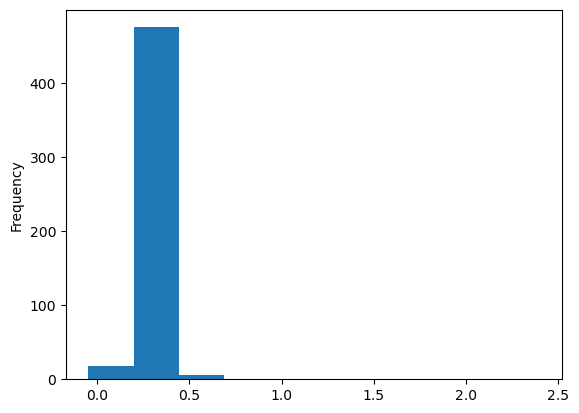

In [98]:
Growth_.plot.hist()

In [215]:
oszlopok = Growth.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,0.284932,0.295214,0.295191,0.295191,0.295191,0.295765,0.295765,0.296574,0.296574,0.296959,...,0.275643,0.275643,0.275643,0.275643,0.276014,0.271170,0.271170,0.284661,0.299906,0.324195
AMT,0.304050,0.304446,0.303946,0.303946,0.303946,0.303946,0.303946,0.303946,0.303984,0.303984,...,0.323865,0.323865,0.323865,0.323865,0.323865,0.323634,0.323721,0.323721,0.323721,0.330473
CMA,0.322587,0.323651,0.323606,0.322868,0.322825,0.322932,0.322932,0.322932,0.322932,0.322932,...,0.410479,0.410479,0.410796,0.410332,0.410332,0.410654,0.410654,0.410654,0.410654,0.396483
MSFT,0.254591,0.256953,0.256784,0.256859,0.256886,0.257034,0.257037,0.257037,0.257123,0.257489,...,0.277242,0.277242,0.277242,0.277270,0.277270,0.276595,0.276595,0.276595,0.276595,0.283892
ZION,0.313317,0.314159,0.314057,0.314057,0.314110,0.314110,0.314110,0.314110,0.314110,0.314110,...,0.404066,0.404066,0.403868,0.404028,0.404028,0.402870,0.402870,0.402870,0.402870,0.397838


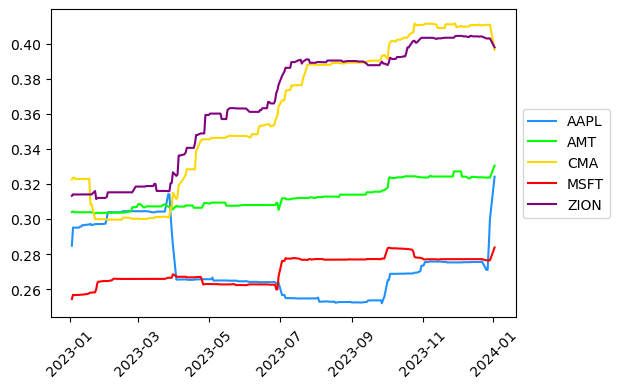

In [216]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(0.15, 0.55)
plt.xticks(rotation=45) 
plt.show()

### Leverage

In [492]:
book_value_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="book value", index_col=0)

In [493]:
book_value_ism = book_value_.replace(0, method='ffill')
book_value= book_value_ism.iloc[1762:2013]

In [494]:
szamlalo=LT_Debt+np.maximum(ST_Debt-cash, nulla)
nevezo=book_value+LT_Debt+np.maximum(ST_Debt-cash, nulla)

BLev=szamlalo/nevezo
BLev=BLev.fillna(0)
BLev.replace([np.inf, -np.inf], 0, inplace=True)

MLev=szamlalo/EV
MLev=MLev.fillna(0)
MLev.replace([np.inf, -np.inf], 0, inplace=True)

D2TA=szamlalo/total_asset
D2TA=D2TA.fillna(0)
D2TA.replace([np.inf, -np.inf], 0, inplace=True)

In [847]:
Leverage=0.34*BLev+0.33*MLev+0.33*D2TA
Leverage

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.446444,0.841225,0.450539,0.539273,0.398919,0.433728,0.391901,0.360622,0.394924,0.407030,...,0.869719,0.606939,0.410012,0.496863,0.457087,1.114055,0.483256,0.458148,0.576674,0.535172
2023-01-04,0.446244,0.838314,0.450386,0.538895,0.398370,0.433390,0.391742,0.360640,0.394817,0.406541,...,0.864893,0.606266,0.409931,0.495010,0.457131,1.113215,0.482818,0.457761,0.573820,0.534760
2023-01-05,0.446191,0.836965,0.450545,0.538953,0.398511,0.433474,0.391655,0.360767,0.395133,0.407434,...,0.864502,0.607881,0.409326,0.496172,0.457970,1.113691,0.483710,0.458168,0.575228,0.535451
2023-01-06,0.446743,0.836329,0.450012,0.538088,0.398398,0.433162,0.391173,0.360642,0.395025,0.406595,...,0.862547,0.605577,0.409002,0.495595,0.456955,1.112444,0.483855,0.456373,0.572197,0.535016
2023-01-09,0.446768,0.834900,0.449953,0.539483,0.398299,0.433199,0.391793,0.360555,0.394804,0.406377,...,0.861890,0.604820,0.409511,0.496343,0.456822,1.112696,0.483721,0.455632,0.572573,0.535130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.446593,0.816288,0.451020,0.530591,0.380671,0.429170,0.381368,0.354597,0.386136,0.398202,...,0.855241,0.616890,0.398929,0.497405,0.409103,1.069036,0.471738,0.491561,0.494797,0.520251
2023-12-27,0.446592,0.816709,0.451015,0.530513,0.380796,0.429059,0.381357,0.354593,0.386153,0.398157,...,0.855571,0.617818,0.399046,0.497267,0.408944,1.068764,0.471849,0.491517,0.495463,0.520098
2023-12-28,0.446599,0.816744,0.450990,0.530552,0.380770,0.428940,0.381167,0.354615,0.386157,0.398075,...,0.854566,0.617359,0.399412,0.497328,0.408956,1.068914,0.471658,0.491584,0.495192,0.520070


In [848]:
normallev=pd.DataFrame(index= Leverage.index, columns=Leverage.columns)
for index, row in Leverage.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normallev.loc[index] = normalized_row
normallev

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.576675,2.553619,-0.544205,0.159381,-0.953514,-0.677506,-1.009161,-1.257179,-0.985193,-0.889199,...,2.779556,0.695918,-0.865557,-0.176898,-0.492285,4.716942,-0.284784,-0.483871,0.455939,0.126863
2023-01-04,-0.5727,2.561773,-0.539587,0.168015,-0.955439,-0.675469,-1.008431,-1.257082,-0.983844,-0.890115,...,2.774261,0.70662,-0.86301,-0.182833,-0.485661,4.75952,-0.280306,-0.48063,0.44723,0.134955
2023-01-05,-0.576109,2.544338,-0.541339,0.16462,-0.95685,-0.677659,-1.011595,-1.258244,-0.983825,-0.885595,...,2.764228,0.715037,-0.870485,-0.176998,-0.482051,4.754079,-0.276512,-0.480469,0.454293,0.136658
2023-01-06,-0.564264,2.555333,-0.538082,0.16718,-0.951385,-0.673007,-1.009236,-1.25371,-0.97839,-0.885743,...,2.765273,0.707598,-0.866469,-0.173084,-0.482486,4.766313,-0.267092,-0.487152,0.44031,0.142584
2023-01-09,-0.564532,2.544397,-0.53902,0.178108,-0.95277,-0.673223,-1.004883,-1.2551,-0.980766,-0.888062,...,2.760583,0.701457,-0.862961,-0.167437,-0.484,4.769534,-0.268541,-0.493534,0.443163,0.143246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.544802,2.485061,-0.508521,0.14361,-1.085072,-0.687594,-1.079358,-1.298767,-1.040288,-0.941397,...,2.804299,0.850877,-0.935436,-0.128373,-0.852053,4.556471,-0.338723,-0.176264,-0.149744,0.058861
2023-12-27,-0.544521,2.489173,-0.508269,0.143349,-1.08382,-0.688228,-1.079221,-1.298599,-1.039914,-0.941518,...,2.807714,0.85895,-0.93423,-0.129158,-0.853108,4.555167,-0.337497,-0.176284,-0.143941,0.057978
2023-12-28,-0.544081,2.492044,-0.508061,0.144549,-1.084046,-0.688932,-1.080792,-1.298581,-1.039856,-0.942099,...,2.802278,0.856584,-0.931137,-0.127974,-0.852848,4.560476,-0.338529,-0.175091,-0.145491,0.058566


In [849]:
Leverage=normallev
Leverage=Leverage.astype(float)

In [850]:
#NaN ellenorzese
x=0
for column in Leverage.columns:
    has_nan = Leverage[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [851]:
#inf ellenorzese
szumma=0
for column in Leverage.columns:
    has_inf = np.isinf(Leverage[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [108]:
Leverage_=Leverage.iloc[-1]

<Axes: ylabel='Frequency'>

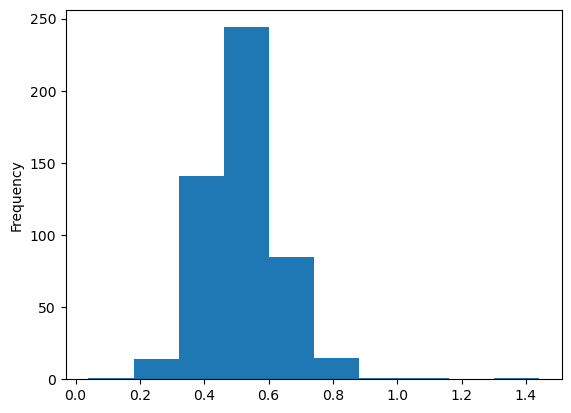

In [109]:
Leverage_.plot.hist()

In [1064]:
oszlopok = Leverage.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,-0.544205,-0.539587,-0.541339,-0.538082,-0.539020,-0.537664,-0.536575,-0.534917,-0.535510,-0.537657,...,-0.513754,-0.511596,-0.516107,-0.512642,-0.510954,-0.508521,-0.508269,-0.508061,-0.508370,-0.616376
AMT,1.167130,1.175826,1.188811,1.184354,1.182370,1.180109,1.171430,1.164126,1.163350,1.166851,...,1.305571,1.310449,1.299394,1.298231,1.296814,1.297303,1.296538,1.297080,1.298022,1.310640
CMA,-0.223668,-0.223245,-0.218677,-0.224803,-0.217755,-0.222632,-0.222848,-0.229515,-0.225553,-0.223494,...,0.551732,0.543625,0.557348,0.548606,0.548655,0.538455,0.538766,0.536703,0.543721,0.296051
MSFT,-0.815417,-0.807408,-0.807051,-0.801472,-0.803007,-0.802310,-0.802290,-0.802581,-0.802339,-0.804030,...,-0.895803,-0.893941,-0.897797,-0.895815,-0.894782,-0.892859,-0.892500,-0.892595,-0.893171,-0.813003
ZION,0.455939,0.447230,0.454293,0.440310,0.443163,0.446283,0.447945,0.448372,0.449733,0.455515,...,-0.126623,-0.136890,-0.122185,-0.134510,-0.139083,-0.149744,-0.143941,-0.145491,-0.134838,-0.051383


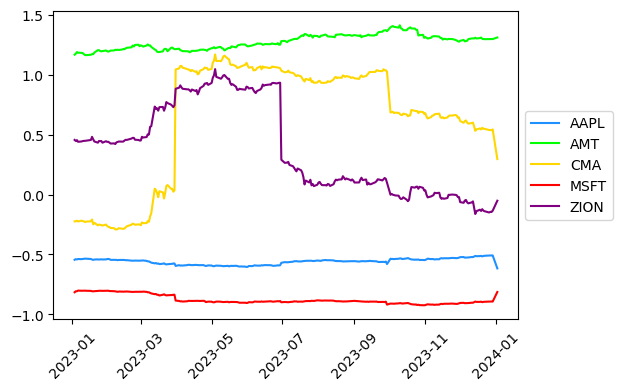

In [1066]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(0.2, 0.8)
plt.xticks(rotation=45) 
plt.show()

### Profitability

In [499]:
ROE_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROE", index_col=0 )
ROCE_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROCE", index_col=0 )
ROA_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROA", index_col=0 )
Ebitda_margin_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="EBITDA_MARGIN", index_col=0)

In [500]:
ROE_ism=ROE_.replace(0, method='ffill')
ROCE_ism=ROCE_.replace(0, method='ffill')
ROA_ism=ROA_.replace(0, method='ffill')
Ebitda_margin_ism=Ebitda_margin_.replace(0, method='ffill')
ROE=ROE_ism.iloc[1762:2013]
ROCE=ROCE_ism.iloc[1762:2013]
ROA=ROA_ism.iloc[1762:2013]
Ebitda_margin=Ebitda_margin_ism.iloc[1762:2013]

In [852]:
Profitability=0.26*(ROE/100)+0.28*(ROCE/100)+0.28*(ROA/100)+0.18*(Ebitda_margin/100)
Profitability

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.263200,0.172567,1.209236,1.370639,0.233282,0.213758,0.039014,0.400058,0.588692,0.299829,...,-0.981966,0.106329,0.236082,0.006579,0.114060,0.724485,0.053380,0.545032,0.042471,0.320224
2023-01-04,0.263200,0.172567,1.209236,1.370639,0.233282,0.213758,0.039014,0.400058,0.588692,0.299829,...,-0.981966,0.106329,0.236082,0.006579,0.114060,0.724485,0.053380,0.545032,0.042471,0.320224
2023-01-05,0.263200,0.172567,1.209236,1.370639,0.233282,0.213758,0.039014,0.400058,0.588692,0.299829,...,-0.981966,0.106329,0.236082,0.006579,0.114060,0.724485,0.053380,0.545032,0.042471,0.320224
2023-01-06,0.263200,0.172567,1.209236,1.370639,0.233282,0.213758,0.039014,0.400058,0.588692,0.299829,...,-0.981966,0.106329,0.236082,0.006579,0.114060,0.724485,0.053380,0.545032,0.042471,0.320224
2023-01-09,0.263200,0.172567,1.209236,1.370639,0.233282,0.213758,0.039014,0.400058,0.588692,0.299829,...,-0.981966,0.106329,0.236082,0.006579,0.114060,0.724485,0.053380,0.545032,0.042471,0.320224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.244218,0.173357,1.232630,0.978387,0.450815,0.181472,0.076383,0.357170,0.583487,0.328272,...,-0.995453,0.161061,0.170976,0.015365,0.126110,0.752918,0.108797,0.513697,0.048742,0.339199
2023-12-27,0.244218,0.173357,1.232630,0.978387,0.450815,0.181472,0.076383,0.357170,0.583487,0.328272,...,-0.995453,0.161061,0.170976,0.015365,0.126110,0.752918,0.108797,0.513697,0.048742,0.339199
2023-12-28,0.244218,0.173357,1.232630,0.978387,0.450815,0.181472,0.076383,0.357170,0.583487,0.328272,...,-0.995453,0.161061,0.170976,0.015365,0.126110,0.752918,0.108797,0.513697,0.048742,0.339199


In [853]:
normalprof=pd.DataFrame(index= Profitability.index, columns=Profitability.columns)
for index, row in Profitability.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalprof.loc[index] = normalized_row
normalprof

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.002895,-0.224752,2.312867,2.707956,-0.07613,-0.123921,-0.55167,0.332115,0.793864,0.086767,...,-3.050882,-0.386892,-0.069276,-0.631065,-0.367967,1.126264,-0.516503,0.686989,-0.543208,0.136691
2023-01-04,-0.002895,-0.224752,2.312867,2.707956,-0.07613,-0.123921,-0.55167,0.332115,0.793864,0.086767,...,-3.050882,-0.386892,-0.069276,-0.631065,-0.367967,1.126264,-0.516503,0.686989,-0.543208,0.136691
2023-01-05,-0.002895,-0.224752,2.312867,2.707956,-0.07613,-0.123921,-0.55167,0.332115,0.793864,0.086767,...,-3.050882,-0.386892,-0.069276,-0.631065,-0.367967,1.126264,-0.516503,0.686989,-0.543208,0.136691
2023-01-06,-0.002895,-0.224752,2.312867,2.707956,-0.07613,-0.123921,-0.55167,0.332115,0.793864,0.086767,...,-3.050882,-0.386892,-0.069276,-0.631065,-0.367967,1.126264,-0.516503,0.686989,-0.543208,0.136691
2023-01-09,-0.002895,-0.224752,2.312867,2.707956,-0.07613,-0.123921,-0.55167,0.332115,0.793864,0.086767,...,-3.050882,-0.386892,-0.069276,-0.631065,-0.367967,1.126264,-0.516503,0.686989,-0.543208,0.136691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.072132,-0.247916,2.379796,1.749103,0.440369,-0.227784,-0.488475,0.208066,0.769485,0.13638,...,-3.147352,-0.278418,-0.253821,-0.639841,-0.365118,1.189788,-0.408067,0.596358,-0.557044,0.163486
2023-12-27,-0.072132,-0.247916,2.379796,1.749103,0.440369,-0.227784,-0.488475,0.208066,0.769485,0.13638,...,-3.147352,-0.278418,-0.253821,-0.639841,-0.365118,1.189788,-0.408067,0.596358,-0.557044,0.163486
2023-12-28,-0.072132,-0.247916,2.379796,1.749103,0.440369,-0.227784,-0.488475,0.208066,0.769485,0.13638,...,-3.147352,-0.278418,-0.253821,-0.639841,-0.365118,1.189788,-0.408067,0.596358,-0.557044,0.163486


In [854]:
Profitability=normalprof
Profitability=Profitability.astype(float)

In [855]:
x=0
for column in Profitability.columns:
    has_nan = Profitability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [856]:
szumma=0
for column in Profitability.columns:
    has_inf = np.isinf(Profitability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [115]:
Profitability_=Profitability.iloc[-1]

<Axes: ylabel='Frequency'>

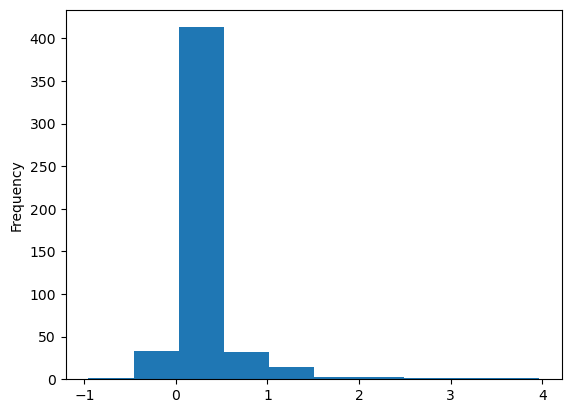

In [116]:
Profitability_.plot.hist()

In [1337]:
oszlopok = Profitability.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,2.312867,2.312867,2.312867,2.312867,2.312867,2.312867,2.312867,2.312867,2.312867,2.312867,...,2.379599,2.379599,2.379599,2.379599,2.379599,2.379796,2.379796,2.379796,2.378081,2.216326
AMT,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,-0.205200,...,-0.310026,-0.310026,-0.310026,-0.310026,-0.310026,-0.309895,-0.309895,-0.309895,-0.311005,-0.184500
CMA,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,-0.522086,...,-0.505103,-0.505103,-0.505103,-0.505103,-0.505103,-0.504978,-0.504978,-0.504978,-0.506044,-0.563532
MSFT,0.212291,0.212291,0.212291,0.212291,0.212291,0.212291,0.212291,0.212291,0.212291,0.212291,...,0.256629,0.256629,0.256629,0.256629,0.256629,0.256773,0.256773,0.256773,0.255536,0.295067
ZION,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,-0.543208,...,-0.557168,-0.557168,-0.557168,-0.557168,-0.557168,-0.557044,-0.557044,-0.557044,-0.558098,-0.580840


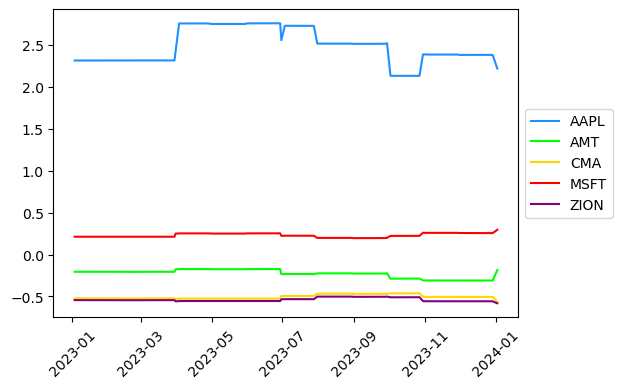

In [1338]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Earnings Variability

In [538]:
#Earnings=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="is inc bef xo item 2016", index_col=0 )
#total_asset5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="total ass 2016", index_col=0)
#sales5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="sales 2016", index_col=0)
#cash5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="cash 2016", index_col=0)

In [505]:
#Earnings=Earnings.replace(0, np.nan)
start_index = Earnings_ism.index.get_loc('2023-01-03')
result_dfear = pd.DataFrame(index=Earnings_ism.index[start_index:], columns=Earnings_ism.columns)

for column in Earnings_ism.columns:
    std_devs = []
    for i in range(start_index, len(Earnings_ism)):
        window = Earnings_ism.loc[Earnings_ism.index[i-1260]:Earnings_ism.index[i], column]  
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfear[column] = std_devs  

result_dfear

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,153.152333,1074.481013,6499.970060,1654.956680,966.036791,768.985199,208.038797,263.683132,383.035123,185.392972,...,345.352016,133.773173,7786.206301,371.439772,47.360935,102.893339,387.151309,75.694525,74.231329,112.451046
2023-01-04,153.198589,1074.604668,6504.730624,1654.992627,966.129459,768.822487,208.248672,264.210824,382.809429,185.993789,...,345.301847,133.724974,7789.903667,371.408506,47.384635,102.871725,387.221714,75.606285,74.252775,112.405643
2023-01-05,153.244681,1075.174071,6512.829184,1654.178140,966.222052,766.768620,208.710418,264.735914,382.582852,186.591503,...,344.802736,133.635129,7792.838519,371.093656,47.403668,102.837288,386.056837,75.540095,74.248585,112.009376
2023-01-06,153.290610,1075.742048,6520.908163,1653.361022,966.314570,764.706276,209.169830,265.258415,382.355393,187.186143,...,344.302291,133.545053,7795.770523,370.777854,47.422610,102.802815,384.885404,75.473571,74.244175,111.610887
2023-01-09,153.336375,1076.308603,6528.967634,1652.541270,966.407012,762.635385,209.626924,265.778345,382.127049,187.777740,...,343.800507,133.454746,7798.699683,370.461097,47.441462,102.768304,383.707355,75.406712,74.239546,111.210154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,105.421336,1138.957555,6631.222936,1630.130536,1378.119619,559.494259,245.700725,266.348159,344.867320,267.851277,...,299.842018,137.200953,8169.857703,259.636832,48.949245,98.436103,302.894251,76.627439,74.057483,96.754947
2023-12-27,105.562125,1138.762495,6629.511833,1629.964248,1383.443539,559.056478,245.755022,266.649661,344.767779,267.837960,...,299.652485,137.377502,8170.549168,259.717626,48.963934,98.403420,302.894416,76.746834,74.062332,96.754018
2023-12-28,105.702259,1138.566936,6627.792883,1629.797582,1388.739667,558.617473,245.808732,266.949605,344.667026,267.824621,...,299.462588,137.553700,8171.239926,259.798186,48.978612,98.370717,302.894580,76.865879,74.067161,96.752685


In [506]:
#cash5y=cash5y.replace(0, np.nan)
start_index = cash_ism.index.get_loc('2023-01-03')
result_dfcash = pd.DataFrame(index=cash_ism.index[start_index:], columns=cash_ism.columns)

for column in cash_ism.columns:
    std_devs = []
    for i in range(start_index, len(cash_ism)):
        window = cash_ism.loc[cash_ism.index[i-1260]:cash_ism.index[i], column] 
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfcash[column] = std_devs 

result_dfcash

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,109.467264,1520.788624,8737.180038,1512.278084,441.176523,787.193618,316.580138,859.135553,409.918206,257.580225,...,260.244390,306.869205,5173.800169,78.599862,120.135840,240.987108,128.497637,99.895437,161.038058,127.999917
2023-01-04,109.558764,1520.825889,8740.852452,1514.409574,441.139604,787.251854,316.706963,859.709796,410.394718,257.906201,...,259.971016,306.747633,5177.638624,78.599383,120.249875,240.977227,128.524696,99.766915,161.227993,128.197019
2023-01-05,109.650041,1520.826499,8745.248108,1516.009666,441.102377,787.249814,316.390893,860.283466,410.867269,258.231290,...,259.510462,306.747531,5181.411828,78.569132,120.310954,240.976781,128.573812,99.766372,161.397597,128.353094
2023-01-06,109.741095,1520.826849,8749.639209,1517.598341,441.064842,787.247399,316.072736,860.856563,411.335871,258.555495,...,259.048440,306.747430,5185.169633,78.538808,120.371987,240.976284,128.622786,99.765830,161.566495,128.508893
2023-01-09,109.831927,1520.826938,8754.025762,1519.175632,441.026997,787.244608,315.752484,861.429089,411.800539,258.878819,...,258.584940,306.747328,5188.912073,78.508412,120.432972,240.975736,128.671619,99.765287,161.734690,128.664417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,127.602981,1653.008241,8609.119430,1611.225898,563.900061,785.664798,368.466341,950.673518,395.900045,320.323236,...,230.779910,498.327812,5553.882716,82.760644,139.235121,232.998174,125.113728,132.891516,185.184087,151.564035
2023-12-27,127.710884,1652.987126,8608.405032,1612.797325,564.349596,785.656932,369.806619,951.284905,395.650318,320.494080,...,230.594629,500.407850,5555.444511,82.759589,139.353789,233.006283,125.055347,133.014790,185.151704,151.686176
2023-12-28,127.818594,1652.966004,8607.690260,1614.363596,564.797091,785.648992,371.138985,951.895715,395.400053,320.664393,...,230.409122,502.476607,5557.003197,82.758533,139.472200,233.014382,124.996830,133.137703,185.119295,151.808094


In [507]:
#sales5y=sales5y.replace(0, np.nan)
start_index = SALES_ism.index.get_loc('2023-01-03')
result_dfsales = pd.DataFrame(index=SALES_ism.index[start_index:], columns=SALES_ism.columns)

for column in SALES_ism.columns:
    std_devs = []
    for i in range(start_index, len(SALES_ism)):
        window = SALES_ism.loc[SALES_ism.index[i-1260]:SALES_ism.index[i], column]  
        std_dev = window.std()            
        std_devs.append(std_dev)

    result_dfsales[column] = std_devs 

result_dfsales

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,192.870836,3375.268164,19370.677510,2850.418681,649.574380,1581.580463,409.864065,1955.056400,782.889998,591.171036,...,487.428011,388.928883,18323.243890,130.998918,72.815594,178.947474,211.314787,173.398288,45.800794,227.330496
2023-01-04,193.143430,3376.772268,19388.755176,2850.669488,648.946325,1580.588164,410.993222,1956.657616,782.952784,592.458214,...,487.337404,389.834488,18335.182060,130.996244,73.017328,179.546216,211.313580,173.436398,46.201273,227.308298
2023-01-05,193.414224,3378.406599,19417.861350,2851.649055,648.314150,1580.301320,412.063568,1958.246472,783.010467,593.739514,...,487.198969,390.646050,18348.571624,130.958421,73.266759,180.135374,211.221403,173.566761,46.602638,227.403094
2023-01-06,193.683223,3380.038903,19446.897002,2852.616262,647.677843,1580.011931,413.126989,1959.823000,783.063049,595.014974,...,487.060002,391.453388,18361.924835,130.920530,73.514896,180.721932,211.129010,173.696202,46.999473,227.496920
2023-01-09,193.950435,3381.669182,19475.862449,2853.571122,647.037391,1579.719994,414.183539,1961.387228,783.110529,596.284632,...,486.920503,392.256530,18375.241773,130.882573,73.761750,181.305913,211.036401,173.824723,47.391891,227.589777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,194.268627,3708.840931,19396.125826,2642.880488,749.850060,1424.206525,554.315461,2216.088556,767.502292,757.471636,...,462.592941,461.671304,19775.835274,127.939500,201.755970,208.524865,197.203284,174.287911,144.596934,225.208253
2023-12-27,194.227612,3710.031154,19387.883647,2641.199782,751.601685,1423.329099,554.606113,2216.383550,767.528893,757.458560,...,462.557269,461.762026,19781.533718,127.935170,202.715339,208.510927,197.209535,174.429120,144.929096,225.168195
2023-12-28,194.186086,3711.220368,19379.614988,2639.510284,753.345440,1422.448395,554.892409,2216.669542,767.550021,757.444325,...,462.521593,461.852217,19787.223941,127.930837,203.668266,208.496684,197.215763,174.570148,145.259724,225.126871


In [508]:
#total_asset5y=total_asset5y.replace(0, np.nan)
start_index = total_asset_ism.index.get_loc('2023-01-03')
median_tot_ass = pd.DataFrame(index=total_asset_ism.index[start_index:], columns=total_asset_ism.columns)

for column in total_asset_ism.columns:
    medians = []
    for i in range(start_index, len(total_asset_ism)):
        window = total_asset_ism.loc[total_asset_ism.index[i-1260]:total_asset_ism.index[i], column]
        median = window.median()            
        medians.append(median)

    median_tot_ass[column] = medians 

median_tot_ass

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,9501.0,62008.0,349197.0,141325.0,8310.119,70908.0,41199.648,35057.319,21603.0,21566.650,...,13022.665,53456.0,354771.0,8822.0,8106.0,5649.0,24205.7,4711.0,76447.0,13069.0
2023-01-04,9501.0,62008.0,346747.0,141325.0,8310.119,70908.0,41199.648,35057.319,21603.0,21566.650,...,13161.227,53456.0,354771.0,8822.0,8106.0,5649.0,24205.7,4711.0,76447.0,13069.0
2023-01-05,9501.0,62008.0,346747.0,141325.0,8310.119,70908.0,41199.648,35057.319,21603.0,21566.650,...,13161.227,53456.0,354771.0,8822.0,8106.0,5649.0,24205.7,4711.0,76447.0,13069.0
2023-01-06,9501.0,62008.0,346747.0,141325.0,8310.119,70908.0,41199.648,35057.319,21603.0,21566.650,...,13161.227,53456.0,354771.0,8822.0,8106.0,5649.0,24205.7,4711.0,76447.0,13069.0
2023-01-09,9501.0,62008.0,346747.0,141325.0,8310.119,70908.0,41199.648,35057.319,21603.0,21566.650,...,13161.227,53456.0,354771.0,8822.0,8106.0,5649.0,24205.7,4711.0,76447.0,13069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,10327.0,64716.0,340618.0,141325.0,12339.077,72548.0,44204.267,42124.884,25582.0,21776.325,...,13216.269,56511.0,358043.0,8604.5,8151.0,5790.0,24025.5,5411.0,85121.0,13705.0
2023-12-27,10327.0,64716.0,340618.0,141325.0,12339.077,72548.0,44204.267,42124.884,25582.0,21776.325,...,13216.269,56511.0,358043.0,8604.5,8151.0,5790.0,24025.5,5411.0,85121.0,13705.0
2023-12-28,10327.0,65711.0,340618.0,141325.0,12339.077,72548.0,44204.267,42124.884,25582.0,21776.325,...,13216.269,56511.0,358043.0,8604.5,8151.0,5790.0,24025.5,5411.0,85121.0,13705.0


In [509]:
EarnVol=result_dfear/median_tot_ass
CFVol=result_dfcash/median_tot_ass
SalesVol=result_dfsales/median_tot_ass

In [857]:
EarVariability=0.34*EarnVol+0.35*CFVol+0.31*SalesVol
EarVariability=EarVariability.fillna(0)
EarVariability.replace([np.inf, -np.inf], 0, inplace=True)
EarVariability

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.015806,0.031350,0.032282,0.013979,0.082337,0.014487,0.007490,0.028423,0.023904,0.015600,...,0.027614,0.005116,0.028577,0.022037,0.009958,0.030944,0.010002,0.024295,0.001253,0.011746
2023-01-04,0.015820,0.031358,0.032535,0.013985,0.082316,0.014482,0.007502,0.028448,0.023909,0.015634,...,0.027313,0.005120,0.028595,0.022036,0.009972,0.030975,0.010004,0.024281,0.001256,0.011749
2023-01-05,0.015834,0.031369,0.032573,0.013989,0.082295,0.014471,0.007511,0.028472,0.023914,0.015667,...,0.027284,0.005124,0.028613,0.022021,0.009985,0.031005,0.009987,0.024285,0.001258,0.011745
2023-01-06,0.015848,0.031381,0.032612,0.013993,0.082273,0.014460,0.007520,0.028497,0.023919,0.015700,...,0.027256,0.005128,0.028631,0.022006,0.009998,0.031035,0.009970,0.024289,0.001260,0.011742
2023-01-09,0.015862,0.031392,0.032650,0.013997,0.082251,0.014449,0.007529,0.028522,0.023923,0.015733,...,0.027227,0.005132,0.028649,0.021991,0.010011,0.031065,0.009953,0.024292,0.001263,0.011737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.013627,0.032690,0.033118,0.013709,0.072808,0.012498,0.008695,0.026357,0.019301,0.020114,...,0.024676,0.006444,0.030310,0.018235,0.015694,0.031029,0.008654,0.023396,0.001584,0.011365
2023-12-27,0.013634,0.032694,0.033108,0.013709,0.073011,0.012492,0.008708,0.026367,0.019296,0.020116,...,0.024665,0.006459,0.030317,0.018238,0.015736,0.031027,0.008653,0.023419,0.001585,0.011367
2023-12-28,0.013641,0.032204,0.033098,0.013709,0.073214,0.012486,0.008721,0.026376,0.019292,0.020118,...,0.024655,0.006473,0.030324,0.018241,0.015778,0.031025,0.008652,0.023443,0.001586,0.011369


In [858]:
normalear=pd.DataFrame(index= EarVariability.index, columns=EarVariability.columns)
for index, row in EarVariability.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalear.loc[index] = normalized_row
normalear

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.266074,0.250063,0.281033,-0.326743,1.943158,-0.309873,-0.542217,0.152862,0.002822,-0.272908,...,0.126015,-0.621071,0.157997,-0.05918,-0.460257,0.236592,-0.4588,0.015799,-0.749325,-0.400906
2023-01-04,-0.265475,0.250377,0.28945,-0.326398,1.942157,-0.309887,-0.54165,0.153747,0.003074,-0.271665,...,0.116068,-0.620727,0.15864,-0.059128,-0.459629,0.237658,-0.45858,0.015435,-0.749007,-0.400624
2023-01-05,-0.265125,0.250494,0.290455,-0.326352,1.940705,-0.310354,-0.541377,0.154342,0.00305,-0.270674,...,0.114905,-0.620598,0.159014,-0.059784,-0.459253,0.238407,-0.459193,0.015369,-0.748899,-0.400824
2023-01-06,-0.264794,0.250596,0.291442,-0.326325,1.939235,-0.310837,-0.541122,0.154917,0.003006,-0.269704,...,0.113726,-0.620486,0.159371,-0.060456,-0.458895,0.239136,-0.459825,0.015285,-0.748808,-0.401043
2023-01-09,-0.264461,0.250701,0.292431,-0.326295,1.937767,-0.311318,-0.540866,0.155492,0.002962,-0.268736,...,0.112549,-0.620371,0.15973,-0.061125,-0.458534,0.239864,-0.460456,0.015203,-0.748715,-0.40126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.440913,0.574228,0.597045,-0.436538,2.710653,-0.501037,-0.703587,0.236991,-0.138787,-0.095491,...,0.14747,-0.823417,0.447482,-0.195523,-0.330862,0.485818,-0.705772,0.079301,-1.08226,-0.561375
2023-12-27,-0.440513,0.574207,0.596246,-0.436526,2.720616,-0.501306,-0.702793,0.237338,-0.139083,-0.095439,...,0.146762,-0.822516,0.447634,-0.195409,-0.328622,0.485464,-0.705714,0.080432,-1.081996,-0.5612
2023-12-28,-0.439463,0.550524,0.598233,-0.435855,2.73771,-0.501051,-0.701892,0.239731,-0.138112,-0.094026,...,0.147915,-0.821753,0.450268,-0.194138,-0.325511,0.487669,-0.705551,0.083288,-1.082403,-0.560625


In [859]:
EarVariability=normalear
EarVariability=EarVariability.astype(float)

In [860]:
#NaN ellenorzese
x=0
for column in EarVariability.columns:
    has_nan = EarVariability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [861]:
#inf ellenorzese
szumma=0
for column in EarVariability.columns:
    has_inf = np.isinf(EarVariability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [125]:
EarVariability_=EarVariability.iloc[-1]

<Axes: ylabel='Frequency'>

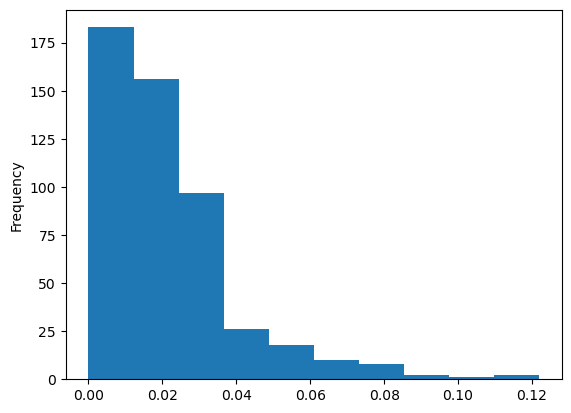

In [126]:
EarVariability_.plot.hist()

In [1345]:
oszlopok = EarVariability.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,0.281033,0.289450,0.290455,0.291442,0.292431,0.293424,0.294415,0.295407,0.296401,0.297395,...,0.601203,0.600355,0.599513,0.598688,0.597860,0.597045,0.596246,0.598233,0.598029,0.649031
AMT,-0.572455,-0.571282,-0.570354,-0.569454,-0.568564,-0.567679,-0.566805,-0.565939,-0.565080,-0.564228,...,-0.791314,-0.791260,-0.791202,-0.791118,-0.791049,-0.790973,-0.790864,-0.790826,-0.790545,-0.880029
CMA,-0.724948,-0.724642,-0.724554,-0.724481,-0.724406,-0.724325,-0.724244,-0.724160,-0.724073,-0.723984,...,-1.036018,-1.035773,-1.035525,-1.035248,-1.034989,-1.034724,-1.034421,-1.034691,-1.034291,-1.055916
MSFT,-0.093327,-0.093225,-0.094211,-0.095220,-0.096231,-0.097242,-0.098259,-0.099280,-0.100304,-0.101331,...,-0.118988,-0.118736,-0.118485,-0.118219,-0.117969,-0.117714,-0.117440,-0.115855,-0.115215,-0.178825
ZION,-0.749325,-0.749007,-0.748899,-0.748808,-0.748715,-0.748617,-0.748519,-0.748418,-0.748315,-0.748209,...,-1.083357,-1.083152,-1.082943,-1.082706,-1.082486,-1.082260,-1.081996,-1.082403,-1.082055,-1.107994


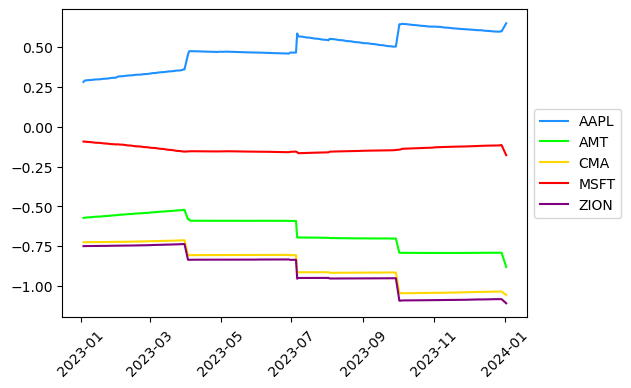

In [1346]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Volatility

###  $$ \text{CAPM: } E(r_i) = r_f + \beta_i (E(r_M) - r_f)$$

In [514]:
px_last_2016=px_last
div_2016=dividend
sp500=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="sp500 index", index_col=0)
rf_2016=rfree

In [515]:
r_excess=hozam

In [516]:
rf2=rf.iloc[1:]
rf2

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-06,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-07,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-08,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058
2016-01-11,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,...,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107
2023-12-27,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,...,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104
2023-12-28,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,...,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105


In [517]:
#rM-rf
osztas=(sp500/sp500.shift(1))-1
rm = osztas
#.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
rM=rm.drop(rm.index[0])
market=rM-rf2
market

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,...,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951,0.001951
2016-01-06,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,...,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175,-0.013175
2016-01-07,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,...,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759,-0.023759
2016-01-08,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,...,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896,-0.010896
2016-01-11,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,...,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,...,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125,0.004125
2023-12-27,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,...,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326,0.001326
2023-12-28,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,...,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265


In [518]:
#CAPM beta es rezidualisok volatilitasanak kiszamolasa
#ez egy kicsit tobb ideig fut, kb 6-7 perc
start_index = r_excess.index.get_loc('2023-01-03')
end_index = len(rM)

beta = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)
resid_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for date in r_excess.index[start_index:]:
    for stock in r_excess.columns:
        
        start_date_index = r_excess.index.get_loc(date) - 1260
        end_date_index = r_excess.index.get_loc(date)  
        
        X = sm.add_constant(market[stock].loc[market.index[start_date_index:end_date_index]])
        
        y = r_excess[stock].loc[r_excess.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        beta.at[date, stock] = results.params[1]
        resid_vol.at[date, stock] = np.std(results.resid)

In [519]:
beta

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.997245,1.380917,1.22905,0.677933,0.508219,0.861576,0.99972,1.09471,1.275813,1.249479,...,1.447762,0.600355,0.908409,0.846512,1.081532,0.787588,0.916585,1.291537,1.066235,0.943702
2023-01-04,0.997075,1.380765,1.229512,0.677446,0.508376,0.861406,0.999839,1.094449,1.275809,1.249623,...,1.447141,0.600279,0.908829,0.845776,1.081482,0.787404,0.916418,1.291213,1.066163,0.943546
2023-01-05,0.997139,1.382146,1.229168,0.676896,0.50974,0.860732,1.000942,1.094242,1.275806,1.249857,...,1.449801,0.600524,0.908106,0.846107,1.081468,0.787731,0.915741,1.291629,1.067286,0.9441
2023-01-06,0.99596,1.380315,1.229232,0.676313,0.510076,0.860525,1.000388,1.094869,1.276729,1.250929,...,1.449187,0.601483,0.906115,0.84682,1.082149,0.787822,0.916106,1.291183,1.067745,0.944802
2023-01-09,0.991231,1.378685,1.230002,0.676707,0.5099,0.860024,0.999645,1.094614,1.275099,1.251742,...,1.448403,0.6031,0.905318,0.84607,1.083113,0.787907,0.913946,1.292968,1.069089,0.944126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.974835,1.389421,1.218567,0.589966,0.652662,0.821131,1.013529,1.088767,1.270352,1.260302,...,1.458968,0.650567,0.888786,0.87959,1.082792,0.777704,0.890666,1.320908,1.171433,0.937509
2023-12-27,0.973937,1.388622,1.217086,0.590483,0.653645,0.821159,1.014026,1.086639,1.26848,1.262261,...,1.457635,0.650965,0.889743,0.881817,1.084304,0.78024,0.890259,1.320785,1.17232,0.938411
2023-12-28,0.97592,1.389072,1.21785,0.591288,0.655761,0.82078,1.013745,1.087055,1.270481,1.263587,...,1.460628,0.647588,0.887977,0.884109,1.083945,0.781271,0.890569,1.322346,1.174442,0.937915


In [520]:
resid_vol

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.012458,0.033954,0.012628,0.015528,0.022147,0.01204,0.015118,0.00982,0.015732,0.013937,...,0.029884,0.012857,0.017402,0.018612,0.013271,0.01257,0.015552,0.018896,0.019553,0.011991
2023-01-04,0.012459,0.033954,0.012658,0.015533,0.022148,0.012041,0.015118,0.009831,0.015732,0.013938,...,0.029909,0.012858,0.017413,0.018638,0.013273,0.012568,0.015552,0.018904,0.019553,0.011993
2023-01-05,0.01246,0.033991,0.012655,0.015524,0.022178,0.012018,0.015084,0.009836,0.015732,0.013941,...,0.029929,0.012858,0.017407,0.018649,0.013274,0.012569,0.015539,0.018901,0.019568,0.011991
2023-01-06,0.012455,0.034012,0.012653,0.015522,0.022178,0.012019,0.015088,0.009841,0.015743,0.013956,...,0.02993,0.01286,0.017427,0.01865,0.01328,0.012568,0.015541,0.018899,0.019567,0.011996
2023-01-09,0.012537,0.034015,0.012655,0.01552,0.022178,0.012019,0.01509,0.009839,0.015749,0.013956,...,0.029931,0.012864,0.017428,0.018651,0.013284,0.012567,0.015555,0.018904,0.019572,0.011998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.013081,0.033751,0.012095,0.014178,0.024559,0.012562,0.015912,0.010187,0.015791,0.014012,...,0.02847,0.012798,0.018134,0.018258,0.013258,0.012519,0.015756,0.019064,0.024903,0.012649
2023-12-27,0.013079,0.033754,0.01209,0.014178,0.024561,0.012562,0.015912,0.010171,0.015783,0.014001,...,0.028467,0.012797,0.018132,0.018247,0.013251,0.012494,0.015756,0.01907,0.024906,0.012646
2023-12-28,0.013071,0.033755,0.012089,0.014177,0.02456,0.012562,0.015912,0.010171,0.015777,0.013997,...,0.028459,0.012778,0.018128,0.018239,0.013252,0.012492,0.015756,0.019066,0.024903,0.012646


In [521]:
res_vol=resid_vol
beta_=beta

In [522]:
start_index = r_excess.index.get_loc('2023-01-03')
return_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for column in r_excess.columns:
    std_devs = []
    for i in range(start_index, len(r_excess)):
        window = r_excess.loc[r_excess.index[i-252]:r_excess.index[i], column] 
        std_dev = window.std()           
        std_devs.append(std_dev)

    return_vol[column] = std_devs 

return_vol

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.022184,0.035350,0.022507,0.014013,0.037985,0.016687,0.017497,0.020816,0.028274,0.023105,...,0.036648,0.014442,0.022028,0.022873,0.022060,0.015112,0.019127,0.029140,0.023870,0.020124
2023-01-04,0.022190,0.035602,0.022518,0.014016,0.038092,0.016716,0.017498,0.020816,0.028288,0.023141,...,0.036839,0.014451,0.021998,0.022979,0.022052,0.015130,0.019134,0.029152,0.023980,0.020149
2023-01-05,0.022155,0.035541,0.022465,0.014017,0.038018,0.016701,0.017498,0.020837,0.028380,0.023256,...,0.036787,0.014507,0.021917,0.022969,0.022067,0.015101,0.019144,0.029139,0.023978,0.020044
2023-01-06,0.022129,0.035540,0.022580,0.014060,0.038020,0.016664,0.017504,0.020894,0.028376,0.023363,...,0.036816,0.014619,0.021813,0.022977,0.022171,0.015151,0.019135,0.029332,0.024035,0.019939
2023-01-09,0.022102,0.035576,0.022525,0.014187,0.037903,0.016662,0.017533,0.020900,0.028092,0.023349,...,0.036741,0.014618,0.021844,0.022971,0.022156,0.015133,0.019134,0.029217,0.024036,0.019806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.016844,0.022269,0.013094,0.012488,0.026721,0.012573,0.016059,0.013729,0.020060,0.016507,...,0.019729,0.012382,0.015915,0.018745,0.014802,0.010251,0.012891,0.025940,0.040074,0.015776
2023-12-27,0.016838,0.022157,0.012996,0.012482,0.026689,0.012577,0.016050,0.013688,0.020036,0.016445,...,0.019702,0.012398,0.015867,0.018744,0.014787,0.010255,0.012891,0.025925,0.040068,0.015781
2023-12-28,0.016838,0.022145,0.012994,0.012482,0.026689,0.012581,0.016047,0.013694,0.020036,0.016446,...,0.019711,0.012376,0.015805,0.018733,0.014787,0.010256,0.012894,0.025926,0.040068,0.015779


In [523]:
px_last_2016.replace(0, np.nan, inplace=True)
start_index = px_last_2016.index.get_loc('2023-01-03')
crng = pd.DataFrame(index=px_last_2016.index[start_index:], columns=px_last_2016.columns)

for column in px_last_2016.columns:
    ratio = []
    for i in range(start_index, len(px_last_2016)):
        window = px_last_2016.loc[px_last_2016.index[i-252]:px_last_2016.index[i], column] 
        min_val = window.min()
        max_val = window.max()
        rat = max_val / min_val
        ratio.append(rat)

    crng[column] = ratio

crng

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,1.416467,1.704890,1.455265,1.325655,2.262577,1.480539,1.526758,1.657736,2.060538,1.315659,...,1.850442,1.336037,1.865991,2.187477,1.644768,1.319335,1.316773,2.623413,1.624617,1.860836
2023-01-04,1.398811,1.704890,1.455265,1.325655,2.262577,1.462655,1.526758,1.628384,2.050763,1.315659,...,1.850442,1.336037,1.796978,2.187477,1.620217,1.304133,1.316773,2.589915,1.624617,1.784581
2023-01-05,1.398811,1.704890,1.437370,1.325655,2.262577,1.428256,1.526758,1.616747,2.013081,1.315659,...,1.850442,1.336037,1.731837,2.187477,1.620217,1.304133,1.316773,2.589915,1.624617,1.716639
2023-01-06,1.398811,1.704890,1.431451,1.325655,2.262577,1.427519,1.533477,1.588275,1.947602,1.315659,...,1.850442,1.336037,1.710562,2.187477,1.598135,1.300903,1.316773,2.460243,1.624617,1.657923
2023-01-09,1.398811,1.704890,1.431451,1.325655,2.262577,1.427519,1.533477,1.511577,1.947602,1.315659,...,1.850442,1.336037,1.671253,2.187477,1.595940,1.300903,1.316773,2.446932,1.624617,1.657923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156
2023-12-27,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156
2023-12-28,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156


In [524]:
crng=crng.fillna(0)

In [862]:
Volatility=0.3*return_vol+0.14*beta_+0.29*res_vol+0.26*crng
Volatility

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.518164,0.657051,0.56085,0.448288,0.677239,0.514059,0.546551,0.593363,0.727398,0.527972,...,0.703463,0.43948,0.62399,0.699515,0.589521,0.461469,0.480931,0.877124,0.584505,0.62545
2023-01-04,0.513551,0.657106,0.560927,0.448222,0.677293,0.509394,0.546568,0.585699,0.72486,0.528003,...,0.70344,0.439473,0.6061,0.699451,0.583129,0.457495,0.48091,0.868376,0.584528,0.60561
2023-01-05,0.51355,0.657292,0.556209,0.448143,0.677471,0.500345,0.546713,0.582652,0.71509,0.528071,...,0.703803,0.439524,0.589035,0.699498,0.583131,0.457532,0.480814,0.868429,0.584689,0.587991
2023-01-06,0.513376,0.657041,0.554713,0.448074,0.677518,0.500113,0.548385,0.575355,0.698197,0.528257,...,0.703726,0.439692,0.5832,0.6996,0.577518,0.45672,0.480863,0.834709,0.58477,0.572793
2023-01-09,0.51273,0.656824,0.554805,0.448166,0.677459,0.500043,0.54829,0.555379,0.697885,0.528367,...,0.703594,0.43992,0.572878,0.699494,0.577079,0.456726,0.480565,0.831465,0.58496,0.572659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.554097,0.658606,0.590038,0.417244,0.589792,0.4528,0.533305,0.533864,0.702428,0.520516,...,0.594455,0.442369,0.453199,0.538516,0.506296,0.435189,0.501666,0.650897,0.898016,0.501353
2023-12-27,0.553969,0.658462,0.5898,0.417314,0.58992,0.452805,0.533372,0.533549,0.702156,0.520768,...,0.594259,0.442429,0.453318,0.538824,0.506501,0.435538,0.501609,0.650877,0.89814,0.501479
2023-12-28,0.554244,0.658522,0.589906,0.417426,0.590216,0.452753,0.533331,0.533609,0.702435,0.520953,...,0.594679,0.441944,0.453051,0.539139,0.506451,0.435682,0.501653,0.651094,0.898436,0.50141


In [863]:
normalvol1=pd.DataFrame(index= Volatility.index, columns=Value.columns)
for index, row in Volatility.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / np.sqrt(row_std)
    normalvol1.loc[index] = normalized_row
normalvol1

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.169276,0.198354,-0.056287,-0.354235,0.25179,-0.180143,-0.094136,0.029774,0.384559,-0.143316,...,0.321203,-0.377549,0.110842,0.310754,0.019602,-0.319347,-0.267831,0.78088,0.006326,0.114707
2023-01-04,-0.176059,0.205915,-0.050001,-0.349888,0.25963,-0.187122,-0.088208,0.015912,0.386198,-0.137607,...,0.329202,-0.37317,0.070196,0.318588,0.009074,-0.325216,-0.262912,0.768067,0.012796,0.068894
2023-01-05,-0.173402,0.212901,-0.058756,-0.349182,0.267131,-0.208891,-0.084278,0.012308,0.368234,-0.134377,...,0.337898,-0.372346,0.029463,0.326329,0.013596,-0.323949,-0.261379,0.780328,0.017781,0.026656
2023-01-06,-0.169522,0.221238,-0.057088,-0.347141,0.276935,-0.205596,-0.074299,-0.000942,0.333179,-0.129046,...,0.348217,-0.369937,0.020394,0.336997,0.004941,-0.323623,-0.257955,0.704484,0.024665,-0.007912
2023-01-09,-0.169879,0.223404,-0.055042,-0.346094,0.279721,-0.204506,-0.072822,-0.053474,0.335472,-0.127199,...,0.351052,-0.368601,-0.005715,0.339863,0.005752,-0.322732,-0.257668,0.700056,0.02726,-0.006312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.021178,0.33251,0.128245,-0.386507,0.127511,-0.280585,-0.040763,-0.039098,0.463054,-0.078861,...,0.141404,-0.31166,-0.279397,-0.025238,-0.121221,-0.333049,-0.135015,0.309544,1.04571,-0.135947
2023-12-27,0.020442,0.331978,0.127269,-0.386982,0.127627,-0.281169,-0.040967,-0.040439,0.46225,-0.078544,...,0.140564,-0.312105,-0.279641,-0.024711,-0.121078,-0.332651,-0.135666,0.309364,1.046556,-0.136051
2023-12-28,0.021419,0.333263,0.128066,-0.387737,0.128993,-0.282091,-0.041121,-0.040292,0.464586,-0.078139,...,0.142339,-0.314417,-0.281202,-0.023752,-0.121507,-0.333144,-0.135857,0.311052,1.05073,-0.136583


In [864]:
Volatility=normalvol1
Volatility=Volatility.astype(float)
Volatility.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [797]:
#NaN ellenorzes
x=0
for column in Volatility.columns:
    has_nan = Volatility[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [798]:
#inf ellenorzese
szumma=0
for column in Volatility.columns:
    has_inf = np.isinf(Volatility[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [799]:
oszlopok = Volatility.iloc[:, [2, 31, 98, 323, 501]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)
transposed_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
AAPL,-0.056287,-0.050001,-0.058756,-0.057088,-0.055042,-0.052576,-0.051870,-0.051199,-0.050224,-0.046467,...,0.131427,0.129591,0.130215,0.129484,0.128792,0.128245,0.127269,0.128066,0.127129,0.131121
AMT,-0.120333,-0.137728,-0.148051,-0.147682,-0.146019,-0.143774,-0.143024,-0.142090,-0.141347,-0.137826,...,-0.098701,-0.099039,-0.099637,-0.100323,-0.099824,-0.100500,-0.101108,-0.101571,-0.100407,-0.098099
CMA,0.059855,0.066540,0.071774,0.079029,0.081071,0.083841,0.084677,0.085084,0.086553,0.090752,...,0.906289,0.904649,0.906170,0.905355,0.905505,0.907722,0.908718,0.912619,0.914858,0.923807
MSFT,0.014974,0.016476,0.001901,-0.026733,-0.025527,-0.022978,-0.022189,-0.021305,-0.020181,-0.025894,...,0.225367,0.223698,0.223465,0.222566,0.222814,0.222712,0.222080,0.222329,0.221545,0.225873
ZION,0.006326,0.012796,0.017781,0.024665,0.027260,0.029978,0.030667,0.031059,0.032318,0.036282,...,1.045789,1.043348,1.044067,1.043171,1.043221,1.045710,1.046556,1.050730,1.052326,1.062172


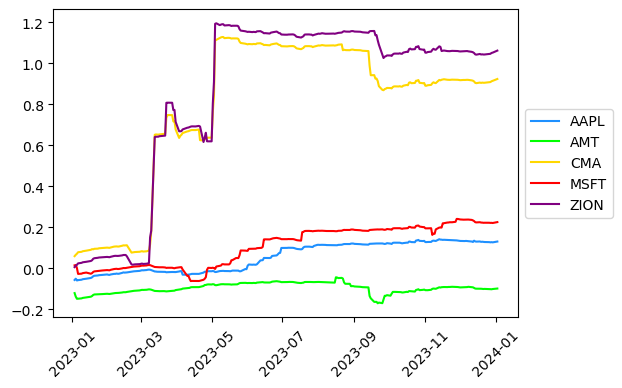

In [800]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'lime',  'gold', 'red', 'purple']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(0.35, 0.8)
plt.xticks(rotation=45) 
plt.show()

## Volatilitás regressziója

In [865]:
#ez kb 12-15 percig fut
start_index = Volatility.index.get_loc('2023-01-03')
end_index = len(Volatility)
error = pd.DataFrame(index=Volatility.index[start_index:], columns=Volatility.columns)

for date in Volatility.index[start_index:]:
    for stock in Volatility.columns:
        start_date_index = Volatility.index.get_loc(date)
        end_date_index = Volatility.index.get_loc(date)+1
        
        X = sm.add_constant(pd.concat([momentum[stock].loc[momentum.index[start_date_index:end_date_index]],
                                       DivYield[stock].loc[DivYield.index[start_date_index:end_date_index]],
                                       Value[stock].loc[Value.index[start_date_index:end_date_index]],
                                       Size[stock].loc[Size.index[start_date_index:end_date_index]],
                                       trad_act[stock].loc[trad_act.index[start_date_index:end_date_index]],
                                       Growth[stock].loc[Growth.index[start_date_index:end_date_index]],
                                       Leverage[stock].loc[Leverage.index[start_date_index:end_date_index]],
                                       Profitability[stock].loc[Profitability.index[start_date_index:end_date_index]],
                                       EarVariability[stock].loc[EarVariability.index[start_date_index:end_date_index]]], axis=1))
        
        y = Volatility[stock].loc[Volatility.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        error.at[date, stock] = results.resid.values
error


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-5.551115123125783e-17,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,0.0,0.0,2.7755575615628914e-17,-1.0408340855860843e-17,0.0,-2.7755575615628914e-17,...,1.1102230246251565e-16,-5.551115123125783e-17,0.0,-5.551115123125783e-17,-3.469446951953614e-18,0.0,-1.1102230246251565e-16,-1.1102230246251565e-16,1.734723475976807e-18,1.3877787807814457e-17
2023-01-04,-8.326672684688674e-17,-2.7755575615628914e-17,6.938893903907228e-18,0.0,0.0,2.7755575615628914e-17,0.0,3.469446951953614e-18,-1.1102230246251565e-16,-2.7755575615628914e-17,...,-5.551115123125783e-17,5.551115123125783e-17,0.0,-5.551115123125783e-17,5.204170427930421e-18,1.1102230246251565e-16,-1.1102230246251565e-16,-2.220446049250313e-16,-1.734723475976807e-18,0.0
2023-01-05,2.7755575615628914e-17,-1.3877787807814457e-16,1.3877787807814457e-17,-5.551115123125783e-17,0.0,-2.7755575615628914e-17,0.0,-1.734723475976807e-18,0.0,2.7755575615628914e-17,...,-1.1102230246251565e-16,5.551115123125783e-17,1.0408340855860843e-17,-1.1102230246251565e-16,-3.469446951953614e-18,5.551115123125783e-17,-5.551115123125783e-17,0.0,3.469446951953614e-18,1.0408340855860843e-17
2023-01-06,0.0,5.551115123125783e-17,2.0816681711721685e-17,2.220446049250313e-16,5.551115123125783e-17,5.551115123125783e-17,0.0,2.168404344971009e-19,0.0,2.7755575615628914e-17,...,-5.551115123125783e-17,5.551115123125783e-17,0.0,-1.1102230246251565e-16,0.0,0.0,5.551115123125783e-17,1.1102230246251565e-16,3.469446951953614e-18,0.0
2023-01-09,0.0,-5.551115123125783e-17,6.938893903907228e-18,-5.551115123125783e-17,0.0,5.551115123125783e-17,0.0,0.0,-1.1102230246251565e-16,5.551115123125783e-17,...,0.0,5.551115123125783e-17,0.0,-5.551115123125783e-17,-1.734723475976807e-18,-5.551115123125783e-17,-1.1102230246251565e-16,-1.1102230246251565e-16,1.3877787807814457e-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,-5.551115123125783e-17,0.0,-1.1102230246251565e-16,0.0,0.0,-6.938893903907228e-18,6.938893903907228e-18,1.6653345369377348e-16,2.7755575615628914e-17,...,-2.7755575615628914e-17,-5.551115123125783e-17,5.551115123125783e-17,-3.469446951953614e-18,-4.163336342344337e-17,5.551115123125783e-17,0.0,5.551115123125783e-17,2.220446049250313e-16,-2.7755575615628914e-17
2023-12-27,0.0,5.551115123125783e-17,0.0,0.0,-2.7755575615628914e-17,-5.551115123125783e-17,-6.938893903907228e-18,6.938893903907228e-18,1.6653345369377348e-16,2.7755575615628914e-17,...,-2.7755575615628914e-17,1.1102230246251565e-16,0.0,0.0,4.163336342344337e-17,5.551115123125783e-17,5.551115123125783e-17,0.0,0.0,5.551115123125783e-17
2023-12-28,-3.469446951953614e-18,0.0,0.0,-5.551115123125783e-17,0.0,0.0,0.0,0.0,-1.1102230246251565e-16,1.3877787807814457e-17,...,-2.7755575615628914e-17,0.0,0.0,-6.938893903907228e-18,2.7755575615628914e-17,-1.6653345369377348e-16,-2.7755575615628914e-17,-5.551115123125783e-17,0.0,-2.7755575615628914e-17


In [720]:
#regresszio konstans nélkül
start_index = Volatility.index.get_loc('2023-01-03')
end_index = len(Volatility)
errorknelkul = pd.DataFrame(index=Volatility.index[start_index:], columns=Volatility.columns)

for date in Volatility.index[start_index:]:
    for stock in Volatility.columns:
        start_date_index = Volatility.index.get_loc(date)
        end_date_index = Volatility.index.get_loc(date)+1
        
        X = pd.concat([momentum[stock].loc[momentum.index[start_date_index:end_date_index]],
                                       DivYield[stock].loc[DivYield.index[start_date_index:end_date_index]],
                                       Value[stock].loc[Value.index[start_date_index:end_date_index]],
                                       Size[stock].loc[Size.index[start_date_index:end_date_index]],
                                       trad_act[stock].loc[trad_act.index[start_date_index:end_date_index]],
                                       Growth[stock].loc[Growth.index[start_date_index:end_date_index]],
                                       Leverage[stock].loc[Leverage.index[start_date_index:end_date_index]],
                                       Profitability[stock].loc[Profitability.index[start_date_index:end_date_index]],
                                       EarVariability[stock].loc[EarVariability.index[start_date_index:end_date_index]]], axis=1)
        
        y = Volatility[stock].loc[Volatility.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        errorknelkul.at[date, stock] = results.resid.values

errorknelkul


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,-2.220446049250313e-16,1.1102230246251565e-16,0.0,0.0,2.220446049250313e-16,1.1102230246251565e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,0.0,...,0.0,-1.1102230246251565e-16,2.220446049250313e-16,-2.220446049250313e-16,-2.220446049250313e-16,-5.551115123125783e-17,-1.1102230246251565e-16,0.0,1.1102230246251565e-16,1.1102230246251565e-16
2023-01-04,-1.1102230246251565e-16,-1.1102230246251565e-16,2.220446049250313e-16,-1.1102230246251565e-16,-2.220446049250313e-16,0.0,1.1102230246251565e-16,-2.220446049250313e-16,1.1102230246251565e-16,0.0,...,0.0,-5.551115123125783e-17,0.0,1.1102230246251565e-16,0.0,-1.6653345369377348e-16,5.551115123125783e-17,5.551115123125783e-16,0.0,0.0
2023-01-05,-1.1102230246251565e-16,-2.220446049250313e-16,0.0,0.0,0.0,-1.1102230246251565e-16,0.0,0.0,-2.220446049250313e-16,1.1102230246251565e-16,...,-2.220446049250313e-16,-5.551115123125783e-17,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,1.6653345369377348e-16,-1.1102230246251565e-16,0.0,1.1102230246251565e-16,1.1102230246251565e-16
2023-01-06,-1.1102230246251565e-16,-1.1102230246251565e-16,0.0,-5.551115123125783e-17,2.220446049250313e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,1.1102230246251565e-16,1.1102230246251565e-16,-3.3306690738754696e-16,...,-2.220446049250313e-16,-1.6653345369377348e-16,1.1102230246251565e-16,-2.220446049250313e-16,3.3306690738754696e-16,2.220446049250313e-16,-1.1102230246251565e-16,2.220446049250313e-16,3.3306690738754696e-16,0.0
2023-01-09,1.1102230246251565e-16,1.1102230246251565e-16,-1.1102230246251565e-16,-1.6653345369377348e-16,-1.1102230246251565e-16,2.220446049250313e-16,-2.220446049250313e-16,0.0,-2.220446049250313e-16,1.1102230246251565e-16,...,1.1102230246251565e-16,5.551115123125783e-17,-1.1102230246251565e-16,0.0,-2.220446049250313e-16,-2.220446049250313e-16,-5.551115123125783e-17,0.0,-2.220446049250313e-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.1102230246251565e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,5.551115123125783e-17,0.0,1.1102230246251565e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,0.0,-1.1102230246251565e-16,...,-3.3306690738754696e-16,-2.220446049250313e-16,-5.551115123125783e-17,-3.3306690738754696e-16,-2.220446049250313e-16,5.551115123125783e-17,0.0,-3.3306690738754696e-16,-4.440892098500626e-16,1.1102230246251565e-16
2023-12-27,0.0,0.0,0.0,0.0,2.220446049250313e-16,5.551115123125783e-17,2.220446049250313e-16,0.0,1.1102230246251565e-16,0.0,...,2.220446049250313e-16,5.551115123125783e-17,5.551115123125783e-17,-1.1102230246251565e-16,0.0,5.551115123125783e-17,0.0,1.1102230246251565e-16,1.1102230246251565e-16,-1.1102230246251565e-16
2023-12-28,1.1102230246251565e-16,2.220446049250313e-16,-1.1102230246251565e-16,-5.551115123125783e-17,1.1102230246251565e-16,1.6653345369377348e-16,0.0,0.0,1.1102230246251565e-16,-2.220446049250313e-16,...,1.1102230246251565e-16,1.1102230246251565e-16,0.0,1.1102230246251565e-16,-1.1102230246251565e-16,1.6653345369377348e-16,-1.1102230246251565e-16,-2.220446049250313e-16,-2.220446049250313e-16,0.0


In [866]:
normalvol=pd.DataFrame(index= error.index, columns=error.columns)
for index, row in error.iterrows():
    row_mean_ = np.mean(row)
    row_std_ = np.std(row) 
    normalized_row_ = (row - row_mean_) / row_std_
    normalvol.loc[index] = normalized_row_
normalvol

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.611113,1.259709,0.012495,-1.23472,0.012495,0.012495,0.324298,-0.104432,0.012495,-0.299309,...,1.259709,-0.611113,0.012495,-0.611113,-0.026481,0.012495,-1.23472,-1.23472,0.031982,0.168396
2023-01-04,-1.022366,-0.326813,0.107908,0.020964,0.020964,0.36874,0.020964,0.064436,-1.370142,-0.326813,...,-0.674589,0.716516,0.020964,-0.674589,0.086172,1.412069,-1.370142,-2.761248,-0.000772,0.020964
2023-01-05,0.313876,-1.630377,0.151855,-0.65825,-0.010166,-0.334208,-0.010166,-0.030419,-0.010166,0.313876,...,-1.306334,0.637918,0.11135,-1.306334,-0.050671,0.637918,-0.65825,-0.010166,0.030339,0.11135
2023-01-06,-0.004014,0.718962,0.267102,2.88789,0.718962,0.718962,-0.004014,-0.00119,-0.004014,0.357474,...,-0.726991,0.718962,-0.004014,-1.449967,-0.004014,-0.004014,0.718962,1.441938,0.041172,-0.004014
2023-01-09,0.022179,-0.653705,0.106665,-0.653705,0.022179,0.698064,0.022179,0.022179,-1.32959,0.698064,...,0.022179,0.698064,0.022179,-0.653705,0.001058,-0.653705,-1.32959,-1.32959,0.19115,0.022179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.076158,-0.774937,-0.076158,-1.473716,-0.076158,-0.076158,-0.163505,0.01119,2.02018,0.273232,...,-0.425547,-0.774937,0.622622,-0.119831,-0.600242,0.622622,-0.076158,0.622622,2.718959,-0.425547
2023-12-27,-0.050154,0.828395,-0.050154,-0.050154,-0.489428,-0.928702,-0.159972,0.059665,2.585492,0.38912,...,-0.489428,1.706943,-0.050154,-0.050154,0.608758,0.828395,0.828395,-0.050154,-0.050154,0.828395
2023-12-28,-0.083559,-0.028903,-0.028903,-0.903391,-0.028903,-0.028903,-0.028903,-0.028903,-1.777878,0.189719,...,-0.466147,-0.028903,-0.028903,-0.138214,0.40834,-2.652365,-0.466147,-0.903391,-0.028903,-0.466147


In [867]:
error=normalvol

In [868]:
error=error.astype(float)
error.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [869]:
error_=error.iloc[-1]

<Axes: ylabel='Frequency'>

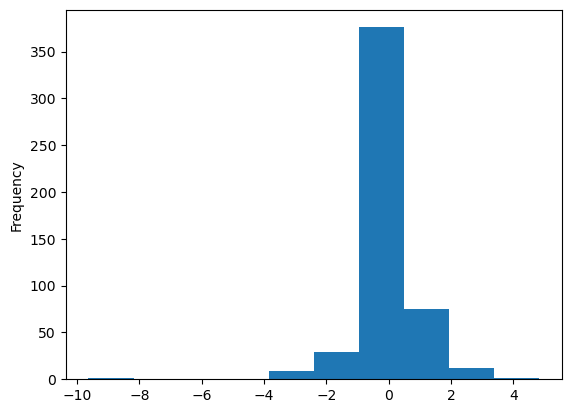

In [870]:
error_.plot.hist()

# Keresztmetszeti regresszió

In [871]:
datafr=matrix.copy()

In [872]:
ossz= pd.DataFrame(index=Market_cap.index, columns=['Osszeg'])
osszeg = Market_cap.sum(axis=1)
ossz['Osszeg'] = osszeg
#ossz['Osszeg']= np.sqrt(osszeg)
ossz

,Osszeg
Dates,
2023-01-03,3.517933e+07
2023-01-04,3.543510e+07
2023-01-05,3.502076e+07
2023-01-06,3.580920e+07
2023-01-09,3.579316e+07
...,...
2023-12-26,4.451596e+07
2023-12-27,4.455673e+07
2023-12-28,4.457003e+07


In [1090]:
#gyok=np.sqrt(Market_cap)
#gyok

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,210.766812,90.993062,1410.541853,535.878592,233.533344,437.105038,151.994307,412.843076,395.770272,287.637142,...,98.492520,195.820587,662.298598,83.818074,141.284595,189.111320,163.431981,115.905450,85.149729,261.615505
2023-01-04,211.908580,93.979536,1417.797514,538.035849,238.729352,440.344002,152.371027,412.139791,398.398681,290.684175,...,101.489928,196.657192,663.261715,85.204011,141.176128,190.388011,164.187814,116.525193,86.690829,263.488300
2023-01-05,212.215735,95.352574,1410.259874,537.707056,237.366600,439.531540,152.577221,407.244736,390.757925,285.183220,...,101.735261,194.657355,670.640608,84.329321,139.157478,189.661647,162.659736,115.874265,85.928087,260.365458
2023-01-06,209.095572,95.997889,1435.970144,542.715790,238.460119,442.555807,153.736419,412.040317,393.313456,290.342322,...,102.969669,197.517962,674.681385,84.761455,141.609498,191.575343,162.414426,118.813381,87.575145,262.318260
2023-01-09,208.953927,97.442557,1438.902901,534.689217,239.427943,442.201084,152.249606,415.500148,398.731115,291.724788,...,103.386996,198.471526,668.364637,84.201800,141.940005,191.185296,162.640382,120.081998,87.369891,261.802497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,202.397884,96.028419,1732.760449,522.481958,299.918868,435.464894,165.625683,485.605373,521.907825,314.152129,...,101.380893,185.339057,639.676829,86.772797,165.503043,191.083617,159.293559,118.951969,81.540898,299.594270
2023-12-27,202.405122,95.619205,1733.209176,522.921061,297.563803,436.579737,165.659477,485.873225,520.956067,314.531025,...,101.174578,184.279072,638.172000,86.882597,166.055643,191.508557,159.103216,119.014559,81.204082,300.665072
2023-12-28,202.368929,95.585024,1735.137381,522.701555,298.053710,437.790889,166.244133,484.339663,520.711298,315.232356,...,101.803361,184.802359,633.541227,86.833814,166.012083,191.274224,159.431251,118.919582,81.340798,300.863516


In [403]:
#gyok=gyok.T

In [873]:
uj_oszlop_nevek = [f"oszlop_{i}" for i in range(1, 503)]
for oszlop_nev in uj_oszlop_nevek:
    ossz[oszlop_nev] = ossz['Osszeg']

ossz.columns=Market_cap.columns
ossz

C:\Users\demet\AppData\Local\Temp\ipykernel_7524\3271772422.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ossz[oszlop_nev] = ossz['Osszeg']
C:\Users\demet\AppData\Local\Temp\ipykernel_7524\3271772422.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ossz[oszlop_nev] = ossz['Osszeg']
C:\Users\demet\AppData\Local\Temp\ipykernel_7524\3271772422.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,...,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07,3.517933e+07
2023-01-04,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,...,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07,3.543510e+07
2023-01-05,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,...,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07,3.502076e+07
2023-01-06,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,...,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07,3.580920e+07
2023-01-09,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,...,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07,3.579316e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,...,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07,4.451596e+07
2023-12-27,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,...,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07,4.455673e+07
2023-12-28,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,...,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07,4.457003e+07


In [874]:
suly=Market_cap/ossz
gyok=np.sqrt(suly)
gyok=gyok.T
gyok

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
A,0.035535,0.035599,0.035860,0.034942,0.034926,0.035710,0.035802,0.035559,0.035531,0.035395,...,0.030169,0.030326,0.030404,0.030329,0.030370,0.030335,0.030322,0.030313,0.030276,0.030332
AAL,0.015341,0.015788,0.016113,0.016042,0.016287,0.016551,0.016519,0.017277,0.017337,0.017386,...,0.014520,0.014508,0.014443,0.014557,0.014523,0.014393,0.014325,0.014318,0.014215,0.014099
AAPL,0.237817,0.238176,0.238307,0.239965,0.240509,0.240218,0.241093,0.240116,0.240809,0.242116,...,0.262719,0.262643,0.263029,0.261559,0.260596,0.259705,0.259654,0.259904,0.259576,0.255613
ABBV,0.090349,0.090385,0.090862,0.090693,0.089372,0.088507,0.087224,0.085711,0.085914,0.085788,...,0.078336,0.078150,0.078197,0.078020,0.078547,0.078309,0.078339,0.078295,0.078465,0.079909
ABNB,0.039374,0.040104,0.040110,0.039849,0.040020,0.039726,0.040750,0.041552,0.041857,0.042088,...,0.046549,0.046319,0.045701,0.045627,0.045378,0.044952,0.044578,0.044645,0.044570,0.044423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.031884,0.031983,0.032049,0.032014,0.031956,0.031802,0.031622,0.031477,0.031571,0.031618,...,0.028784,0.028674,0.028738,0.028692,0.028668,0.028640,0.028690,0.028651,0.028708,0.028609
ZBH,0.027555,0.027582,0.027486,0.027141,0.027185,0.027033,0.026723,0.026562,0.026524,0.026512,...,0.023716,0.023762,0.023929,0.023769,0.023838,0.023875,0.023835,0.023881,0.023923,0.023960
ZBRA,0.019542,0.019575,0.019581,0.019855,0.020071,0.020274,0.020583,0.020318,0.020299,0.020316,...,0.017615,0.017653,0.017515,0.017547,0.017666,0.017828,0.017830,0.017813,0.017773,0.017648
ZION,0.014356,0.014563,0.014520,0.014635,0.014604,0.014556,0.014499,0.014494,0.014454,0.014395,...,0.012019,0.012107,0.011996,0.012084,0.012125,0.012221,0.012165,0.012184,0.012093,0.012165


In [875]:
Mom=momentum.T
Div=DivYield.T
Val=Value.T
Siz=Size.T
TrA=trad_act.T
Gro=Growth.T
Lev=Leverage.T
Pro=Profitability.T
EaV=EarVariability.T
Vol=error.T
ri=effr_i.T

In [691]:
coeff = pd.DataFrame(index=['Konstans', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
p = pd.DataFrame(index=['Konstans', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Gro[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    y = ri[stock]
    model = sm.OLS(y, X)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns)-1      #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [907]:
#WLS
coeff = pd.DataFrame(index=['Piac', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
p = pd.DataFrame(index=['Piac', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Gro[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    y = ri[stock]
    
    weights = gyok[stock]
    model = sm.WLS(y, X, weights)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns)-1      #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [908]:
#együtthatók
coeff

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Piac,0.003,0.017,-0.007,0.022,0.001,0.007,0.012,0.005,0.000,-0.002,...,0.002,0.008,-0.015,0.010,0.003,0.006,0.001,0.000,-0.004,0.005
Momentum,-0.005,-0.008,0.005,-0.001,-0.008,-0.002,-0.005,-0.001,-0.001,-0.003,...,0.003,-0.003,-0.000,-0.001,-0.001,-0.000,0.001,-0.000,0.000,-0.006
Osztalékhozam,0.005,0.000,0.001,0.001,-0.002,-0.002,-0.002,-0.001,-0.001,-0.002,...,-0.001,-0.001,-0.001,-0.001,0.000,0.001,0.000,0.000,0.000,0.006
Érték,0.012,0.055,0.052,-0.000,-0.001,0.001,0.001,0.029,-0.038,-0.010,...,-0.008,-0.002,0.002,-0.005,-0.001,-0.002,-0.005,0.002,0.002,0.011
Méret,-0.002,-0.003,0.001,0.000,-0.001,0.000,0.001,0.002,0.001,-0.001,...,-0.000,0.001,-0.000,0.000,-0.001,0.001,0.000,-0.001,-0.001,0.002
Kereskedési aktivitás,-0.006,0.004,0.004,0.001,0.001,0.002,-0.001,0.003,0.000,0.002,...,-0.002,0.004,-0.004,0.004,-0.001,0.003,0.000,-0.001,-0.003,-0.002
Növekedés,0.002,-0.001,0.000,0.000,-0.003,0.002,-0.003,-0.002,-0.000,-0.002,...,-0.002,0.001,-0.002,-0.001,-0.000,0.002,0.000,0.000,-0.001,0.001
Tőkeáttétel,0.001,0.004,0.002,-0.001,-0.000,0.001,-0.001,0.001,0.001,-0.000,...,-0.001,0.000,-0.001,0.001,-0.000,-0.000,0.001,0.001,0.000,0.001
Jövedelmezőség,-0.001,0.001,0.001,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,-0.001,-0.000,0.001,-0.002,-0.000,-0.001,-0.001,-0.000,0.000,-0.001
Eredmény változékonysága,-0.002,-0.002,-0.001,0.001,0.002,-0.001,0.001,0.001,0.001,0.001,...,0.001,0.000,-0.001,0.001,0.001,-0.001,0.001,-0.000,0.000,0.001


In [878]:
new_df = pd.DataFrame(index=coeff.index, columns=coeff.columns)
for index, row in coeff.iterrows():
    cumulative_sum = 0
    for col in coeff.columns:
        cumulative_sum += row[col]
        new_df.loc[index, col] = cumulative_sum

new_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Piac,0.003,0.02,0.013,0.035,0.036,0.043,0.055,0.06,0.06,0.058,...,0.092,0.1,0.085,0.095,0.098,0.104,0.105,0.105,0.101,0.106
Momentum,-0.005,-0.013,-0.008,-0.009,-0.017,-0.019,-0.024,-0.025,-0.026,-0.029,...,-0.077,-0.08,-0.08,-0.081,-0.082,-0.082,-0.081,-0.081,-0.081,-0.087
Osztalékhozam,0.005,0.005,0.006,0.007,0.005,0.003,0.001,0.0,-0.001,-0.003,...,-0.076,-0.077,-0.078,-0.079,-0.079,-0.078,-0.078,-0.078,-0.078,-0.072
Érték,0.012,0.067,0.119,0.119,0.118,0.119,0.12,0.149,0.111,0.101,...,-0.829,-0.831,-0.829,-0.834,-0.835,-0.837,-0.842,-0.84,-0.838,-0.827
Méret,-0.002,-0.005,-0.004,-0.004,-0.005,-0.005,-0.004,-0.002,-0.001,-0.002,...,0.075,0.076,0.076,0.076,0.075,0.076,0.076,0.075,0.074,0.076
Kereskedési aktivitás,-0.006,-0.002,0.002,0.003,0.004,0.006,0.005,0.008,0.008,0.01,...,0.076,0.08,0.076,0.08,0.079,0.082,0.082,0.081,0.078,0.076
Növekedés,0.002,0.001,0.001,0.001,-0.002,0.0,-0.003,-0.005,-0.005,-0.007,...,0.011,0.012,0.01,0.009,0.009,0.011,0.011,0.011,0.01,0.011
Tőkeáttétel,0.001,0.005,0.007,0.006,0.006,0.007,0.006,0.007,0.008,0.008,...,-0.027,-0.027,-0.028,-0.027,-0.027,-0.027,-0.026,-0.025,-0.025,-0.024
Jövedelmezőség,-0.001,0.0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,-0.023,-0.023,-0.022,-0.024,-0.024,-0.025,-0.026,-0.026,-0.026,-0.027
Eredmény változékonysága,-0.002,-0.004,-0.005,-0.004,-0.002,-0.003,-0.002,-0.001,0.0,0.001,...,-0.007,-0.007,-0.008,-0.007,-0.006,-0.007,-0.006,-0.006,-0.006,-0.005


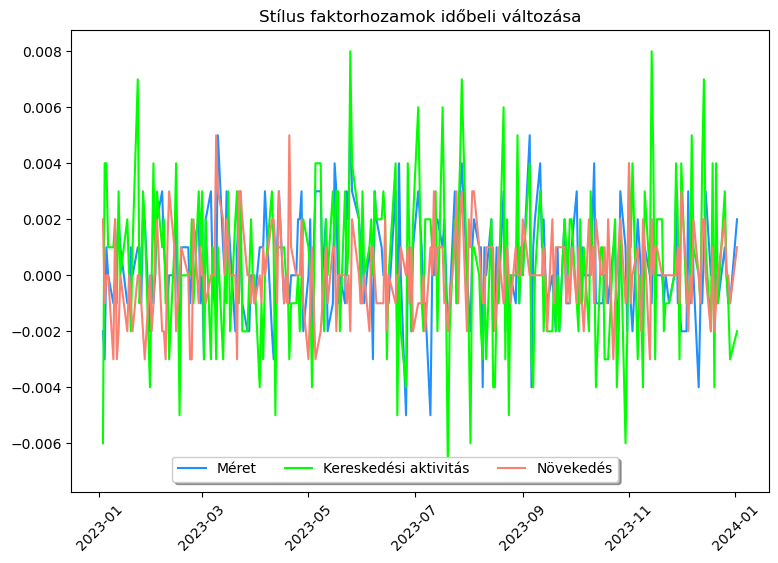

In [909]:
plt.figure(figsize=(9, 6))
colors = ['dodgerblue', 'lime',  'salmon', 'gray', 'green', 'purple', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']

for index, (name, row) in enumerate(coeff.iloc[4:7].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
plt.title('Stílus faktorhozamok időbeli változása')
plt.legend(loc='center left', bbox_to_anchor=(0.135, 0.05), fancybox=True, shadow=True, ncol=5)
#plt.ylim(-0.07, 0.07)
plt.xticks(rotation=45) 
plt.show()

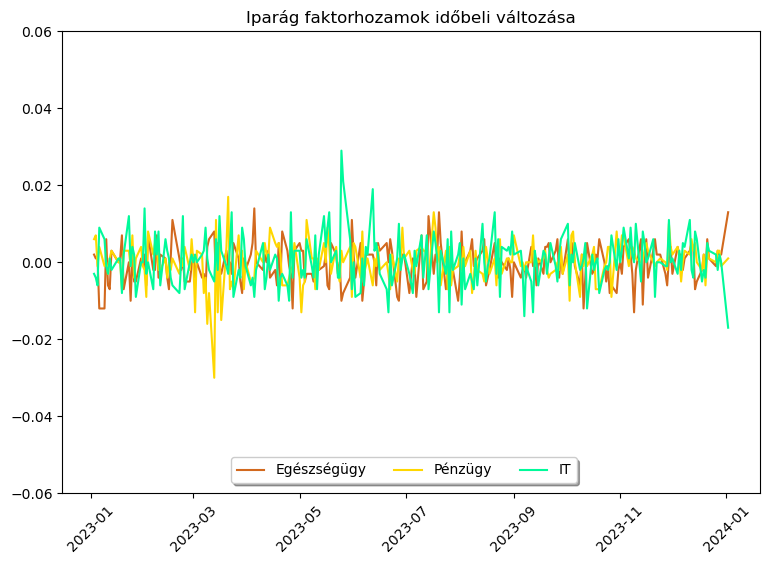

In [910]:
plt.figure(figsize=(9, 6))
colors = [ 'chocolate', 'gold', 'mediumspringgreen', 'green', 'purple',  'brown',  'cyan', 'red', 'olive', 'teal', 'gray', 
          'orange', 'silver', 'navy', 'pink', 'indigo', 'tan', 'darkgreen', 'dodgerblue', 'lime',  'salmon',]

for index, (name, row) in enumerate(coeff.iloc[16:19].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
plt.title('Iparág faktorhozamok időbeli változása')
plt.legend(loc='center left', bbox_to_anchor=(0.232, 0.05), fancybox=True, shadow=True, ncol=5)
plt.ylim(-0.06, 0.06)
plt.xticks(rotation=45) 
plt.show()

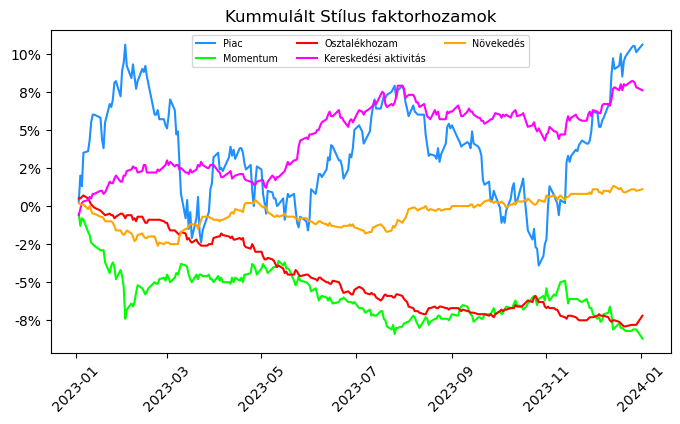

In [959]:
plt.figure(figsize=(8, 4.2))
colors = ['dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']
colors2 = [ 'magenta', 'orange', 'peru', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen','dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal']

for index, (name, row) in enumerate(new_df.iloc[0:3].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
for index, (name, row) in enumerate(new_df.iloc[5:7].iterrows()):
    plt.plot(row.index, row.values, color=colors2[index], label=f'{name}')
    
plt.title('Kummulált Stílus faktorhozamok')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, fontsize='x-small', ncol=3)
#plt.ylim(-0.8, 0.8)
plt.xticks(rotation=45) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

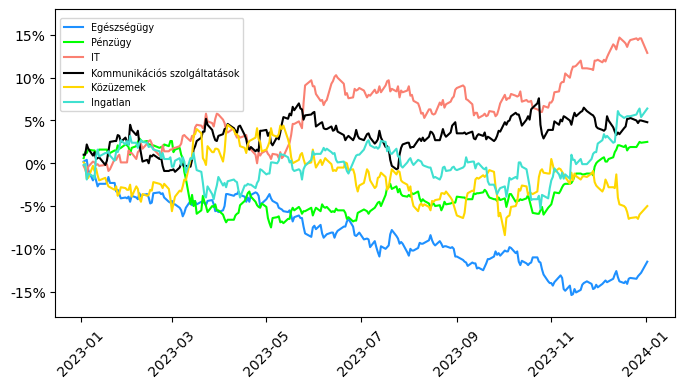

In [980]:
plt.figure(figsize=(8, 4))
colors = [ 'dodgerblue','lime',  'salmon', 'black', 'gold', 'turquoise','purple',  'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'peru', 'indigo', 'tan', 'darkgreen', 'teal']
colors2 = [ 'magenta', 'orange', 'peru', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen','dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal']

#for index, (name, row) in enumerate(new_df.iloc[0:1].iterrows()):
 #   plt.plot(row.index, row.values, color=colors2[index], label=f'{name}')
for index, (name, row) in enumerate(new_df.iloc[16:22].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
#plt.title('Kummulált Iparág faktorhozamok')
plt.legend(loc='center left', bbox_to_anchor=(0, 0.82),fancybox=True, fontsize='x-small', ncol=1)
#plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.82), fancybox=True, shadow=True, fontsize='small', ncol=1, prop={'size': 'small'})
plt.ylim(-0.18, 0.18)
plt.xticks(rotation=45) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

In [913]:
faktorvol = pd.DataFrame(index=coeff.index, columns=['Évesített Volatilitás'])

for index, row in coeff.iterrows():
    szoras = np.std(row)*np.sqrt(252)
    #szoras=szoras*100
    szoras_ = "{:.3f}".format(szoras)
    faktorvol.at[index, 'Évesített Volatilitás'] = szoras_

#faktorvol

In [914]:
faktorvol=faktorvol.astype(float)
faktorvol.dtypes

Évesített Volatilitás    float64
dtype: object

In [915]:
annualized_return= pd.DataFrame(index=coeff.index, columns=['Évesített Volatilitás'])

for index, row in coeff.iterrows():
    difference = (1+row).prod()**(252/252)-1
    annualized_return.at[index, 'Évesített Volatilitás'] = difference
#annualized_return

In [916]:
annualized_return=annualized_return.astype(float)
annualized_return.dtypes

Évesített Volatilitás    float64
dtype: object

In [939]:
#sharpe= pd.DataFrame(index=coeff.index, columns=['Sharpe-ráta'])
sharpeszamlalo=annualized_return-0.042
sharpe=(sharpeszamlalo/faktorvol).round(3)
sharpe.columns=['Sharpe-ráta']
sharpe

,Sharpe-ráta
Piac,0.499
Momentum,-2.247
Osztalékhozam,-4.532
Érték,-1.509
Méret,1.517
Kereskedési aktivitás,1.011
Növekedés,-0.989
Tőkeáttétel,-2.542
Jövedelmezőség,-5.101
Eredmény változékonysága,-2.088


In [919]:
#p-érték
p

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Piac,0.027,0.000,0.000,0.000,0.212,0.000,0.000,0.000,0.979,0.101,...,0.002,0.000,0.000,0.000,0.000,0.000,0.038,0.374,0.000,0.000
Momentum,0.000,0.000,0.000,0.433,0.000,0.004,0.000,0.055,0.207,0.000,...,0.000,0.000,0.757,0.306,0.031,0.342,0.050,0.873,0.528,0.000
Osztalékhozam,0.000,0.611,0.525,0.275,0.011,0.005,0.007,0.314,0.061,0.070,...,0.321,0.125,0.421,0.309,0.694,0.224,0.807,0.482,0.681,0.000
Érték,0.490,0.001,0.001,0.987,0.930,0.941,0.936,0.043,0.002,0.522,...,0.003,0.488,0.511,0.087,0.861,0.146,0.001,0.269,0.180,0.001
Méret,0.002,0.000,0.169,0.886,0.263,0.707,0.194,0.005,0.143,0.450,...,0.839,0.007,0.503,0.756,0.085,0.118,0.586,0.002,0.001,0.004
Kereskedési aktivitás,0.000,0.000,0.000,0.133,0.400,0.010,0.304,0.000,0.483,0.056,...,0.010,0.000,0.000,0.000,0.160,0.000,0.391,0.001,0.000,0.024
Növekedés,0.030,0.297,0.791,0.677,0.007,0.005,0.004,0.003,0.498,0.059,...,0.006,0.066,0.015,0.134,0.480,0.000,0.607,0.340,0.000,0.174
Tőkeáttétel,0.090,0.000,0.017,0.393,0.892,0.048,0.359,0.061,0.081,0.688,...,0.202,0.525,0.195,0.028,0.879,0.471,0.024,0.002,0.683,0.315
Jövedelmezőség,0.338,0.042,0.191,0.869,0.728,0.373,0.399,0.810,0.327,0.453,...,0.017,0.312,0.159,0.000,0.769,0.066,0.001,0.076,0.154,0.022
Eredmény változékonysága,0.061,0.045,0.117,0.183,0.006,0.334,0.175,0.030,0.078,0.338,...,0.411,0.488,0.441,0.285,0.144,0.185,0.001,0.285,0.174,0.142


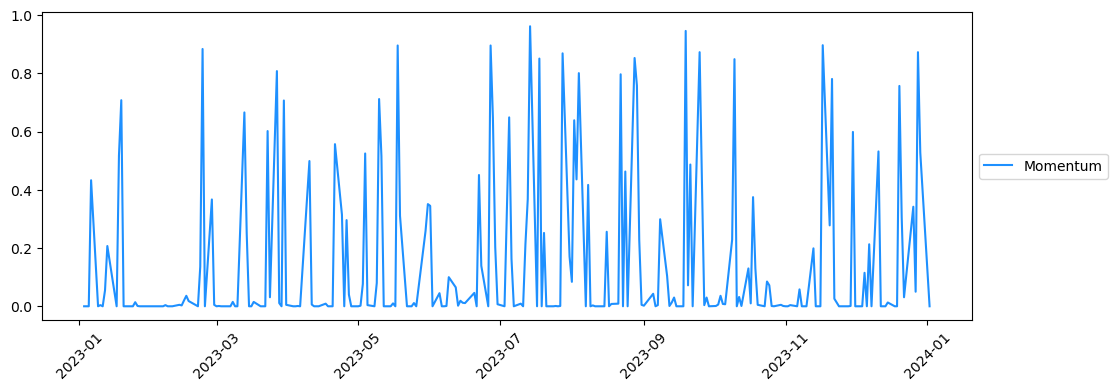

In [920]:
plt.figure(figsize=(12, 4))
colors = ['dodgerblue', 'gold', 'green', 'red', 'purple', 'turquoise', 'brown', 'pink', 'gray', 'cyan', 'lime',
          'olive', 'teal', 'magenta', 'orange',  'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']

for index, (name, row) in enumerate(p.iloc[1:2].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45) 
plt.show()

In [961]:
#az időtartam hány százalékában szignifikáns (5%-os szignifikancia szinten)
szazalek = pd.DataFrame(index=p.index[0:], columns=['%'])

for index, row in p.iterrows():
    a = 0
    for column, value in row.items():
        if value < 0.01:
            a += 1
            b=(a/251)*100
    szazalek.at[index, '%'] = b

szazalek=szazalek.astype(float)
szazalek=szazalek.round(2)
szazalek.index.name='Faktorok'
szazalek

,%
Faktorok,
Piac,80.88
Momentum,56.57
Osztalékhozam,11.16
Érték,36.25
Méret,36.65
Kereskedési aktivitás,42.23
Növekedés,15.14
Tőkeáttétel,15.54
Jövedelmezőség,5.18


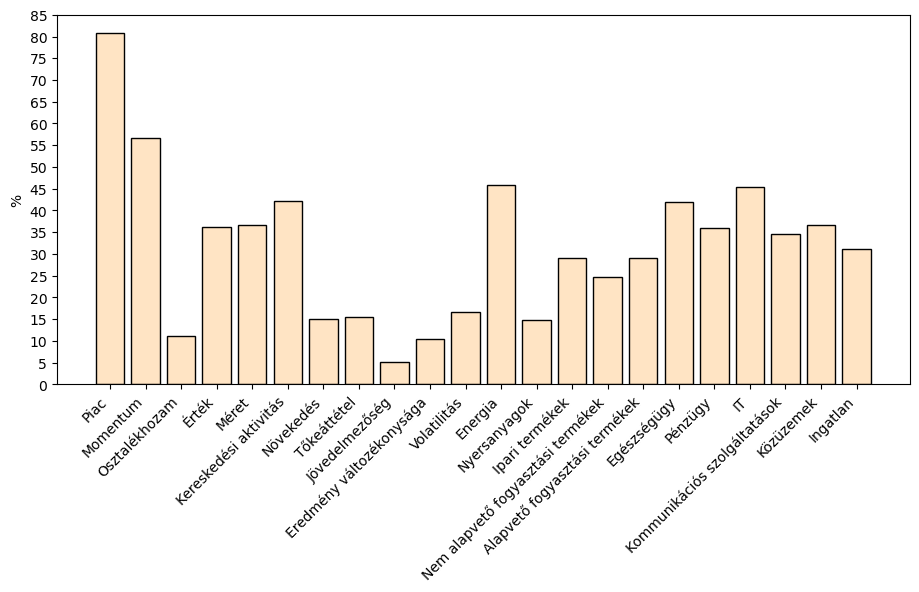

In [962]:
plt.figure(figsize=(11, 4.8))
x = range(len(szazalek.index))
plt.bar(x, szazalek['%'], color='bisque', edgecolor='Black', align='center')
#plt.title('Szignifikancia(%)')
plt.ylabel('%')
plt.xticks(x, szazalek.index, rotation=45, ha='right')
plt.yticks(range(0, 90, 5))
#plt.axhline(y=30, color='red', linestyle='--')  
plt.show()

In [923]:
#R^2
R

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
R^2,0.412,0.399,0.385,0.22,0.397,0.168,0.331,0.309,0.158,0.173,...,0.274,0.233,0.228,0.249,0.092,0.21,0.204,0.401,0.343,0.682


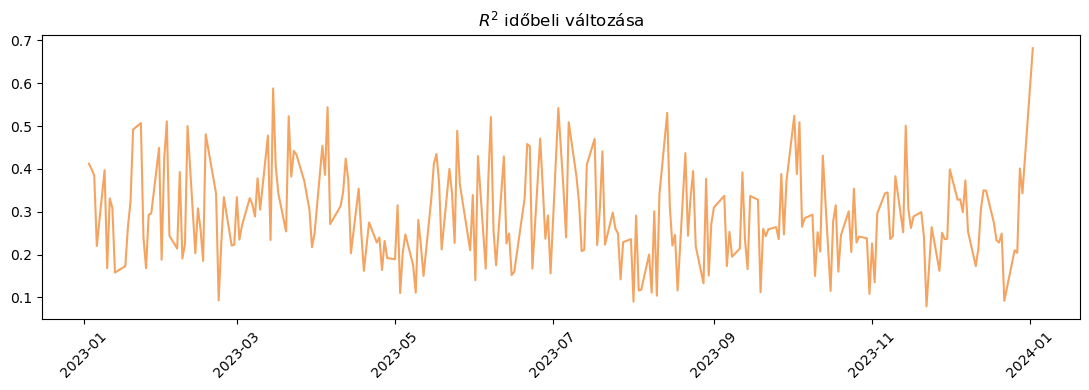

In [924]:
R_=R.T
plt.figure(figsize=(11, 4))
plt.title(r'$R^2$ időbeli változása')
plt.plot(R_, linestyle='-', color='SandyBrown')
#plt.xlabel('Idő')           # X tengely címkéje
#plt.ylabel('R^2 értéke')    # Y tengely címkéje
plt.xticks(rotation=45)      # X tengely címkéinek elforgatása
#plt.grid(True)               # Rács megjelenítése
plt.tight_layout()  

plt.show()

In [925]:
#Korrigált R^2
R_adj

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Adj R^2,0.387,0.373,0.359,0.185,0.37,0.132,0.302,0.278,0.121,0.137,...,0.242,0.2,0.194,0.216,0.052,0.175,0.17,0.375,0.314,0.668


In [926]:
R_atlag=R_adj.T.mean()
R_atlag

Adj R^2    0.259625
dtype: float64

In [927]:
minimum=np.min(R_adj)
maximum=np.max(R_adj)

In [928]:
minimum

0.039

In [929]:
maximum

0.668

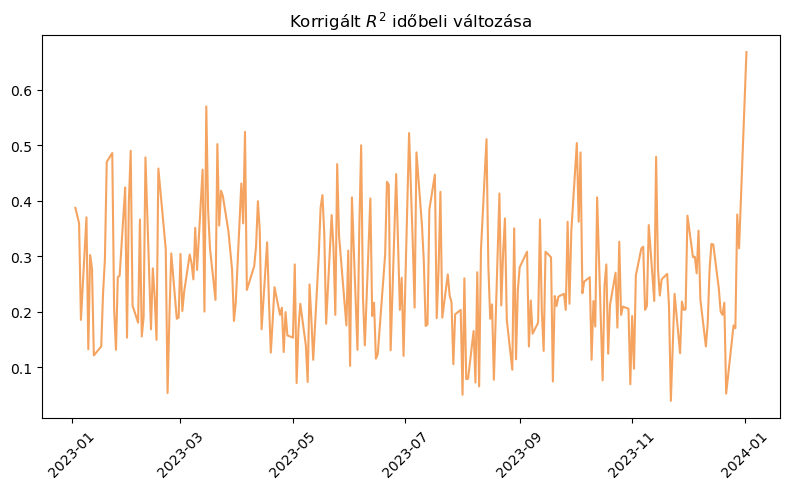

In [930]:
R_adj_=R_adj.T
plt.figure(figsize=(8, 5))
plt.title(r'Korrigált $R^2$ időbeli változása')
plt.plot(R_adj_, linestyle='-', color='SandyBrown')
#plt.xlabel('Idő')           # X tengely címkéje
#plt.ylabel('R^2 értéke')    # Y tengely címkéje
plt.xticks(rotation=45)      # X tengely címkéinek elforgatása
#plt.grid(True)               # Rács megjelenítése
plt.tight_layout()  

plt.show()

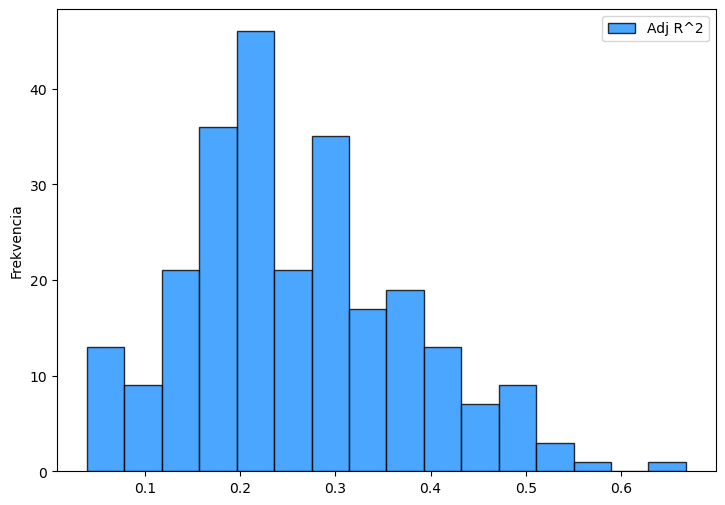

In [937]:
ax = R_adj.T.plot.hist(figsize=(8.5, 6), bins=16, alpha=0.8, color='dodgerblue', edgecolor='black' )
ax.set_ylabel('Frekvencia')
plt.show()

#

#

#

#

#

## Keresztmetszeti regresszió Ország faktorral
### (nincsenek átírva a változók, felülírja a jót)

In [779]:
coeff = pd.DataFrame(index=['Const', 'Momentum', 'Dividend Yield', 'Value', 'Size', 'Trading Activity', 'Growth', 'Leverage', 'Profitability', 
                              'Earnings Variability', 'Volatility','Energy','Materials', 'Industrials', 
                              'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology',
                              'Communication Services', 'Utilities', 'Real Estate', 'Country'], columns=ri.columns)
p = pd.DataFrame(index=['Const', 'Momentum', 'Dividend Yield', 'Value', 'Size', 'Trading Activity', 'Growth', 'Leverage', 'Profitability', 
                              'Earnings Variability', 'Volatility','Energy','Materials', 'Industrials', 
                              'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology',
                              'Communication Services', 'Utilities', 'Real Estate', 'Country'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Gro[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    
    X = pd.concat([X, country], axis=1)
    y = ri[stock]
    model = sm.OLS(y, X)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns)-1      #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [780]:
coeff

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Const,-0.003,-0.002,-0.016,0.004,0.007,-0.007,0.011,-0.012,0.004,0.004,...,0.010,-0.007,0.003,-0.001,0.008,-0.000,0.001,0.002,0.004,-0.012
Momentum,-0.014,-0.027,0.012,-0.003,-0.021,-0.007,-0.015,-0.002,-0.001,-0.009,...,0.007,-0.016,0.002,-0.005,-0.004,-0.004,0.001,-0.001,0.003,-0.026
Dividend Yield,0.282,-0.215,0.086,0.012,-0.150,-0.094,-0.129,-0.056,-0.073,-0.091,...,-0.055,-0.076,0.012,-0.035,-0.009,0.019,-0.016,0.018,0.009,0.265
Value,0.000,-0.000,0.001,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,...,-0.037,-0.010,0.008,-0.024,-0.000,-0.012,-0.017,0.001,-0.000,0.054
Size,0.000,-0.000,0.001,0.001,-0.001,0.001,-0.000,0.003,-0.000,-0.001,...,-0.001,0.001,-0.001,0.000,-0.001,0.000,-0.000,-0.001,-0.000,0.002
Trading Activity,-0.010,0.015,0.014,0.004,0.004,0.010,-0.000,0.014,0.000,0.003,...,-0.005,0.012,-0.013,0.012,-0.004,0.005,-0.002,-0.002,-0.010,-0.007
Growth,0.023,-0.011,0.002,0.008,-0.036,0.019,-0.023,-0.022,-0.023,-0.020,...,-0.011,0.008,-0.012,-0.009,-0.004,0.011,0.000,0.002,-0.008,0.011
Leverage,-0.001,0.029,0.009,-0.004,-0.003,0.007,-0.002,0.007,0.004,-0.000,...,-0.005,0.004,-0.003,0.014,-0.002,-0.005,0.005,0.005,-0.000,0.006
Profitability,-0.001,-0.000,0.001,-0.001,0.000,-0.000,0.002,-0.002,-0.000,-0.001,...,-0.002,-0.002,0.002,-0.004,-0.000,-0.002,-0.002,-0.001,0.001,-0.003
Earnings Variability,-0.061,-0.058,-0.041,0.014,0.061,-0.008,0.029,0.043,0.059,0.037,...,0.012,0.032,-0.014,0.062,0.051,-0.026,0.069,-0.040,0.028,0.073


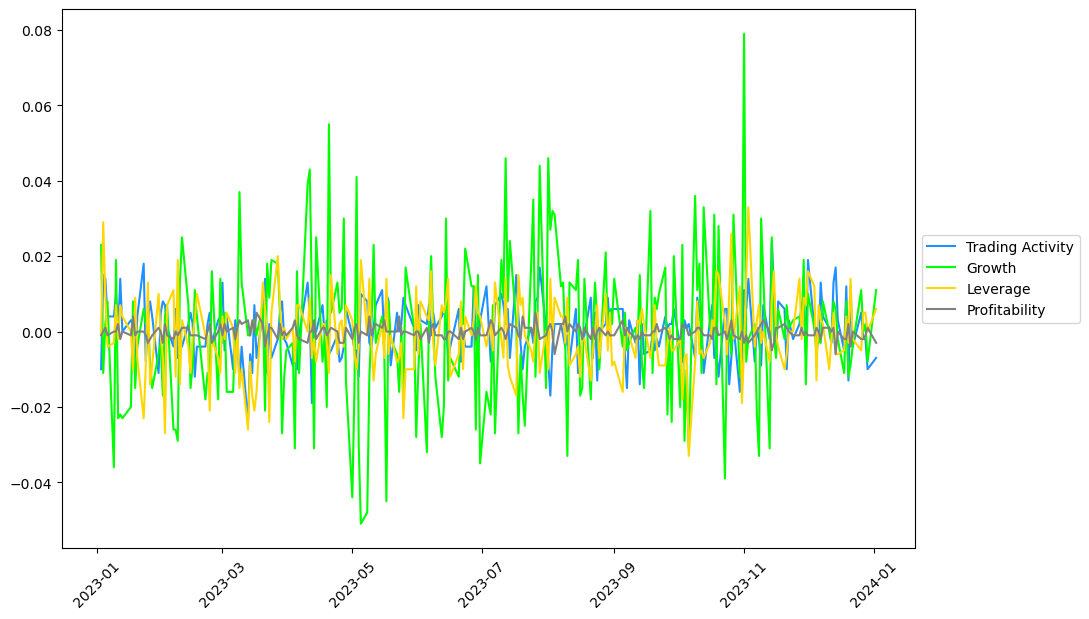

In [623]:
plt.figure(figsize=(11, 7))
colors = ['dodgerblue', 'lime',  'gold', 'gray', 'green', 'purple', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']

for index, (name, row) in enumerate(coeff.iloc[5:9].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

In [781]:
new_df = pd.DataFrame(index=coeff.index, columns=coeff.columns)
for index, row in coeff.iterrows():
    cumulative_sum = 0
    for col in coeff.columns:
        cumulative_sum += row[col]
        new_df.loc[index, col] = cumulative_sum

new_df

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Const,-0.003,-0.005,-0.021,-0.017,-0.01,-0.017,-0.006,-0.018,-0.014,-0.01,...,-0.143,-0.15,-0.147,-0.148,-0.14,-0.14,-0.139,-0.137,-0.133,-0.145
Momentum,-0.014,-0.041,-0.029,-0.032,-0.053,-0.06,-0.075,-0.077,-0.078,-0.087,...,-0.258,-0.274,-0.272,-0.277,-0.281,-0.285,-0.284,-0.285,-0.282,-0.308
Dividend Yield,0.282,0.067,0.153,0.165,0.015,-0.079,-0.208,-0.264,-0.337,-0.428,...,-5.56,-5.636,-5.624,-5.659,-5.668,-5.649,-5.665,-5.647,-5.638,-5.373
Value,0.0,0.0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,-0.502,-0.512,-0.504,-0.528,-0.528,-0.54,-0.557,-0.556,-0.556,-0.502
Size,0.0,0.0,0.001,0.002,0.001,0.002,0.002,0.005,0.005,0.004,...,0.056,0.057,0.056,0.056,0.055,0.055,0.055,0.054,0.054,0.056
Trading Activity,-0.01,0.005,0.019,0.023,0.027,0.037,0.037,0.051,0.051,0.054,...,0.104,0.116,0.103,0.115,0.111,0.116,0.114,0.112,0.102,0.095
Growth,0.023,0.012,0.014,0.022,-0.014,0.005,-0.018,-0.04,-0.063,-0.083,...,0.033,0.041,0.029,0.02,0.016,0.027,0.027,0.029,0.021,0.032
Leverage,-0.001,0.028,0.037,0.033,0.03,0.037,0.035,0.042,0.046,0.046,...,-0.199,-0.195,-0.198,-0.184,-0.186,-0.191,-0.186,-0.181,-0.181,-0.175
Profitability,-0.001,-0.001,0.0,-0.001,-0.001,-0.001,0.001,-0.001,-0.001,-0.002,...,-0.019,-0.021,-0.019,-0.023,-0.023,-0.025,-0.027,-0.028,-0.027,-0.03
Earnings Variability,-0.061,-0.119,-0.16,-0.146,-0.085,-0.093,-0.064,-0.021,0.038,0.075,...,-0.001,0.031,0.017,0.079,0.13,0.104,0.173,0.133,0.161,0.234


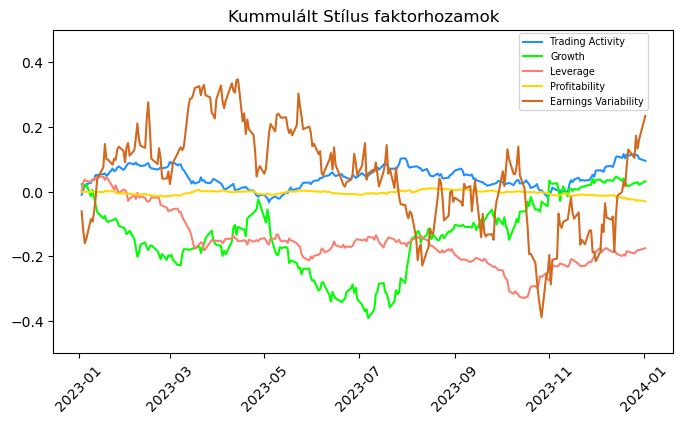

In [782]:
plt.figure(figsize=(8, 4.2))
colors = ['dodgerblue', 'lime',  'salmon', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']

for index, (name, row) in enumerate(new_df.iloc[5:10].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
plt.title('Kummulált Stílus faktorhozamok')
plt.legend(loc='upper center', bbox_to_anchor=(0.855, 1.005), fancybox=True, fontsize='x-small')
plt.ylim(-0.5, 0.5)
plt.xticks(rotation=45) 
plt.show()

In [627]:
#az időtartam hány százalékában szignifikáns (5%-os szignifikancia szinten)
szazalek = pd.DataFrame(index=p.index, columns=['%'])

for index, row in p.iterrows():
    a = 0
    for column, value in row.items():
        if value < 0.05:
            a += 1
            b=(a/251)*100
    szazalek.at[index, '%'] = b

szazalek=szazalek.astype(float)
szazalek=szazalek.round(2)
szazalek.index.name='Faktorok'
szazalek

,%
Faktorok,
Const,29.08
Momentum,62.95
Dividend Yield,28.29
Value,30.68
Size,30.28
Trading Activity,51.79
Growth,31.08
Leverage,25.50
Profitability,7.97


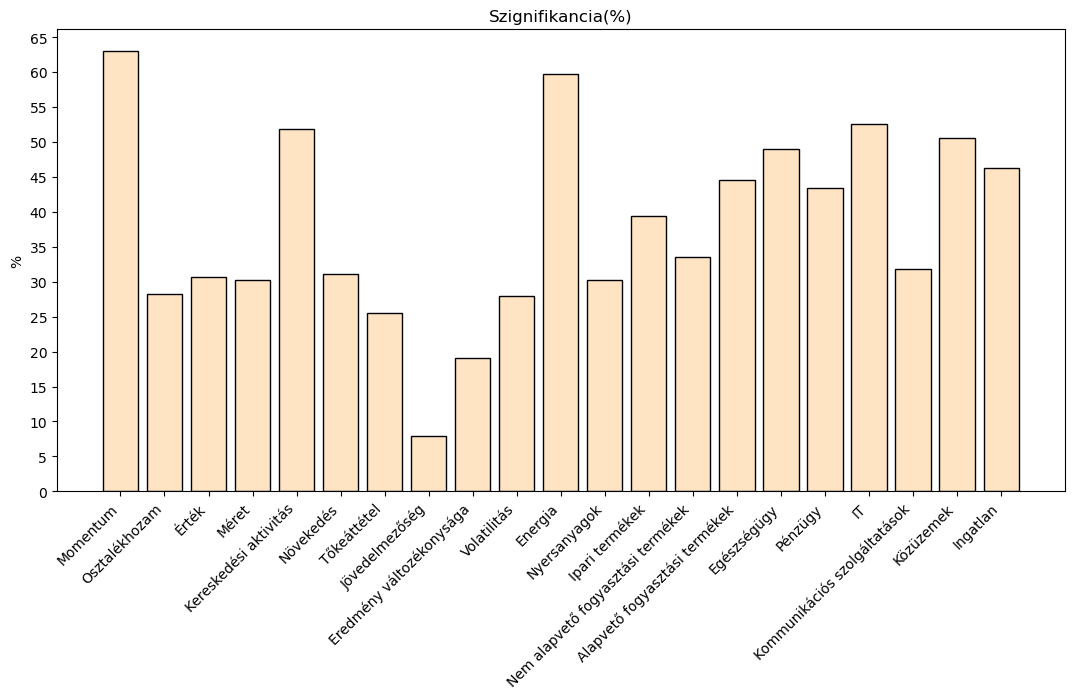

In [783]:
plt.figure(figsize=(13, 6))
x = range(len(szazalek.index))
plt.bar(x, szazalek['%'], color='bisque', edgecolor='Black', align='center')
plt.title('Szignifikancia(%)')
plt.ylabel('%')
plt.xticks(x, szazalek.index, rotation=45, ha='right')
plt.yticks(range(0, 67, 5))
#plt.axhline(y=40, color='red', linestyle='--')  
plt.show()

In [ ]:
#szinte pont ugyanaz mint az ország faktor nélkül

In [687]:
data = [
    ['Faktorok', '%','', '','Faktorok', '%','','', 'Faktorok', '%'],
    ['Momentum', 62.95, '','','Jövedelmezőség', 7.97,'', '','Alapvető fogyasztási termékek', 44.62],
    ['Osztalékhozam', 28.29,'', '','Eredmény változékonysága', 19.12,'','','Egészségügy', 49.00 ],
    ['Érték', 30.68,'', '','Volatilitás', 27.89,'','', 'Pénzügy', 43.43], 
    ['Méret', 30.28, '', '','Energia', 59.76,'','', 'IT', 52.59],
    ['Kereskedési aktivitás', 51.79,'','', 'Nyersanyagok', 30.28,'','','Kommunikációs szolgáltatások', 31.87],
    ['Növekedés', 31.08,'','', 'Ipari termékek', 39.44,'','','Közüzemek', 50.60],
    ['Tőkeáttétel', 25.50, '','', 'Nem alapvető fogyasztási termékek', 33.47, '','','Ingatlan', 46.22]
  
]



# DataFrame létrehozása
tabla = pd.DataFrame(data[1:], columns=data[0])
tabla.index = ['', '', '', '', '', '', '']
tabla

,Faktorok,%,,,Faktorok,%,,,Faktorok,%
,Momentum,62.95,,,Jövedelmezőség,7.97,,,Alapvető fogyasztási termékek,44.62
,Osztalékhozam,28.29,,,Eredmény változékonysága,19.12,,,Egészségügy,49.00
,Érték,30.68,,,Volatilitás,27.89,,,Pénzügy,43.43
,Méret,30.28,,,Energia,59.76,,,IT,52.59
,Kereskedési aktivitás,51.79,,,Nyersanyagok,30.28,,,Kommunikációs szolgáltatások,31.87
,Növekedés,31.08,,,Ipari termékek,39.44,,,Közüzemek,50.60
,Tőkeáttétel,25.50,,,Nem alapvető fogyasztási termékek,33.47,,,Ingatlan,46.22


In [419]:
data2 = [
    ['Iparágak', 'db','', 'Iparágak', 'db'],
    ['Energia', 23, '', 'Pénzügy', 72],
    ['Nyersanyagok', 28, '','IT', 64],
    ['Ipari termékek', 78, '', 'Kommunikációs szolgáltatások', 22],
    ['Nem alapvető fogyasztási termékek', 53, '', 'Közüzemek', 30],
    ['Alapvető fogyasztási termékek', 38, '', 'Ingatlan', 31],
    ['Egészségügy', 64,'','', '']
]

tabla2 = pd.DataFrame(data2[1:], columns=data2[0])
tabla2.index = ['', '', '', '', '', '']
tabla2

,Iparágak,db,,Iparágak,db
,Energia,23,,Pénzügy,72
,Nyersanyagok,28,,IT,64
,Ipari termékek,78,,Kommunikációs szolgáltatások,22
,Nem alapvető fogyasztási termékek,53,,Közüzemek,30
,Alapvető fogyasztási termékek,38,,Ingatlan,31
,Egészségügy,64,,,
